<a href="https://colab.research.google.com/github/lennard2021/TheBitcoinSentinel/blob/main/RMetrics_Functions_Pricing_and_Evaluating_Basic_Options.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RMetrics Functions Pricing and Evaluating Basic Options
https://www.rmetrics.org/

https://rdrr.io/rforge/fOptions/

https://cran.r-project.org/web/packages/fOptions/index.html

https://cran.r-project.org/web/packages/fOptions/fOptions.pdf

https://r-forge.r-project.org/scm/viewvc.php?view=rev&root=rmetrics&revision=24

Description Provides a collection of functions to
value basic options. This includes the generalized
Black-Scholes option, options on futures and options on
commodity futures. Many of the functions follow Espen Haug:

http://www.espenhaug.com/

Espen's Excel VBA based Book are relevant for many functions and code below: 
Complete-Guide-Option-Pricing-Formulas

https://www.cqf.com/why-cqf/lecturers/our-faculty/dr-espen-gaarder-haug

Copyrights (C) for this R-port: 
1999 - 2004, Diethelm Wuertz, GPL

https://comp.phys.ethz.ch/news-and-events/nc/2016/08/in-memoriam-diethelm-wuertz.html

Author Diethelm Wuertz [aut],
Tobias Setz [cre],
Yohan Chalabi [ctb]

info@rmetrics.org

www.rmetrics.org

for the code accessed (or partly included) from other R-ports:
see R's copyright and license files for the code accessed (or partly included) from contributed R-ports and other source see Rmetrics's copyright file

In [ ]:
# This library is free software; you can redistribute it and/or
# modify it under the terms of the GNU Library General Public
# License as published by the Free Software Foundation; either
# version 2 of the License, or (at your option) any later version.
#
# This library is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the 
# GNU Library General Public License for more details.
#
# You should have received a copy of the GNU Library General 
# Public License along with this library; if not, write to the 
# Free Foundation, Inc., 59 Temple Place, Suite 330, Boston, 
# MA  02111-1307  USA

# Copyrights (C)
# for this R-port: 
#   1999 - 2004, Diethelm Wuertz, GPL
#   Diethelm Wuertz <wuertz@itp.phys.ethz.ch>
#   info@rmetrics.org
#   www.rmetrics.org
# for the code accessed (or partly included) from other R-ports:
#   see R's copyright and license files
# for the code accessed (or partly included) from contributed R-ports
# and other sources
#   see Rmetrics's copyright file

#Magic R Cell
required so that R code executes

In [ ]:
%load_ext rpy2.ipython

#Plain Vanilla Options
includes a few key distributions. For more on normal distribution please check here:

https://sites.google.com/view/brian-byrne-data-analytics/the-normal-distribution

https://www.youtube.com/watch?v=p9m-5riMBmw

https://www.youtube.com/watch?v=OjEyAAkM1aE

https://www.youtube.com/watch?v=oXxPWT2iwKo

In [ ]:
%%R


################################################################################
# FUNCTION:                  DESCRIPTION:
#  fOPTION                    S4 Class Representation
# FUNCTION:                  DESCRIPTION:
#  NDF                        Normal distribution function
#  CND                        Cumulative normal distribution function
#  CBND                       Cumulative bivariate normal distribution  
# FUNCTION:                  DESCRIPTION:
#  GBSOption                  Computes Option Price from the GBS Formula
#  GBSCharacteristics         Computes Option Price and all Greeks of GBS Model
#   BlackScholesOption         Synonyme Function Call to GBSOption
#  GBSGreeks                  Computes one of the Greeks of the GBS formula
# FUNCTION:                  DESCRIPTION:
#  Black76Option              Computes Prices of Options on Futures
# FUNCTION:                  DESCRIPTION:
#  MiltersenSchwartzOption    Pricing a Miltersen Schwartz Option
# S3 METHODS:                DESCRIPTION:
#  print.option               Print Method
#  summary.otion              Summary Method
################################################################################


setClass("fOPTION", 
    representation(
        call = "call",
        parameters = "list",
        price = "numeric",     
        title = "character",
        description = "character"
    ) 
)
   

################################################################################


NDF = 
function(x) 
{   # A function implemented by Diethelm Wuertz
     
    # Description:
    #   Calculate the normal distribution function.
    
    # FUNCTION:
    
    # Compute:
    result = exp(-x*x/2)/sqrt(8*atan(1))
    
    # Return Value:
    result
}


# ------------------------------------------------------------------------------


CND = 
function(x)
{   # A function implemented by Diethelm Wuertz
     
    # Description:
    #   Calculate the cumulated normal distribution function.
    
    # References:
    #   Haug E.G., The Complete Guide to Option Pricing Formulas
        
    # FUNCTION:
    
    # Compute:
    k  = 1 / ( 1 + 0.2316419 * abs(x) )      
    a1 =  0.319381530; a2 = -0.356563782; a3 =  1.781477937 
    a4 = -1.821255978; a5 =  1.330274429 
    result = NDF(x) * (a1*k + a2*k^2 + a3*k^3 + a4*k^4 + a5*k^5) - 0.5
    result = 0.5 - result*sign(x)
    
    # Return Value:
    result
}


# ------------------------------------------------------------------------------


CBND = 
function(x1, x2, rho) 
{   # A function implemented by Diethelm Wuertz
    
    # Description:
    #   Calculate the cumulative bivariate normal distribution function.
    
    # References:
    #   Haug E.G., The Complete Guide to Option Pricing Formulas
    
    # FUNCTION:
    
    # Compute:
    # Take care for the limit rho = +/- 1
    a = x1
    b = x2
    if (abs(rho) == 1) rho = rho - (1e-12)*sign(rho)
    # cat("\n a - b - rho :"); print(c(a,b,rho))
    X = c(0.24840615, 0.39233107, 0.21141819, 0.03324666, 0.00082485334)
    y = c(0.10024215, 0.48281397, 1.0609498, 1.7797294, 2.6697604)
    a1 = a / sqrt(2 * (1 - rho^2))
    b1 = b / sqrt(2 * (1 - rho^2))   
    if (a <= 0 && b <= 0 && rho <= 0) { 
       Sum1 = 0
       for (I in 1:5) {
            for (j in 1:5) {
            Sum1 = Sum1 + X[I] * X[j] * 
              exp(a1*(2*y[I]-a1) + b1*(2*y[j]-b1) + 
              2*rho*(y[I]-a1)*(y[j]-b1)) } }
       result = sqrt(1 - rho^2) / pi * Sum1 
       return(result) }
    if (a <= 0 && b >= 0 && rho >= 0) {
        result = CND(a) - CBND(a, -b, -rho)
        return(result) }
    if (a >= 0 && b <= 0 && rho >= 0) {
        result = CND(b) - CBND(-a, b, -rho)
        return(result) }
    if (a >= 0 && b >= 0 && rho <= 0) {
        result = CND(a) + CND(b) - 1 + CBND(-a, -b, rho)
        return(result) }
    if (a * b * rho >= 0 ) { 
        rho1 = (rho*a - b) * sign(a) / sqrt(a^2 - 2*rho*a*b + b^2)
        rho2 = (rho*b - a) * sign(b) / sqrt(a^2 - 2*rho*a*b + b^2)
        delta = (1 - sign(a) * sign(b)) / 4
        result = CBND(a, 0, rho1) + CBND(b, 0, rho2) - delta 
        return(result) }
    
    # Return Value:
    invisible()
}


# ******************************************************************************


GBSOption = 
function(TypeFlag = c("c", "p"), S, X, Time, r, b, sigma, title = NULL,
description = NULL)
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Calculate the Generalized Black-Scholes option
    #   price either for a call or a put option.
    
    # References:
    #   Haug E.G., The Complete Guide to Option Pricing Formulas
    
    # FUNCTION:
    
    # Compute:
    TypeFlag = TypeFlag[1]
    d1 = ( log(S/X) + (b+sigma*sigma/2)*Time ) / (sigma*sqrt(Time))
    d2 = d1 - sigma*sqrt(Time)
    if (TypeFlag == "c")
        result = S*exp((b-r)*Time)*CND(d1) - X*exp(-r*Time)*CND(d2) 
    if (TypeFlag == "p")
        result = X*exp(-r*Time)*CND(-d2) - S*exp((b-r)*Time)*CND(-d1) 
        
    # Parameters:
    param = list()
    param$TypeFlag = TypeFlag
    param$S = S
    param$X = X
    param$Time = Time
    param$r = r
    param$b = b
    param$sigma = sigma
    
    # Add title and description:
    if (is.null(title)) title = "Black Scholes Option Valuation"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = result, 
        title = title,
        description = description
        )        
}


# ------------------------------------------------------------------------------


GBSCharacteristics = 
function(TypeFlag = c("c", "p"), S, X, Time, r, b, sigma)
{   # A function implemented by Diethelm Wuertz
 
    # Description:
    #   Calculate the Options Characterisitics (Premium 
    #   and Greeks for a Generalized Black-Scholes option 
    #   either for a call or a put option.
    
    # References:
    #   Haug E.G., The Complete Guide to Option Pricing Formulas
    
    # FUNCTION:
    
    # Premium and Function Call to all Greeks
    TypeFlag = TypeFlag[1]
    premium = GBSOption(TypeFlag, S, X, Time, r, b, sigma)@price  
    delta = GBSGreeks("Delta", TypeFlag, S, X, Time, r, b, sigma)  
    theta = GBSGreeks("Theta", TypeFlag, S, X, Time, r, b, sigma)
    vega = GBSGreeks("Vega", TypeFlag, S, X, Time, r, b, sigma)
    rho = GBSGreeks("Rho", TypeFlag, S, X, Time, r, b, sigma)
    lambda = GBSGreeks("Lambda", TypeFlag, S, X, Time, r, b, sigma)  
    gamma = GBSGreeks("Gamma", TypeFlag, S, X, Time, r, b, sigma)  
    
    # Return Value:
    list(premium = premium, delta = delta, theta = theta, 
        vega = vega, rho = rho, lambda = lambda, gamma = gamma) 
} 


# ------------------------------------------------------------------------------


BlackScholesOption = 
function(...) 
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   A synonyme for GBSOption
    
    # FUNCTION:
    
    # Return Value:
    GBSOption(...)
}



# ******************************************************************************


GBSGreeks = 
function(Selection = c("Delta", "Theta", "Vega", "Rho", "Lambda", "Gamma",
"CofC"), TypeFlag = c("c", "p"), S, X, Time, r, b, sigma)
{   # A function implemented by Diethelm Wuertz
 
    # Description:
    #   Calculate the Options Greeks for a Generalized  
    #   Black-Scholes option either for a call or a put 
    #   option.
    
    # References:
    #   Haug E.G., The Complete Guide to Option Pricing Formulas
    
    # FUNCTION:
    
    # Settings:
    TypeFlag = TypeFlag[1]
    Selection = Selection[1]
    
    # Internal Functions:
    GBSDelta <<- function(TypeFlag, S, X, Time, r, b, sigma) {
        d1 = ( log(S/X) + (b+sigma*sigma/2)*Time ) / (sigma*sqrt(Time))
        if (TypeFlag == "c") result = exp((b-r)*Time)*CND(d1)
        if (TypeFlag == "p") result = exp((b-r)*Time)*(CND(d1)-1)
        result }
    GBSTheta <<- function(TypeFlag, S, X, Time, r, b, sigma) {
        d1 = ( log(S/X) + (b+sigma*sigma/2)*Time ) / (sigma*sqrt(Time))
        d2 = d1 - sigma*sqrt(Time)
        Theta1 = -(S*exp((b-r)*Time)*NDF(d1)*sigma)/(2*sqrt(Time))  
        if (TypeFlag == "c") result = Theta1 - 
            (b-r)*S*exp((b-r)*Time)*CND(+d1) - r*X*exp(-r*Time)*CND(+d2) 
        if (TypeFlag == "p") result = Theta1 + 
            (b-r)*S*exp((b-r)*Time)*CND(-d1) + r*X*exp(-r*Time)*CND(-d2) 
        result }
    GBSVega <<- function(TypeFlag, S, X, Time, r, b, sigma) {
        d1 = ( log(S/X) + (b+sigma*sigma/2)*Time ) / (sigma*sqrt(Time))
        result = S*exp((b-r)*Time)*NDF(d1)*sqrt(Time) # Call,Put
        result }
    GBSRho <<- function(TypeFlag, S, X, Time, r, b, sigma) {
        d1 = ( log(S/X) + (b+sigma*sigma/2)*Time ) / (sigma*sqrt(Time))
        d2 = d1 - sigma*sqrt(Time)
        CallPut = GBSOption(TypeFlag, S, X, Time, r, b , sigma)@price
        if (TypeFlag == "c") {
            if (b != 0) {result =  Time * X * exp(-r*Time)*CND( d2)} 
            else {result = -Time * CallPut } }
        if (TypeFlag == "p") {
            if (b != 0) {result = -Time * X * exp(-r*Time)*CND(-d2)}
            else { result = -Time * CallPut } }
        result }
    GBSLambda <<- function(TypeFlag, S, X, Time, r, b, sigma) {
        d1 = ( log(S/X) + (b+sigma*sigma/2)*Time ) / (sigma*sqrt(Time))
        CallPut = GBSOption(TypeFlag,S,X,Time,r,b,sigma)@price
        if (TypeFlag == "c") result = exp((b-r)*Time)* CND(d1)*S / CallPut
        if (TypeFlag == "p") result = exp((b-r)*Time)*(CND(d1)-1)*S / CallPut
        result }        
    GBSGamma <<- function(TypeFlag, S, X, Time, r, b, sigma) {
        d1 = ( log(S/X) + (b+sigma*sigma/2)*Time ) / (sigma*sqrt(Time))
        result = exp((b-r)*Time)*NDF(d1)/(S*sigma*sqrt(Time)) # Call,Put
        result }
    GBSCofC <<- function(TypeFlag, S, X, Time, r, b, sigma) {
        d1 = ( log(S/X) + (b+sigma*sigma/2)*Time ) / (sigma*sqrt(Time))
        if (TypeFlag == "c") result = Time*S*exp((b-r)*Time)*CND(d1)
        if (TypeFlag == "p") result = -Time*S*exp((b-r)*Time)*CND(-d1)
        result }
    
    # Function Call to all Greeks via selection parameter 
    result = NA
    if (Selection == "Delta" || Selection == "delta")
            result = GBSDelta (TypeFlag, S, X, Time, r, b, sigma)  
    if (Selection == "Theta" || Selection == "theta")
            result = GBSTheta (TypeFlag, S, X, Time, r, b, sigma)
    if (Selection == "Vega" || Selection == "vega")
            result = GBSVega  (TypeFlag, S, X, Time, r, b, sigma)
    if (Selection == "Rho" || Selection == "rho")
            result = GBSRho   (TypeFlag, S, X, Time, r, b, sigma)
    if (Selection == "Lambda" || Selection == "lambda")
            result = GBSLambda(TypeFlag, S, X, Time, r, b, sigma)  
    if (Selection == "Gamma" || Selection == "gamma")
            result = GBSGamma (TypeFlag, S, X, Time, r, b, sigma)  
    if (Selection == "CofC" || Selection == "cofc")
            result = GBSCofC  (TypeFlag, S, X, Time, r, b, sigma)
    
    # Return Value:
    result    
} 


# ******************************************************************************


Black76Option = 
function(TypeFlag = c("c", "p"), FT, X, Time, r, sigma, title = NULL,
description = NULL)
{   # A function implemented by Diethelm Wuertz
 
    # Description:
    #   Calculate Options Price for Black (1977) Options 
    #   on futures/forwards

    # References:
    #   Haug E.G., The Complete Guide to Option Pricing Formulas
    
    # FUNCTION:
    
    # Settings:
    TypeFlag = TypeFlag[1]
    
    # Result:
    result = GBSOption(TypeFlag = TypeFlag, S = FT, X = X, Time = Time, 
        r = r, b = 0, sigma = sigma)@price
    
    # Parameters:
    param = list()
    param$TypeFlag = TypeFlag
    param$FT = FT
    param$X = X
    param$Time = Time
    param$r = r
    param$sigma = sigma
    
    # Add title and description:
    if (is.null(title)) title = "Black 76 Option Valuation"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = result, 
        title = title,
        description = description
        )            
}


# ******************************************************************************


MiltersenSchwartzOption = 
function (TypeFlag = c("c", "p"), Pt, FT, X, time, Time, sigmaS, sigmaE, 
sigmaF, rhoSE, rhoSF, rhoEF, KappaE, KappaF, title = NULL,
description = NULL) 
{   # A function implemented by Diethelm Wuertz           

    # Description:
    #   Miltersen Schwartz (1997) commodity option model.
    
    # References:
    #   Haug E.G., The Complete Guide to Option Pricing Formulas
    
    # FUNCTION:
    
    # Settings:
    TyoeFlag = TypeFlag[1]
    
    # Compute:
    vz = sigmaS^2*time+2*sigmaS*(sigmaF*rhoSF*1/KappaF*(time-1/KappaF*
      exp(-KappaF*Time)*(exp(KappaF*time)-1))-sigmaE*rhoSE*1/KappaE*
      (time-1/KappaE*exp(-KappaE*Time)*(exp(KappaE*time)-1)))+sigmaE^2*
      1/KappaE^2*(time+1/(2*KappaE)*exp(-2*KappaE*Time)*(exp(2*KappaE*time)-
      1)-2*1/KappaE*exp(-KappaE*Time)*(exp(KappaE*time)-1))+sigmaF^2*
      1/KappaF^2*(time+1/(2*KappaF)*exp(-2*KappaF*Time)*(exp(2*KappaF*time)-
      1)-2*1/KappaF*exp(-KappaF*Time)*(exp(KappaF*time)-1))-2*sigmaE*
      sigmaF*rhoEF*1/KappaE*1/KappaF*(time-1/KappaE*exp(-KappaE*Time)*
      (exp(KappaE*time)-1)-1/KappaF*exp(-KappaF*Time)*(exp(KappaF*time)-
      1)+1/(KappaE+KappaF)*exp(-(KappaE+KappaF)*Time)*(exp((KappaE+KappaF)*
      time)-1))
    vxz = sigmaF*1/KappaF*(sigmaS*rhoSF*(time-1/KappaF*(1-exp(-KappaF*
      time)))+sigmaF*1/KappaF*(time-1/KappaF*exp(-KappaF*Time)*(exp(KappaF*
      time)-1)-1/KappaF*(1-exp(-KappaF*time))+1/(2*KappaF)*exp(-KappaF*
      Time)*(exp(KappaF*time)-exp(-KappaF*time)))-sigmaE*rhoEF*1/KappaE*
      (time-1/KappaE*exp(-KappaE*Time)*(exp(KappaE*time)-1)-1/KappaF*(1-
      exp(-KappaF*time))+1/(KappaE+KappaF)*exp(-KappaE*Time)*
      (exp(KappaE*time)-exp(-KappaF*time))))
    vz = sqrt(vz)
    d1 = (log(FT/X)-vxz+vz^2/2)/vz
    d2 = (log(FT/X)-vxz-vz^2/2)/vz
    
    # Call/Put:
    if (TypeFlag == "c") {
        result = Pt*(FT*exp(-vxz)*CND(d1)-X*CND(d2)) }
    if (TypeFlag == "p") {
        result = Pt*(X*CND(-d2)-FT*exp(-vxz)*CND(-d1)) }
    
    # Parameters:
    param = list()
    param$TypeFlag = TypeFlag
    param$Pt = Pt
    param$FT = FT
    param$X = X
    param$time = time
    param$Time = Time
    param$sigmaS = sigmaS
    param$sigmaE = sigmaE
    param$sigmaF = sigmaF
    param$rhoSE = rhoSE
    param$rhoSF = rhoSF
    param$rhoEF = rhoEF
    param$KappaE = KappaE
    param$KappaF = KappaF
    
    # Add title and description:
    if (is.null(title)) title = "Miltersen Schwartz Option Valuation"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = result, 
        title = title,
        description = description
        )        
}  


# ******************************************************************************


GBSVolatility = function(price, TypeFlag = c("c", "p"), S, X, Time, r, b, 
tol = .Machine$double.eps, maxiter = 10000)
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Compute implied volatility
    
    # Example:
    #   sigma = GBSVolatility(price=10.2, "c", S=100, X=90, Time=1/12, r=0, b=0)
    #   sigma
    #   GBSOption("c", S=100, X=90, Time=1/12, r=0, b=0, sigma=sigma)@price
    
    # FUNCTION:
    
    # Option Type:
    TypeFlag = TypeFlag[1]
    
    # Internal Function:
    .f <<- function(x, price, TypeFlag, S, X, Time, r, b, ...) {
        GBS = GBSOption(TypeFlag = TypeFlag, S = S, X = X, Time = Time, 
            r = r, b = b, sigma = x)@price 
        price - GBS}
    
    # Search for Root:
    volatility = uniroot(.f, interval = c(-10,10), price = price, 
        TypeFlag = TypeFlag, S = S, X = X, Time = Time, r = r, b = b, 
        tol = tol, maxiter = maxiter)$root
        
    # Return Value:
    volatility
}


# ******************************************************************************


print.option = 
function(x, ...)
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Print method for objects of class "option".
    
    # FUNCTION:
    
    # Print Method:
    object = x
    cat("\nCall:", deparse(object$call), "", sep = "\n")
    cat("Option Price:\n")
    cat(object$price, "\n")
}


# ------------------------------------------------------------------------------


summary.option = 
function(object, ...)
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Summary method for objects of class "option".
    
    # FUNCTION:
    
    # Summary Method:
    print(object, ...)
}


# ******************************************************************************


print.fOPTION = 
function(x, ...)
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Print method for objects of class "fOPTION".
    
    # FUNCTION:
    
    # Print Method:
    object = x
    Parameter = unlist(x@parameters)
    Names = names(Parameter)
    Parameter = cbind(as.character(Parameter))
    rownames(Parameter) = Names
    colnames(Parameter) = "Value:"
    
    # Title:
    cat("\nTitle:\n")
    cat(x@title, "\n")
    
    # Call:
    cat("\nCall:", deparse(x@call), "", sep = "\n")
    
    # Parameters:
    cat("Parameters:\n")
    print(Parameter, quote = FALSE)
    
    # Price:
    cat("\nOption Price:\n")
    cat(x@price, "\n")
    
    # Description:
    cat("\nDescription:\n")
    cat(x@description, "\n")  
    
    # Return Value:
    invisible()
}


# ------------------------------------------------------------------------------


summary.fOPTION = 
function(object, ...)
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Summary method for objects of class "option".
    
    # FUNCTION:
    
    # Summary Method:
    print(object, ...)
}


################################################################################


#Basic American Options in R

In [ ]:
%%R
################################################################################
# FUNCTION:                  DESCRIPTION:
#  RollGeskeWhaleyOption      Roll-Geske-Whaley Calls on Dividend Paying Stocks
#  BAWAmericanApproxOption    Barone-Adesi and Whaley Approximation
#  BSAmericanApproxOption     Bjerksund and Stensland Approximation
################################################################################


RollGeskeWhaleyOption = 
function(S, X, time1, Time2, r, D, sigma, title = NULL, description = NULL) 
{   # A function implemented by Diethelm Wuertz
 
    # Description:
    #   Calculates the option price of an American call on a stock
    #   paying a single dividend with specified time to divident
    #   payout. The option valuation formula derived by Roll, Geske 
    #   and Whaley is used.
    
    # References:
    #   Haug E.G., The Complete Guide to Option Pricing Formulas
    
    # FUNCTION:
    
    # Settings:
    big = 100000000
    eps = 1.0e-5
    t1 = time1
    T2 = Time2
    
    # Compute:
    Sx = S - D * exp(-r * t1)
    if (D <= X * (1 - exp(-r*(T2-t1)))) {         
        result = GBSOption("c", Sx, X, T2, r, b=r, sigma)@price
        cat("\nWarning: Not optimal to exercise\n")
        return(result) }
    ci = GBSOption("c", S, X, T2-t1, r, b=r, sigma)@price
    HighS = S
    while ( ci-HighS-D+X > 0 && HighS < big ) {
        HighS = HighS * 2
        ci = GBSOption("c", HighS, X, T2-t1, r, b=r, sigma)@price }
    if (HighS > big) {
        result = GBSOption("c", Sx, X, T2, r, b=r, sigma)@price
        stop()}
    LowS = 0
    I = HighS * 0.5
    ci = GBSOption("c", I, X, T2-t1, r, b=r, sigma)@price 
    # Search algorithm to find the critical stock price I
    while ( abs(ci-I-D+X) > eps && HighS - LowS > eps ) {
         if (ci-I-D+X < 0 ) { HighS = I }
        else { LowS = I }
        I = (HighS + LowS) / 2
        ci = GBSOption("c", I, X, T2-t1, r, b=r, sigma)@price }
    a1 = (log(Sx/X) + (r+sigma^2/2)*T2) / (sigma*sqrt(T2))
    a2 = a1 - sigma*sqrt(T2)
    b1 = (log(Sx/I) + (r+sigma^2/2)*t1) / (sigma*sqrt(t1))
    b2 = b1 - sigma*sqrt(t1)
    result = Sx*CND(b1) + Sx*CBND(a1,-b1,-sqrt(t1/T2)) -
        X*exp(-r*T2)*CBND(a2,-b2,-sqrt(t1/T2)) - 
            (X-D)*exp(-r*t1)*CND(b2)
    
    # Parameters:
    # S, X, time1, Time2, r, D, sigma
    param = list()
    param$S = S
    param$X = X
    param$time1 = time1
    param$Time2 = Time2
    param$r = r
    param$D = D
    param$sigma = sigma
    
    # Add title and description:
    if (is.null(title)) title = "Roll Geske Whaley Option"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = result, 
        title = title,
        description = description
        )      
}


# ******************************************************************************


BAWAmericanApproxOption = 
function(TypeFlag = c("c", "p"), S, X, Time, r, b, sigma, title = NULL, 
description = NULL)
{   # A function implemented by Diethelm Wuertz
 
    # Description:
    #   Calculates the option price of an American call or put
    #   option on an underlying asset for a given cost-of-carry rate.
    #   The quadratic approximation method by Barone-Adesi and
    #   Whaley is used.

    # References:
    #   Haug E.G., The Complete Guide to Option Pricing Formulas
    
    # FUNCTION:
    
    # Settings:
    TypeFlag = TypeFlag[1]
    
    # Internal Function - The Call:
    BAWAmCallApproxOption <<- function(S, X, Time, r, b, sigma) {
        # Newton Raphson Algorithm:
        Kc <<- function(X, Time, r, b, sigma) {   
            # Newton Raphson algorithm to solve for the critical commodity 
            # price for a Call.
            # Calculation of seed value, Si
            n = 2*b/sigma^2
            m = 2*r/sigma^2
            q2u = (-(n-1)+sqrt((n-1)^2+4*m))/2
            Su = X/(1-1/q2u)
            h2 = -(b*Time+2*sigma*sqrt(Time))*X/(Su-X)
            Si = X+(Su-X)*(1-exp(h2))
            K = 2*r/(sigma^2*(1-exp(-r*Time)))
            d1 = (log(Si/X)+(b+sigma^2/2)*Time)/(sigma*sqrt(Time))
            Q2 = (-(n-1)+sqrt((n-1)^2+4*K))/2
            LHS = Si-X
            RHS = GBSOption("c", Si, X, Time, r, b, sigma)@price + 
                (1-exp((b-r)*Time)*CND(d1))*Si/Q2
            bi = exp((b-r)*Time)*CND(d1)*(1-1/Q2) +
                (1-exp((b-r)*Time)*CND(d1)/(sigma*sqrt(Time)))/Q2
            E = 0.000001
            # Newton Raphson algorithm for finding critical price Si
            while (abs(LHS-RHS)/X > E) {
                Si = (X+RHS-bi*Si)/(1-bi)
                d1 = (log(Si/X)+(b+sigma^2/2)*Time)/(sigma*sqrt(Time))
                LHS = Si-X
                RHS = GBSOption("c", Si, X, Time, r, b, sigma)@price + 
                    (1-exp((b-r)*Time)*CND(d1))*Si/Q2
                bi = exp((b-r)*Time)*CND(d1)*(1-1/Q2) + 
                (   1-exp((b-r)*Time)*CND(d1)/(sigma*sqrt(Time)))/Q2 }
            # Return Value:
            Si}
        # Compute:
        if (b >= r) {
            result = GBSOption("c", S, X, Time, r, b, sigma)@price }
        else {
            Sk = Kc(X, Time, r, b, sigma)
            n = 2*b/sigma^2
            K = 2*r/(sigma^2*(1-exp(-r*Time)))
            d1 = (log(Sk/X)+(b+sigma^2/2)*Time)/(sigma*sqrt(Time))
            Q2 = (-(n-1)+sqrt((n-1)^2+4*K))/2
            a2 = (Sk/Q2)*(1-exp((b-r)*Time)*CND(d1))
            if (S < Sk) {
                result = GBSOption("c", S, X, Time, r, b, sigma)@price +
                    a2*(S/Sk)^Q2 }
            else {
                result = S-X } }
        # Return Value:
        result }

    # Internal Function - The Put:
    BAWAmPutApproxOption <<- function(S, X, Time, r, b, sigma) {
        # Internal Function:
        Kp <<- function(X, Time, r, b, sigma) {   
            # Newton Raphson algorithm to solve for the critical commodity 
            # price for a Put.
            # Calculation of seed value, Si
            n = 2*b/sigma^2
            m = 2*r/sigma^2
            q1u = (-(n-1)-sqrt((n-1)^2+4*m))/2
            Su = X/(1-1/q1u)
            h1 = (b*Time-2*sigma*sqrt(Time))*X/(X-Su)
            Si = Su+(X-Su)*exp(h1) 
            K = 2*r/(sigma^2*(1-exp(-r*Time)))
            d1 = (log(Si/X)+(b+sigma^2/2)*Time)/(sigma*sqrt(Time))
            Q1 = (-(n-1)-sqrt((n-1)^2+4*K))/2
            LHS = X-Si
            RHS = GBSOption("p", Si, X, Time, r, b, sigma)@price -
                (1-exp((b-r)*Time)*CND(-d1))*Si/Q1
            bi = -exp((b-r)*Time)*CND(-d1)*(1-1/Q1) -
                (1+exp((b-r)*Time)*CND(-d1)/(sigma*sqrt(Time)))/Q1
            E = 0.000001
            # Newton Raphson algorithm for finding critical price Si
            while (abs(LHS-RHS)/X > E ) {
                Si = (X-RHS+bi*Si)/(1+bi)
                d1 = (log(Si/X)+(b+sigma^2/2)*Time)/(sigma*sqrt(Time))
                LHS = X-Si
                RHS = GBSOption("p", Si, X, Time, r, b, sigma)@price -
                    (1-exp((b-r)*Time)*CND(-d1))*Si/Q1
                bi = -exp((b-r)*Time)*CND(-d1)*(1-1/Q1) -
                    (1+exp((b-r)*Time)*CND(-d1)/(sigma*sqrt(Time)))/Q1 }
            # Return Value:
            Si}
        # Compute:
        Sk = Kp(X, Time, r, b, sigma)
        n = 2*b/sigma^2
        K = 2*r/(sigma^2*(1-exp(-r*Time)))
        d1 = (log(Sk/X)+(b+sigma^2/2)*Time)/(sigma*sqrt(Time))
        Q1 = (-(n-1)-sqrt((n-1)^2+4*K))/2
        a1 = -(Sk/Q1)*(1-exp((b-r)*Time)*CND(-d1))
        if (S > Sk) {
            result = GBSOption("p", S, X, Time, r, b, sigma)@price + 
                a1*(S/Sk)^Q1 }
        else {
            result = X-S }  
        # Return Value:
        result}
    
    # Compute:
    if (TypeFlag == "c") {
        result = BAWAmCallApproxOption(S, X, Time, r, b, sigma) }
    if (TypeFlag == "p") {      
        result = BAWAmPutApproxOption(S, X, Time, r, b, sigma) }
       
    # Parameters:
    # TypeFlag = c("c", "p"), S, X, Time, r, b, sigma
    param = list()
    param$TypeFlag = TypeFlag
    param$S = S
    param$X = X
    param$Time = Time
    param$r = r
    param$b = b
    param$sigma = sigma
    
    # Add title and description:
    if (is.null(title)) title = "BAW American Approximated Option"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = result, 
        title = title,
        description = description
        )      
}


# ------------------------------------------------------------------------------


BSAmericanApproxOption = 
function(TypeFlag = c("c", "p"), S, X, Time, r, b, sigma, title = NULL, 
description = NULL)
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Calculates the option price of an American call or 
    #   put option stocks, futures, and currencies. The 
    #   approximation method by Bjerksund and Stensland is used.
    
    # References:
    #   Haug E.G., The Complete Guide to Option Pricing Formulas
    
    # FUNCTION:
    
    # Settings:
    TypeFlag = TypeFlag[1]
    
    # Utility function phi:
    phi <<- function(S, Time, gamma, H, I, r, b, sigma) {
        lambda = (-r + gamma*b + 0.5*gamma * (gamma-1)*sigma^2) * Time
        d = -(log(S/H) + (b + (gamma-0.5)*sigma^2)*Time) / 
            (sigma*sqrt(Time))
        kappa = 2 * b / (sigma^2) + (2*gamma - 1)
        result = exp(lambda)*S^gamma * 
        (CND(d)-(I/S)^kappa*CND(d-2*log(I/S)/(sigma*sqrt(Time))))
        result }
    # Call Approximation:
    BSAmericanCallApprox <<- function(S, X, Time, r, b, sigma) { 
        if (b >= r) { 
        # Never optimal to exersice before maturity
        result = list(
          Premium = GBSOption("c", S, X, Time, r, b, sigma)@price,
          TriggerPrice = NA)}
      else {
        Beta = (1/2 - b/sigma^2) + sqrt((b/sigma^2 - 1/2)^2 + 2*r/sigma^2)
        BInfinity = Beta/(Beta-1) * X
        B0 = max(X, r/(r-b) * X)
        ht = -(b*Time + 2*sigma*sqrt(Time)) * B0/(BInfinity-B0)
        # Trigger Price I:
        I = B0 + (BInfinity-B0) * (1 - exp(ht))
        alpha = (I-X) * I^(-Beta)
        if (S >= I) { 
          result = list(
           Premium = S-X, 
           TriggerPrice = I) }
        else {
          result = list(
            Premium = alpha*S^Beta - alpha*phi(S,Time,Beta,I,I,r,b,sigma) + 
              phi(S,Time,1,I,I,r,b,sigma) - phi(S,Time,1,X,I,r,b,sigma) - 
              X*phi(S,Time,0,I,I,r,b,sigma) + X*phi(S,Time,0,X,I,r,b,sigma), 
            TriggerPrice = I) } }
      result}
    
    # The Bjerksund and Stensland (1993) American approximation:
    if (TypeFlag == "c") {
      result = BSAmericanCallApprox(S, X, Time, r, b, sigma) }
    if (TypeFlag == "p") {
      # Use the Bjerksund and Stensland put-call transformation
      result = BSAmericanCallApprox(X, S, Time, r - b, -b, sigma) }
    
    # Parameters:
    # TypeFlag = c("c", "p"), S, X, Time, r, b, sigma
    param = list()
    param$TypeFlag = TypeFlag
    param$S = S
    param$X = X
    param$Time = Time
    param$r = r
    param$b = b
    param$sigma = sigma
    if (!is.na(result$TriggerPrice)) param$TrigerPrice = result$TriggerPrice 
    
    # Add title and description:
    if (is.null(title)) title = "BS American Approximated Option"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = result$Premium, 
        title = title,
        description = description
        )      
}


################################################################################


#Binomial Tree Options for R

In [ ]:
%%R
################################################################################
# FUNCTION:                 DESCRIPTION:
#  CRRBinomialTreeOption     Cox-Ross-Rubinstein Binomial Tree Option Model
#  JRBinomialTreeOption      JR Modfication to the Binomial Tree Option
#  TIANBinomialTreeOption    Tian's Modification to the Binomial Tree Option
# FUNCTION:
#  BinomialTreeOption        CRR Binomial Tree Option with Cost of Carry Term
#  BinomialTreePlot          Plots results from the CRR Option Pricing Model
################################################################################


CRRBinomialTreeOption = 
function(TypeFlag = c("ce", "pe", "ca", "pa"), S, X, Time, r, b, sigma, n,
title = NULL, description = NULL)
{   # A function implemented by Diethelm Wuertz           
    
    # Description:
    #   Cox-Ross-Rubinstein Binomial Tree Option Model
    
    # FUNCTION:
    
    # Check Flags:
    TypeFlag = TypeFlag[1]
    z = NA
    if (TypeFlag == "ce" || TypeFlag == "ca") z = +1
    if (TypeFlag == "pe" || TypeFlag == "pa") z = -1
    if (is.na(z)) stop("TypeFlag misspecified: ce|ca|pe|pa")
  
    # Parameters:
    dt = Time/n
    u  = exp(sigma*sqrt(dt))
    d  = 1/u
    p  = (exp(b*dt)-d)/(u-d)
    Df = exp(-r*dt)
    
    # Iteration:
    OptionValue = z*(S*u^(0:n)*d^(n:0) - X)
    OptionValue = (abs(OptionValue) + OptionValue) / 2
    
    # European Option:
    if (TypeFlag == "ce" || TypeFlag == "pe") {
        for ( j in seq(from=n-1, to=0, by=-1) ) 
            for ( i in 0:j )         
                OptionValue[i+1] = 
                (p*OptionValue[i+2] + (1-p)*OptionValue[i+1]) * Df }
    
    # American Option:
    if (TypeFlag == "ca" || TypeFlag == "pa") {
        for ( j in seq(from=n-1, to=0, by=-1) )  
            for ( i in 0:j )  
                OptionValue[i+1] = max((z * (S*u^i*d^(abs(i-j)) - X)), 
                    (p*OptionValue[i+2] + (1-p)*OptionValue[i+1]) * Df) }
    
    # Return Value:
    
    
    # Parameters:
    # TypeFlag = c("ce", "pe", "ca", "pa"), S, X, Time, r, b, sigma, n
    param = list()
    param$TypeFlag = TypeFlag
    param$S = S
    param$X = X
    param$Time = Time
    param$r = r
    param$b = b
    param$sigma = sigma
    param$n = n
    
    # Add title and description:
    if (is.null(title)) title = "CRR Binomial Tree Option"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = OptionValue[1], 
        title = title,
        description = description
        )     
}


# ------------------------------------------------------------------------------


JRBinomialTreeOption = 
function(TypeFlag = c("ce", "pe", "ca", "pa"), S, X, Time, r, b, sigma, n,
title = NULL, description = NULL)
{   # A function implemented by Diethelm Wuertz           
    
    # Description:
    #   JR Modfication to the Binomial Tree Option
    
    # FUNCTION:
    
    # Check Flags:
    TypeFlag = TypeFlag[1]
    if (TypeFlag == "ce" || TypeFlag == "ca") z = +1
    if (TypeFlag == "pe" || TypeFlag == "pa") z = -1
    
    # Parameters:
    dt = Time/n
    u = exp( (r-sigma^2/2)*dt+sigma*sqrt(dt) )
    d = exp( (r-sigma^2/2)*dt-sigma*sqrt(dt) )
    p = 1/2
    Df = exp(-r*dt)
    
    # Iteration:
    OptionValue = z*(S*u^(0:n)*d^(n:0) - X)
    OptionValue = (abs(OptionValue) + OptionValue) / 2
    
    # European Option:
    if (TypeFlag == "ce" || TypeFlag == "pe") {
        for ( j in seq(from=n-1, to=0, by=-1) ) 
            for ( i in 0:j )         
                OptionValue[i+1] = 
                (p*OptionValue[i+2] + (1-p)*OptionValue[i+1]) * Df }
    
                # American Option:
    if (TypeFlag == "ca" || TypeFlag == "pa") {
        for ( j in seq(from=n-1, to=0, by=-1) )  
            for ( i in 0:j )  
                OptionValue[i+1] = max((z * (S*u^i*d^(abs(i-j)) - X)), 
                    (p*OptionValue[i+2] + (1-p)*OptionValue[i+1]) * Df) }
    
    # Return Value:
    OptionValue[1]
    
    # Parameters:
    # TypeFlag = c("ce", "pe", "ca", "pa"), S, X, Time, r, b, sigma, n
    param = list()
    param$TypeFlag = TypeFlag
    param$S = S
    param$X = X
    param$Time = Time
    param$r = r
    param$b = b
    param$sigma = sigma
    param$n = n
    
    # Add title and description:
    if (is.null(title)) title = "JR Binomial Tree Option"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = OptionValue[1], 
        title = title,
        description = description
        )     
}


# ------------------------------------------------------------------------------


TIANBinomialTreeOption = 
function(TypeFlag = c("ce", "pe", "ca", "pa"), S, X, Time, r, b, sigma, n,
title = NULL, description = NULL)
{   # A function implemented by Diethelm Wuertz           
    
    # Description:
    #   Tian's Modification to the Binomial Tree Option
    
    # FUNCTION:
    
    # Check Flags:
    TypeFlag = TypeFlag[1]
    if (TypeFlag == "ce" || TypeFlag == "ca") z = +1
    if (TypeFlag == "pe" || TypeFlag == "pa") z = -1  
    
    # Parameters:
    dt = Time/n 
    M = exp ( b*dt )
    V = exp ( sigma^2 * dt )
    u = (M*V/2) * ( V + 1 + sqrt(V*V + 2*V - 3) )
    d = (M*V/2) * ( V + 1 - sqrt(V*V + 2*V - 3) )
    p = (M-d)/(u-d)
    Df = exp(-r*dt)
    
    # Iteration:
    OptionValue = z*(S*u^(0:n)*d^(n:0) - X)
    OptionValue = (abs(OptionValue) + OptionValue) / 2
    
    # European Option:
    if (TypeFlag == "ce" || TypeFlag == "pe") {
        for ( j in seq(from=n-1, to=0, by=-1) ) 
            for ( i in 0:j )         
                OptionValue[i+1] = 
                (p*OptionValue[i+2] + (1-p)*OptionValue[i+1]) * Df }
    
    # American Option:
    if (TypeFlag == "ca" || TypeFlag == "pa") {
        for ( j in seq(from=n-1, to=0, by=-1) )  
            for ( i in 0:j )  
                OptionValue[i+1] = max((z * (S*u^i*d^(abs(i-j)) - X)), 
                    (p*OptionValue[i+2] + (1-p)*OptionValue[i+1]) * Df) }
                    
    # Return Value:
    OptionValue[1]
    
    # Parameters:
    # TypeFlag = c("ce", "pe", "ca", "pa"), S, X, Time, r, b, sigma, n
    param = list()
    param$TypeFlag = TypeFlag
    param$S = S
    param$X = X
    param$Time = Time
    param$r = r
    param$b = b
    param$sigma = sigma
    param$n = n
    
    # Add title and description:
    if (is.null(title)) title = "TIAN Binomial Tree Option"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = OptionValue[1], 
        title = title,
        description = description
        )     
}


# ******************************************************************************


BinomialTreeOption = 
function(TypeFlag = c("ce", "pe", "ca", "pa"), S, X, Time, r, b, sigma, n,
title = NULL, description = NULL)
{   # A function implemented by Diethelm Wuertz           
    
    # Description:
    #   Calculates option prices from the Cox-Ross-Rubinstein
    #   Binomial tree model.
    
    # Note:
    #   The model described here is a version of the CRR Binomial
    #   Tree model. Including a cost of carry term b, the model can
    #   used to price European and American Options on
    #     b=r       stocks
    #     b=r-q     stocks and stock indexes paying a continuous  
    #               dividend yield q
    #     b=0       futures
    #     b=r-rf    currency options with foreign interst rate rf
    
    # Example:
    #   par(mfrow=c(1,1))
    #   Tree = BinomialTree("pa", 100, 95, 0.5, 0.08, 0.08, 0.3, 5)
    #   print(round(Tree, digits=3))
    #   BinomialTreePlot(Tree, main="American Put Option")
    #
    # Reference:
    #   E.G. Haug, The Complete Guide to Option Pricing Formulas, 
    #   1997, Chapter 3.1.1
    
    # FUNCTION:
    
    # Check Flags:
    TypeFlag = TypeFlag[1]
    if (TypeFlag == "ce" || TypeFlag == "ca") z = +1
    if (TypeFlag == "pe" || TypeFlag == "pa") z = -1    
    
    # Parameters:
    dt = Time / n
    u  = exp(sigma*sqrt(dt))
    d  = 1 / u
    p  = (exp(b*dt) - d) / (u - d)
    Df = exp(-r*dt)
    
    # Algorithm:
    OptionValue = z*(S*u^(0:n)*d^(n:0) - X)
    offset = 1
    Tree = OptionValue = (abs(OptionValue)+OptionValue)/2   
    
    # European Type:
    if (TypeFlag == "ce" || TypeFlag == "pe") {
        for (j in (n-1):0) {
            Tree <-c(Tree, rep(0, times=n-j))
            for (i in 0:j) {         
                OptionValue[i+offset] = 
                    (p*OptionValue[i+1+offset] + 
                (1-p)*OptionValue[i+offset]) * Df 
                Tree = c(Tree, OptionValue[i+offset]) } } }
                
    # American Type:
    if (TypeFlag == "ca" || TypeFlag == "pa") {
        for (j in (n-1):0) { 
            Tree <-c(Tree, rep(0, times=n-j))
            for (i in 0:j) { 
                OptionValue[i+offset] = 
                max((z * (S*u^i*d^(abs(i-j)) - X)), 
                        (p*OptionValue[i+1+offset] + 
                (1-p)*OptionValue[i+offset]) * Df ) 
                Tree = c(Tree, OptionValue[i+offset]) } } } 
                
    # Tree-Matrix of form (here n=4):
    # x x x x
    # . x x x
    # . . x x
    # . . . x
    Tree = matrix(rev(Tree), byrow = FALSE, ncol = n+1)
    
    # Tree Output:
    # if (doprint) print(Tree)
    
    # Parameters:
    # TypeFlag = c("ce", "pe", "ca", "pa"), S, X, Time, r, b, sigma, n
    # param = list()
    # param$TypeFlag = TypeFlag
    # param$S = S
    # param$X = X
    # param$Time = Time
    # param$r = r
    # param$b = b
    # param$sigma = sigma
    # param$n = n
    
    # Add title and description:
    # if (is.null(title)) title = "Binomial Tree Option"
    # if (is.null(description)) description = as.character(date())
    
    # Return Value:
    # new("fOPTION", 
    #    call = match.call(),
    #    parameters = param,
    #    price = Tree[1], 
    #    title = title,
    #    description = description
    #    )
    
    # Return Value:
    Tree     
}


# ------------------------------------------------------------------------------


BinomialTreePlot = 
function(BinomialTreeValues, dx = -0.025, dy = 0.4, cex = 1, digits = 2, ...) 
{   # A function implemented by Diethelm Wuertz           
    
    # Description:
    #   Plots the binomial tree of the Cox-Ross-Rubinstein
    #   binomial tree model.
    
    # Example:
    #   par(mfrow=c(1,1))
    #   Tree = BinomialTree("a", "p", 100, 95, 0.5, 0.08, 0.08, 0.3, 5)
    #   print(round(Tree, digits = 3))
    #   BinomialTreePlot(Tree, main = "American Put Option")

    # FUNCTION:
    
    # Tree:
    Tree = round(BinomialTreeValues, digits = digits)
    depth = ncol(Tree)
    plot(x = c(1,depth), y = c(-depth+1, depth-1), type = "n", col = 0, ...)
    points(x = 1, y = 0)
    text(1+dx, 0+dy, deparse(Tree[1, 1]), cex = cex)
    for (i in 1:(depth-1) ) {
        y = seq(from = -i, by = 2, length = i+1)
        x = rep(i, times = length(y))+1
        points(x, y, col = 1) 
        for (j in 1:length(x))
            text(x[j]+dx, y[j]+dy, deparse(Tree[length(x)+1-j,i+1]), cex = cex)   
        y = (-i):i
        x = rep(c(i+1,i), times = 2*i)[1:length(y)]
        lines(x, y, col = 2)
    }
    
    # Return Value:
    invisible()
}

#Multiple Exercises Options for R

In [ ]:
%%R
################################################################################
# FUNCTION:                       DESCRIPTION:
#  Multiple Exercices Options:           
#   ExecutiveStockOption            Executive Stock Option
#   ForwardStartOption              Forward Start Option
#   RatchetOption                   Ratchet [Compound] Option
#   TimeSwitchOption                Time Switch Option
#   SimpleChooserOption             Simple Chooser Option
#   ComplexChooserOption            Complex Chooser Option
#   OptionOnOption                  Options On Options
#   HolderExtendibleOption          Holder Extendible Option
#   WriterExtendibleOption          Writer Extendible Option
################################################################################


ExecutiveStockOption = 
function(TypeFlag = c("c", "p"), S, X, Time, r, b, sigma, lambda,
title = NULL, description = NULL)
{   # A function implemented by Diethelm Wuertz           

    # Description:
    #   Executive stock options

    # References:
    #   Jennergren and Naslund (1993) 
    #   Haug, Chapter 2.1
    
    # FUNCTION:
    
    # Settings:
    TypeFlag = TypeFlag[1]
    
    # Calculate Price:
    result = exp (-lambda * Time) * 
        GBSOption(TypeFlag = TypeFlag, S = S, X = X, Time = Time, 
            r = r, b = b, sigma = sigma)@price
            
    # Parameters:
    # TypeFlag = c("c", "p"), S, X, Time, r, b, sigma, lambda
    param = list()
    param$TypeFlag = TypeFlag
    param$S = S
    param$X = X
    param$Time = Time
    param$r = r
    param$b = b
    param$sigma = sigma
    param$lambda = lambda
    
    # Add title and description:
    if (is.null(title)) title = "Executive Stock Option Valuation"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = result, 
        title = title,
        description = description
        )         
}


# ------------------------------------------------------------------------------


ForwardStartOption =  
function(TypeFlag = c("c", "p"), S, alpha, time1, Time2, r, b, sigma,
title = NULL, description = NULL)
{   # A function implemented by Diethelm Wuertz           

    # Description:
    #   Forward Start Options

    # References:
    #   Rubinstein (1990)
    #   Haug, Chapter 2.2
    
    # FUNCTION:
    
    # Settings:
    TypeFlag = TypeFlag[1]
    
    # Compute Settings:
    Time = time1
    time = Time2
    
    # Compute Price:
    result = S * exp ((b - r) * time ) *
        GBSOption(TypeFlag, S = 1, X = alpha, Time = Time-time, 
            r = r, b = b, sigma = sigma)@price
    
    # Parameters:
    # TypeFlag = c("c", "p"), S, alpha, time1, Time2, r, b, sigma
    param = list()
    param$TypeFlag = TypeFlag
    param$S = S
    param$alpha = alpha
    param$time1 = time1
    param$Time2 = Time2
    param$r = r
    param$b = b
    param$sigma = sigma
    
    # Add title and description:
    if (is.null(title)) title = "Forward Start Option Valuation"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = result, 
        title = title,
        description = description
        )      
}


# ------------------------------------------------------------------------------


RatchetOption = 
function(TypeFlag = c("c", "p"), S, alpha, time1, Time2, r, b, sigma,
title = NULL, description = NULL)
{   # A function implemented by Diethelm Wuertz           

    # Description:
    #   Ratchet Option, 
    #   other names are MovingStrikeOption or CliquetOption

    # References:
    #   Haug, Chapter 2.3
    
    # FUNCTION:
    
    # Settings:
    TypeFlag = TypeFlag[1]
    
    # Calculate Price
    result = 0 
    for ( i in 1:length(Time2) ) {
        result = result +
            ForwardStartOption(TypeFlag = TypeFlag, 
                S = S, alpha = alpha, time1 = time1[i], Time2 = Time2[i], 
                r = r, b = b, sigma = sigma)@price }
            
    # Parameters:
    # TypeFlag = c("c", "p"), S, alpha, time1, Time2, r, b, sigma
    param = list()
    param$TypeFlag = TypeFlag
    param$S = S
    param$alpha = alpha
    param$time1 = time1
    param$Time2 = Time2
    param$r = r
    param$b = b
    param$sigma = sigma
    
    # Add title and description:
    if (is.null(title)) title = "Ratchet Option Valuation"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = result, 
        title = title,
        description = description
        )      
}


# ------------------------------------------------------------------------------


TimeSwitchOption = 
function(TypeFlag = c("c", "p"), S, X, Time, r, b, sigma, A, m, dt,
title = NULL, description = NULL)
{   # A function implemented by Diethelm Wuertz           

    # Description:
    #   Discrete time switch options

    # References:
    #   Pechtl (1995)
    #   Haug, Chapter 2.4

    # FUNCTION:
    
    # Settings:
    TypeFlag = TypeFlag[1]
    
    # Compute Settings:
    n = Time / dt
    Sum = 0
    if (TypeFlag == "c") Z = +1
    if (TypeFlag == "p") Z = -1
    
    # Calculate Price:
    Sum = 0
    for (I in (1:n)) {
        d = (log(S/X) + (b - sigma^2/2) * I * dt) / (sigma * sqrt(I * dt))
        Sum = Sum + CND (Z * d) * dt }
    result = A * exp (-r * Time) * Sum + dt * A * exp(-r * Time) * m
            
    # Parameters:
    # TypeFlag = c("c", "p"), S, X, Time, r, b, sigma, A, m, dt
    param = list()
    param$TypeFlag = TypeFlag
    param$S = S
    param$X = X
    param$Time = Time
    param$r = r
    param$b = b
    param$sigma = sigma
    param$A = A
    param$m = m
    param$d = dt
    
    # Add title and description:
    if (is.null(title)) title = "Time Switch Option Valuation"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = result, 
        title = title,
        description = description
        )      
}


# ------------------------------------------------------------------------------


SimpleChooserOption = 
function(S, X, time1, Time2, r, b, sigma,
title = NULL, description = NULL)
{   # A function implemented by Diethelm Wuertz           

    # Description:
    #   Simple Chooser Options

    # References:
    #   Rubinstein (1991)
    #   Haug, Chapter 2.5.1

    # FUNCTION:
    
    # Compute Settings:
    d = (log(S/X) + (b + sigma ^ 2 / 2) * Time2) / (sigma * sqrt(Time2))
    y = (log(S/X) + b * Time2 + sigma ^ 2 * time1 / 2) / 
        (sigma * sqrt(time1))
    
    # Calculate Price:
    result = S * exp ((b - r) * Time2) * CND(d) -
        X * exp(-r * Time2) * CND(d - sigma * sqrt(Time2)) -
        S * exp ((b - r) * Time2) * CND(-y) +
        X * exp(-r * Time2) * CND(-y + sigma * sqrt(time1))   
            
    # Parameters:
    # S, X, time1, Time2, r, b, sigma
    param = list()
    param$S = S
    param$X = X
    param$time1 = time1
    param$Time2 = Time2
    param$r = r
    param$b = b
    param$sigma = sigma
    
    # Add title and description:
    if (is.null(title)) title = "Simple Chooser Option Valuation"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = result, 
        title = title,
        description = description
        )      
}


# ------------------------------------------------------------------------------


ComplexChooserOption = 
function(S, Xc, Xp, Time, Timec, Timep, r, b, sigma, doprint = FALSE,
title = NULL, description = NULL)
{   # A function implemented by Diethelm Wuertz           

    # Description:
    #   Complex Chooser Options

    # References:
    #   Haug, Chapter 2.5.2
    
    # FUNCTION:
    
    # Compute Settings:
    Tc = Timec
    Tp = Timep
    
    # Calculate Price:
    CriticalValueChooser = 
    function(S, Xc, Xp, Time, Tc, Tp, r, b, sigma){
        Sv = S
        ci = GBSOption("c", Sv, Xc, Tc - Time, r, b, sigma)@price
        Pi = GBSOption("p", Sv, Xp, Tp - Time, r, b, sigma)@price
        dc = GBSGreeks("Delta", "c", Sv, Xc, Tc - Time, r, b, sigma)
        dp = GBSGreeks("Delta", "p", Sv, Xp, Tp - Time, r, b, sigma)
        yi = ci - Pi
        di = dc - dp
        epsilon = 0.001
        # Newton-Raphson:
        while (abs(yi) > epsilon) {
            Sv = Sv - (yi) / di
            ci = GBSOption("c", Sv, Xc, Tc - Time, r, b, sigma)@price
            Pi = GBSOption("p", Sv, Xp, Tp - Time, r, b, sigma)@price
            dc = GBSGreeks("Delta", "c", Sv, Xc, Tc - Time, r, b, sigma)
            dp = GBSGreeks("Delta", "p", Sv, Xp, Tp - Time, r, b, sigma)
            yi = ci - Pi
            di = dc - dp }
        result = Sv
        result}
        
    # Complex chooser options:
    I = CriticalValueChooser (S, Xc, Xp, Time, Tc, Tp, r, b, sigma)
    if (doprint) {
        cat("\nCritical Value:\n")
        print(I) 
        cat ("\n")}
    d1 = (log(S / I) + (b + sigma ^ 2 / 2) * Time) / (sigma * sqrt(Time))
    d2 = d1 - sigma * sqrt (Time)
    y1 = (log(S / Xc) + (b + sigma ^ 2 / 2) * Tc) / (sigma * sqrt(Tc))
    y2 = (log(S / Xp) + (b + sigma ^ 2 / 2) * Tp) / (sigma * sqrt(Tp))
    rho1 = sqrt (Time / Tc)
    rho2 = sqrt (Time / Tp)
    
    result = S * exp ((b - r) * Tc) * CBND(d1, y1, rho1) -
        Xc * exp(-r * Tc) * CBND(d2, y1 - sigma * sqrt(Tc), rho1) -
        S * exp((b - r) * Tp) * CBND(-d1, -y2, rho2) +
        Xp * exp(-r * Tp) * CBND(-d2, -y2 + sigma * sqrt(Tp), rho2)
            
    # Parameters:
    # S, Xc, Xp, Time, Timec, Timep, r, b, sigma
    param = list()
    param$S = S
    param$Xc = Xc
    param$Xp = Xp
    param$time = time
    param$Timec = Timec
    param$Timep = Timep
    param$r = r
    param$b = b
    param$sigma = sigma
    param$criticalValue = I
    
    # Add title and description:
    if (is.null(title)) title = "Complex Chooser Option Valuation"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = result, 
        title = title,
        description = description
        )      
}


# ------------------------------------------------------------------------------


OptionOnOption = 
function(TypeFlag = c("cc", "cp", "pc", "pp"), S, X1, X2, time1, Time2, r, 
b, sigma, doprint = FALSE, title = NULL, description = NULL)
{   # A function implemented by Diethelm Wuertz           

    # Description:
    #   Option on Option

    # References:
    #   Geske (1977), Geske (1979b), Hodges and Selby (1987), 
    #   Rubinstein (1991a) et al.
    #   Haug, Chpater 2.6

    # FUNCTION:
    
    # Settings:
    TypeFlag = TypeFlag[1]
    
    # Compute Settings:
    Time = time1
    time = Time2
    
    # Internal Function:
    CriticalValueOptionOnOption = 
    function(TypeFlag, X1, X2, Time, r, b, sigma) { 
        # Calculation of critical price options on options
        Si = X1
        ci = GBSOption(TypeFlag, Si, X1, Time, r, b, sigma)@price
        di = GBSGreeks("Delta", TypeFlag, Si, X1, Time, r, b, sigma)
        epsilon = 0.000001
        # Newton-Raphson algorithm:
        while (abs(ci - X2) > epsilon) {
                Si = Si - (ci - X2) / di
                ci = GBSOption(TypeFlag, Si, X1, Time, r, b, sigma)@price
                di = GBSGreeks("Delta", TypeFlag, Si, X1, Time, r, b, sigma) }
        result = Si
        result }
            
    # Option On Option:
    T2 = Time
    t1 = time
    TypeFlag2 = "p"
    if (TypeFlag == "cc" || TypeFlag == "pc") TypeFlag2 = "c"
    I = CriticalValueOptionOnOption(TypeFlag2, X1, X2, T2-t1, r, b, sigma)
    if (doprint) { cat("\nCriticalValue: ", I, "\n") }
    rho = sqrt (t1 / T2)
    y1 = (log(S / I) + (b + sigma ^ 2 / 2) * t1) / (sigma * sqrt(t1))
    y2 = y1 - sigma * sqrt (t1)
    z1 = (log(S / X1) + (b + sigma ^ 2 / 2) * T2) / (sigma * sqrt(T2))
    z2 = z1 - sigma * sqrt (T2)
    if (TypeFlag == "cc") 
    result = S * exp ((b - r) * T2) * CBND(z1, y1, rho) -
        X1 * exp(-r * T2) * CBND(z2, y2, rho) - X2 * exp(-r * t1) * 
        CND(y2)
    if (TypeFlag == "pc") 
    result = X1 * exp (-r * T2) * CBND(z2, -y2, -rho) -
        S * exp((b - r) * T2) * CBND(z1, -y1, -rho) + X2 * 
        exp(-r * t1) * CND(-y2)
    if (TypeFlag == "cp") 
    result = X1 * exp (-r * T2) * CBND(-z2, -y2, rho) -
        S * exp((b - r) * T2) * CBND(-z1, -y1, rho) - X2 * 
        exp(-r * t1) * CND(-y2) 
    if (TypeFlag == "pp") 
    result = S * exp ((b - r) * T2) * CBND(-z1, y1, -rho) -
        X1 * exp(-r * T2) * CBND(-z2, y2, -rho) + exp(-r * t1) *
        X2 * CND(y2) 
            
    # Parameters:
    # TypeFlag = c("cc", "cp", "pc", "pp"), S, X1, X2, time1, Time2, r, b, sigma
    param = list()
    param$S = S
    param$X1 = X1
    param$X2 = X2
    param$time1 = time1
    param$Time2 = Time2
    param$r = r
    param$b = b
    param$sigma = sigma
    param$criticalValue = I
    
    # Add title and description:
    if (is.null(title)) title = "Option On Option Valuation"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = result, 
        title = title,
        description = description
        )      
}


# ------------------------------------------------------------------------------


HolderExtendibleOption = 
function(TypeFlag = c("c", "p"), S, X1, X2, time1, Time2, r, b, sigma, A,
title = NULL, description = NULL)
{   # A function implemented by Diethelm Wuertz           

    # Description:
    #   Options that can be extended by the Holder

    # References:
    #   Haug, Chapter 2.7.1

    # FUNCTION:
    
    # Settings:
    TypeFlag = TypeFlag[1]
    
    # Calculate Price:
    HolderExtendible = NA
    if (TypeFlag == "c") {
        result = max(c(S-X1, GBSOption(TypeFlag = "c", S = S, 
            X = X2, Time = Time2-time1, r = r, b = b, sigma = sigma)@price - 
            A, 0)) }
    if (TypeFlag == "p") {
        result = max(c(X1-S, GBSOption(TypeFlag = "p", S = S, 
            X = X2, Time = Time2-time1, r = r, b = b, sigma = sigma)@price - 
            A, 0)) }
            
    # Parameters:
    # TypeFlag = c("c", "p"), S, X1, X2, time1, Time2, r, b, sigma, A
    param = list()
    param$TypeFlag = TypeFlag
    param$S = S
    param$X1 = X1
    param$X2 = X2
    param$time1 = time1
    param$Time2 = Time2
    param$r = r
    param$b = b
    param$sigma = sigma
    param$A = A
    
    # Add title and description:
    if (is.null(title)) title = "Holder Extendible Option Valuation"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = result, 
        title = title,
        description = description
        )      
}


# ------------------------------------------------------------------------------


WriterExtendibleOption = 
function(TypeFlag = c("c", "p"), S, X1, X2, time1, Time2, r, b, sigma,
title = NULL, description = NULL)
{   # A function implemented by Diethelm Wuertz           

    # Description:
    #   Writer Extendible Options

    # References:
    #   Haug, Chapter 2.7.2

    # FUNCTION:
    
    # Settings:
    TypeFlag = TypeFlag[1]
    rho = sqrt (time1 / Time2)
    z1 = (log(S/X2) + (b + sigma^2 / 2) * Time2) / (sigma * sqrt(Time2))
    z2 = (log(S/X1) + (b + sigma^2 / 2) * time1) / (sigma * sqrt(time1))
        
    # Calculate Price:
    if (TypeFlag == "c") 
        result = 
            GBSOption(TypeFlag, S, X1, time1, r, b, sigma)@price +
                S * exp((b - r) * Time2) * CBND(z1, -z2, -rho) - 
                X2 * exp(-r * Time2) * CBND(z1 - sqrt(sigma^2 * Time2), 
                -z2 + sqrt(sigma^2 * time1), -rho)
    if (TypeFlag == "p") 
        result = 
            GBSOption(TypeFlag, S, X1, time1, r, b, sigma)@price +
                X2 * exp(-r * Time2) * CBND(-z1 + sqrt(sigma^2 * Time2), 
                z2 - sqrt(sigma^2 * time11), -rho) - 
                S * exp((b - r) * Time2) * CBND(-z1, z2, -rho)
            
    # Parameters:
    # TypeFlag = c("c", "p"), S, X1, X2, time1, Time2, r, b, sigma
    param = list()
    param$TypeFlag = TypeFlag
    param$S = S
    param$X1 = X1
    param$X2 = X2
    param$time1 = time1
    param$Time2 = Time2
    param$r = r
    param$b = b
    param$sigma = sigma
    
    # Add title and description:
    if (is.null(title)) title = "Writer Extendible Option Valuation"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = result, 
        title = title,
        description = description
        )      
}


################################################################################

#Multiple Assets Options for R

In [ ]:
%%R
################################################################################
# FUNCTION:                       DESCRIPTION:
# Multiple Asset Options:
#   TwoAssetCorrelationOption       Two Asset Correlation Option
#    [ExchangeOneForAnotherOption]    [Exchange One For Another Option]  
#   EuropeanExchangeOption          European Exchange Optionn
#   AmericanExchangeOption          American Exchange Option
#   ExchangeOnExchangeOption        Exchange Exchange Option
#   TwoRiskyAssetsOption            Option On The MinMax
#   SpreadApproxOption              Spread Approximated Option              
################################################################################


TwoAssetCorrelationOption = 
function(TypeFlag = c("c", "p"), S1, S2, X1, X2, Time, r, b1, b2, 
sigma1, sigma2, rho, title = NULL, description = NULL)
{   # A function implemented by Diethelm Wuertz           

    # Description:
    #   Two asset correlation options

    # References:
    #   Haug, Chapter 2.8.1

    # FUNCTION:
    
    # Compute Settings:
    TypeFlag = TypeFlag[1]
    y1 = (log(S1/X1) + (b1 - sigma1^2 / 2) * Time) / (sigma1*sqrt(Time))
    y2 = (log(S2/X2) + (b2 - sigma2^2 / 2) * Time) / (sigma2*sqrt(Time))
    
    # Calculate Call and Put:
    if (TypeFlag == "c") 
    TwoAssetCorrelation = S2 * exp ((b2 - r) * Time) *
        CBND(y2 + sigma2 * sqrt(Time), y1 + rho * sigma2 * sqrt(Time), rho) -
        X2 * exp (-r * Time) * CBND(y2, y1, rho) 
    if (TypeFlag == "p") 
    TwoAssetCorrelation = X2 * exp (-r * Time) * CBND(-y2, -y1, rho) -
        S2 * exp ((b2 - r) * Time) *
        CBND(-y2 - sigma2 * sqrt(Time), -y1 - rho * sigma2 * sqrt(Time), rho)
    
    # Parameters:
    # TypeFlag = c("c", "p"), S1, S2, X1, X2, Time, r, b1, b2, sigma1, 
    #   sigma2, rho
    param = list()
    param$TypeFlag = TypeFlag
    param$S1 = S1
    param$S2 = S2
    param$X1 = X1
    param$X2 = X2
    param$Time = Time
    param$r = r
    param$b1 = b1
    param$b2 = b2
    param$sigma1 = sigma1
    param$sigma2 = sigma2
    param$rho = rho
    
    # Add title and description:
    if (is.null(title)) title = "Two Asset Correlation Option"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = TwoAssetCorrelation, 
        title = title,
        description = description
        )      
}


# ------------------------------------------------------------------------------


EuropeanExchangeOption = 
function(S1, S2, Q1, Q2, Time, r, b1, b2, sigma1, sigma2, rho,
title = NULL, description = NULL)
{   # A function implemented by Diethelm Wuertz           
     
    # Description:
    #   Exchange-One-Asset-for-Another-Asset options -
    #   European option to exchange one asset for another
     
    # References:
    #   Haug, Chapter 2.8.2 (European)

    # FUNCTION:
    
    # Compute Settings:
    sigma = sqrt (sigma1 ^ 2 + sigma2 ^ 2 - 2 * rho * sigma1 * sigma2)
    d1 = ((log(Q1*S1/(Q2 * S2)) + (b1-b2+sigma^2/2)*Time)/(sigma*sqrt(Time)))
    d2 = d1 - sigma * sqrt (Time)
    
    # calculate Price:
    EuropeanExchange = Q1 * S1 * exp ((b1 - r) * Time) * CND(d1) -
        Q2 * S2 * exp((b2 - r) * Time) * CND(d2)
    
    # Parameters:
    # S1, S2, Q1, Q2, Time, r, b1, b2, sigma1, sigma2, rho
    param = list()
    param$S1 = S1
    param$S2 = S2
    param$Q1 = Q1
    param$Q2 = Q2
    param$Time = Time
    param$r = r
    param$b1 = b1
    param$b2 = b2
    param$sigma1 = sigma1
    param$sigma2 = sigma2
    param$rho = rho
    
    # Add title and description:
    if (is.null(title)) title = "European Exchange Option"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = EuropeanExchange, 
        title = title,
        description = description
        )      
}


# ------------------------------------------------------------------------------


AmericanExchangeOption = 
function(S1, S2, Q1, Q2, Time, r, b1, b2, sigma1, sigma2, rho, 
title = NULL, description = NULL)
{   # A function implemented by Diethelm Wuertz           

    # Description:
    #   Exchange-One-Asset-for-Another-Asset options -
    #   American option to exchange one asset for another

    # References:
    #   Haug, Chapter 2.8.2 (American)

    # FUNCTION:
    
    # Compute Settings:
    sigma = sqrt(sigma1^2 + sigma2^2 - 2 * rho * sigma1 * sigma2)
    
    # Calculate Price:
    AmericanExchange = BSAmericanApproxOption("c", Q1*S1, Q2*S2, 
        Time, r-b2, b1-b2, sigma)

    # Parameters:
    # S1, S2, Q1, Q2, Time, r, b1, b2, sigma1, sigma2, rho
    param = list()
    param$S1 = S1
    param$s2 = S2
    param$Q1 = Q2
    param$Time = Time
    param$r = r
    param$b1 = b1
    param$b2 = b2
    param$sigma1 = sigma1
    param$sigma2 = sigma2
    param$rho = rho
    param$TriggerPrice = AmericanExchange@parameters$TriggerPrice
    
    # Add title and description:
    if (is.null(title)) title = "American Exchange Option"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = AmericanExchange@price, 
        title = title,
        description = description
        )      
}


# ------------------------------------------------------------------------------


ExchangeOnExchangeOption = 
function(TypeFlag = c("1", "2", "3", "4"), S1, S2, Q, time1, Time2, r, 
b1, b2, sigma1, sigma2, rho, title = NULL, description = NULL)
{   # A function implemented by Diethelm Wuertz           
  
    # Description:
    #   Exchange-One-Asset-for-Another-Asset options -

    # References:
    #   Haug, Chapter 2.8.3 
    
    # FUNCTION:
    
    # Define Functions:
    TypeFlag = TypeFlag[1]
    q = Q
    
    # Third:
    # To run under SPlus we require "<<-"
    CriticalPart3 <<- function(id, I, time1, Time2, v) {    
        if (id == 1) {
            z1 = (log(I)+v^2/2*(Time2 - time1))/(v*sqrt(Time2-time1))
            z2 = (log(I)-v^2/2*(Time2 - time1))/(v*sqrt(Time2-time1))
            CriticalPart3 = I * CND(z1) - CND(z2) }     
        if (id == 2) {
            z1 = (-log(I)+v^2/2*(Time2-time1))/(v*sqrt(Time2-time1))
            z2 = (-log(I)-v^2/2*(Time2-time1))/(v*sqrt(Time2-time1))
            CriticalPart3 = CND(z1) - I * CND(z2) }
        CriticalPart3 }   
        
    # Second:
    CriticalPart2 <<- function(id, I, time1, Time2, v) {
        if (id == 1) {
            z1 = (log(I)+v^2/2*(Time2-time1))/(v*sqrt(Time2-time1))
            CriticalPart2 = CND(z1) }      
        if (id == 2) {
            z2 = (-log(I)-v^2/2*(Time2-time1))/(v*sqrt(Time2-time1))
            CriticalPart2 = -CND(z2) }
        CriticalPart2 }
        
    # Numerical search algorithm to find critical price I
    CriticalPrice = function(id, I1, time1, Time2, v, q) {
        Ii = I1
        yi = CriticalPart3(id, Ii, time1, Time2, v)
        # cat("\nCriticalPart3: ", yi)
        di = CriticalPart2(id, Ii, time1, Time2, v)
        # cat("\nCriticalPart2: ", di)
        epsilon = 0.00001
        while (abs(yi - q) > epsilon) {
            Ii = Ii - (yi - q) / di
            yi = CriticalPart3(id, Ii, time1, Time2, v)
            # cat("\nCriticalPart3: ", yi)
            di = CriticalPart2(id, Ii, time1, Time2, v)
            # cat("\nCriticalPart2: ", di) 
            }
        CriticalPrice = Ii
        CriticalPrice }
    
    # Compute:
    v = sqrt(sigma1 ^ 2 + sigma2 ^ 2 - 2 * rho * sigma1 * sigma2)
    I1 = S1 * exp((b1 - r) * (Time2 - time1)) / 
        (S2 * exp((b2 - r) * (Time2 - time1)))   
    if (TypeFlag == "1" || TypeFlag == "2") {
        id = 1 }
    else {
        id = 2 }  
    I = CriticalPrice(id, I1, time1, Time2, v, q)
    
    d1 = (log(S1 / (I * S2)) + (b1 - b2 + v ^ 2 / 2) * time1) / 
        (v * sqrt(time1))
    d2 = d1 - v * sqrt(time1)
    d3 = (log((I * S2) / S1) + (b2 - b1 + v ^ 2 / 2) * time1) / 
        (v * sqrt(time1))
    d4 = d3 - v * sqrt(time1)
    y1 = (log(S1 / S2) + (b1 - b2 + v ^ 2 / 2) * Time2) / (v * sqrt(Time2))
    y2 = y1 - v * sqrt(Time2)
    y3 = (log(S2 / S1) + (b2 - b1 + v ^ 2 / 2) * Time2) / (v * sqrt(Time2))
    y4 = y3 - v * sqrt(Time2)
    
    # Calculate Price:
    if (TypeFlag == "1")
        ExchangeOnExchange = -S2 * exp((b2 - r) * Time2) * 
            CBND(d2, y2, sqrt(time1/Time2)) + S1 * exp((b1-r) * Time2) * 
            CBND(d1, y1, sqrt(time1/Time2)) - q * S2 * exp((b2-r) * time1) * 
            CND(d2)
    if (TypeFlag == "2")
        ExchangeOnExchange = S2 * exp((b2 - r) * Time2) * 
            CBND(d3, y2, -sqrt(time1/Time2)) - S1 * exp((b1-r) * Time2) * 
            CBND(d4, y1, -sqrt(time1/Time2)) + q * S2 * exp((b2 - r) * time1) * 
            CND(d3)
    if (TypeFlag == "3")
        ExchangeOnExchange = S2 * exp((b2 - r) * Time2) * 
            CBND(d3, y3, sqrt(time1/Time2)) - S1 * exp((b1-r) * Time2) * 
            CBND(d4, y4, sqrt(time1/Time2)) - q * S2 * exp((b2-r) * time1) * 
            CND(d3)
    if (TypeFlag == "4")
        ExchangeOnExchange = -S2 * exp((b2 - r) * Time2) * 
            CBND(d2, y3, -sqrt(time1/Time2)) + S1 * exp((b1-r) * Time2) * 
            CBND(d1, y4, -sqrt(time1/Time2)) + q * S2 * exp((b2-r) * time1) * 
            CND(d2)   
    
    # Parameters:
    # TypeFlag = c("1", "2", "3", "4"), S1, S2, Q, time1, Time2, r, 
    #   b1, b2, sigma1, sigma2, rho
    param = list()
    param$TypeFlag = TypeFlag
    param$S1 = S1
    param$S2 = S2
    param$Q = Q
    param$time1 = time1
    param$Time2 = Time2
    param$r = r
    param$b1 = b1
    param$b2 = b2
    param$sigma1 = sigma1
    param$sigma2 = sigma2
    param$rho = rho
    
    # Add title and description:
    if (is.null(title)) title = "Exchange On Exchange Option"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = ExchangeOnExchange, 
        title = title,
        description = description
        )      
}


# ------------------------------------------------------------------------------


TwoRiskyAssetsOption = 
function(TypeFlag = c("cmin", "cmax", "pmin", "pmax"), S1, S2, X, Time, 
r, b1, b2, sigma1, sigma2, rho, title = NULL, description = NULL)
{   # A function implemented by Diethelm Wuertz           
    
    # Description:
    #   Option on two risky assets
    
    # References:
    #   Haug, Chapter 2.8.4 
    
    # FUNCTION:
    
    # Compute Settings:
    TypeFlag = TypeFlag[1]
    v = sqrt(sigma1 ^ 2 + sigma2 ^ 2 - 2 * rho * sigma1 * sigma2)
    rho1 = (sigma1 - rho * sigma2) / v
    rho2 = (sigma2 - rho * sigma1) / v
    d = (log(S1 / S2) + (b1 - b2 + v ^ 2 / 2) * Time) / (v * sqrt(Time))
    y1 = (log(S1 / X) + (b1 + sigma1 ^ 2 / 2) * Time) / (sigma1 * sqrt(Time))
    y2 = (log(S2 / X) + (b2 + sigma2 ^ 2 / 2) * Time) / (sigma2 * sqrt(Time))
    
    # Calculate Price:
    OnTheMaxMin = NA
    if (TypeFlag == "cmin")
        OnTheMaxMin = S1 * exp((b1 - r) * Time) * 
            CBND(y1, -d, -rho1) + S2 * exp((b2 - r) * Time) * 
            CBND(y2, d - v * sqrt(Time), -rho2) - X * exp(-r * Time) * 
            CBND(y1 - sigma1 * sqrt(Time), y2 - sigma2 * sqrt(Time), rho)
    if (TypeFlag == "cmax")
        OnTheMaxMin = S1 * exp((b1 - r) * Time) * 
            CBND(y1, d, rho1) + S2 * exp((b2 - r) * Time) * 
            CBND(y2, -d + v * sqrt(Time), rho2) - X * exp(-r * Time) * 
            (1 - CBND(-y1 + sigma1*sqrt(Time), -y2 + sigma2 * sqrt(Time), rho))
    if (TypeFlag == "pmin")
        OnTheMaxMin = X * exp(-r * Time) - S1 * exp((b1 - r) * Time) + 
            EuropeanExchangeOption(S1, S2, 1, 1, Time, r, b1, b2, 
                sigma1, sigma2, rho)@price + 
            TwoRiskyAssetsOption("cmin", S1, S2, X, Time, r, b1, b2, 
                sigma1, sigma2, rho)@price
    if (TypeFlag == "pmax")
        OnTheMaxMin = X * exp(-r * Time) - S2 * exp((b2 - r) * Time) - 
            EuropeanExchangeOption(S1, S2, 1, 1, Time, r, b1, b2, 
                sigma1, sigma2, rho)@price + 
            TwoRiskyAssetsOption("cmax", S1, S2, X, Time, r, b1, b2, 
                sigma1, sigma2, rho)@price   
   
    # Parameters:
    # TypeFlag = c("cmin", "cmax", "pmin", "pmax"), S1, S2, X, Time, r, 
    #   b1, b2, sigma1, sigma2, rho
    param = list()
    param$TypeFlag = TypeFlag
    param$S1 = S1
    param$S2 = S2
    param$X = X
    param$Time = Time
    param$r = r
    param$b1 = b1
    param$b2 = b2
    param$sigma1 = sigma1
    param$sigma2 = sigma2
    param$rho = rho
    
    # Add title and description:
    if (is.null(title)) title = "Two Risky Assets Option"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = OnTheMaxMin, 
        title = title,
        description = description
        )        
}


# ------------------------------------------------------------------------------


SpreadApproxOption = 
function(TypeFlag = c("c", "p"), S1, S2, X, Time, r, sigma1, sigma2, rho,
title = NULL, description = NULL)
{   # A function implemented by Diethelm Wuertz           

    # Description:
    #   Spread Option Approximation

    # References:
    #   Haug, Chapter 2.8.5
    
    # FUNCTION:
    
    # Compute Settings:
    TypeFlag = TypeFlag[1]
    F1 = S1
    F2 = S2
    sigma = sqrt(sigma1 ^ 2 + (sigma2 * F2 / (F2 + X)) ^ 2 - 2 * rho * 
        sigma1 * sigma2 * F2 / (F2 + X))
    FF = F1 / (F2 + X) 
    
    # Calculate Price
    SpreadApproximation = 
        GBSOption(TypeFlag, FF, 1, Time, r, 0, sigma)@price * (F2 + X)   
    
    # Parameters:
    # TypeFlag = c("c", "p"), S1, S2, X, Time, r, sigma1, sigma2, rho
    param = list()
    param$TypeFlag = TypeFlag
    param$S1 = S1
    param$S2 = S2
    param$X = X
    param$Time = Time
    param$r = r
    param$sigma1 = sigma1
    param$sigma2 = sigma2
    param$rho = rho
    
    # Add title and description:
    if (is.null(title)) title = "Spread Approx Option"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = SpreadApproximation, 
        title = title,
        description = description
        )      
}


################################################################################

#Lookback Options for R

In [ ]:
%%R
################################################################################
# FUNCTION:                           DESCRIPTION:
# Lookback Options:
#   FloatingStrikeLookbackOption        Floating Strike Lookback Option
#   FixedStrikeLookbackOption           Fixed Strike Lookback Option
#   PTFloatingStrikeLookbackOption      Partial Floating Strike LB Option
#   PTFixedStrikeLookbackOption         Partial Fixed Strike LB Option  
#   ExtremeSpreadOption                 Extreme Spread Option
################################################################################


FloatingStrikeLookbackOption = 
function(TypeFlag = c("c", "p"), S, SMinOrMax, Time, r, b, sigma,
title = NULL, description = NULL)
{   # A function implemented by Diethelm Wuertz           
    
    # Description:
    #   Floating strike lookback options

    # References:
    #   Haug, Chapter 2.9.1

    # FUNCTION:
    
    # Comute Settungs:
    TypeFlag = TypeFlag[1]
    if (TypeFlag == "c") m = SMinOrMax # Min
    if (TypeFlag == "p") m = SMinOrMax # Max
    a1 = (log(S / m) + (b + sigma^2 / 2) * Time) / (sigma * sqrt(Time))
    a2 = a1 - sigma * sqrt (Time)
    
    # Calculate Call and Put:
    if (TypeFlag == "c") 
        FloatingStrikeLookback = S * exp ((b - r) * Time) * CND(a1) -
            m * exp(-r * Time) * CND(a2) + exp (-r * Time) *
            sigma^2 / (2 * b) * S * ((S / m)^(-2 * b / sigma^2) *
            CND(-a1 + 2 * b / sigma * sqrt(Time)) - exp(b * Time) * CND(-a1))
    if (TypeFlag == "p") 
        FloatingStrikeLookback = m * exp (-r * Time) * CND(-a2) -
            S * exp((b - r) * Time) * CND(-a1) + exp (-r * Time) * 
            sigma^2 / (2 * b) * S * (-(S / m)^(-2 * b / sigma^2) *
            CND(a1 - 2 * b / sigma * sqrt(Time)) + exp(b * Time) * CND(a1)) 
    
    # Parameters:
    # TypeFlag = c("c", "p"), S, SMinOrMax, Time, r, b, sigma
    param = list()
    param$TypeFlag = TypeFlag
    param$S = S
    param$SMinOrMax = SMinOrMax
    param$Time = Time
    param$r = r
    param$b = b
    param$sigma = sigma
    
    # Add title and description:
    if (is.null(title)) title = "Floating Strike Lookback Option\n"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = FloatingStrikeLookback, 
        title = title,
        description = description
        )        
}


# ------------------------------------------------------------------------------


FixedStrikeLookbackOption = 
function(TypeFlag = c("c", "p"), S, SMinOrMax, X, Time, r, b, sigma,
title = NULL, description = NULL)
{   # A function implemented by Diethelm Wuertz           

    # Description:
    #   Fixed strike lookback options

    # References:
    #   Haug, Chapter 2.9.2

    # FUNCTION:
    
    # Compute Settings:
    TypeFlag = TypeFlag[1]
    if (TypeFlag == "c") m = SMinOrMax
    if (TypeFlag == "p") m = SMinOrMax
    d1 = (log(S / X) + (b + sigma^2 / 2) * Time) / (sigma * sqrt(Time))
    d2 = d1 - sigma * sqrt (Time)
    e1 = (log(S / m) + (b + sigma^2 / 2) * Time) / (sigma * sqrt(Time))
    e2 = e1 - sigma * sqrt (Time)
    
    # Calculate Call and Put:
    if (TypeFlag == "c" && X > m) 
            FixedStrikeLookback = S * exp ((b - r) * Time) * CND(d1) -
                X * exp(-r * Time) * CND(d2) +
                S * exp (-r * Time) * sigma^2 / (2 * b) * 
            (-(S / X)^(-2 * b / sigma^2) *
                CND(d1 - 2 * b / sigma * sqrt(Time)) + exp(b * Time) * CND(d1))
    if (TypeFlag == "c" && X <= m)  
            FixedStrikeLookback = exp (-r * Time) * (m - X) +
                S * exp((b-r) * Time) * CND(e1) - exp(-r * Time) * m * CND(e2) +
                S * exp (-r * Time) * sigma^2 / (2 * b) * 
            (-(S / m)^(-2 * b / sigma^2) *
                CND(e1 - 2 * b / sigma * sqrt(Time)) + exp(b * Time) * CND(e1))
    if (TypeFlag == "p" && X < m) 
            FixedStrikeLookback = -S * exp ((b - r) * Time) * CND(-d1) +
                X * exp(-r * Time) * CND(-d1 + sigma * sqrt(Time)) +
                S * exp (-r * Time) * sigma^2 / (2 * b) * 
            ((S / X)^(-2 * b / sigma^2) *
                CND(-d1 + 2 * b / sigma * sqrt(Time)) - exp(b*Time) * CND(-d1))
    if (TypeFlag == "p" && X >= m) 
            FixedStrikeLookback = exp (-r * Time) * (X - m) -
                S * exp((b - r) * Time) * CND(-e1) + 
            exp(-r * Time) * m * CND(-e1 + sigma * sqrt(Time)) +
                exp (-r * Time) * sigma^2 / (2 * b) * S * 
            ((S / m)^(-2 * b / sigma^2) *
                CND(-e1 + 2 * b / sigma * sqrt(Time)) - exp(b*Time) * CND(-e1))
    
    # Parameters:
    # TypeFlag = c("c", "p"), S, SMinOrMax, X, Time, r, b, sigma
    param = list()
    param$TypeFlag = TypeFlag
    param$S = S
    param$SMinOrMax = SMinOrMax
    param$X = X
    param$Time = Time
    param$r = r
    param$b = b
    param$sigma = sigma
    
    # Add title and description:
    if (is.null(title)) title = "Fixed Strike Lookback Option\n"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = FixedStrikeLookback, 
        title = title,
        description = description
        )   
}


# ------------------------------------------------------------------------------


PTFloatingStrikeLookbackOption = 
function(TypeFlag = c("c", "p"), S, SMinOrMax, time1, Time2, r, b, 
sigma, lambda, title = NULL, description = NULL)
{   # A function implemented by Diethelm Wuertz           

    # Description:
    #   Partial-time floating strike lookback options

    # References:
    #   Haug, Chapter 2.9.3
    
    # FUNCTION:
    
    # Compute Settings:
    TypeFlag = TypeFlag[1]
    T2 = Time2
    t1 = time1
    if (TypeFlag == "c") m = SMinOrMax
    if (TypeFlag == "p") m = SMinOrMax
    d1 = (log(S / m) + (b + sigma^2 / 2) * T2) / (sigma * sqrt(T2))
    d2 = d1 - sigma * sqrt (T2)
    e1 = (b + sigma^2 / 2) * (T2 - t1) / (sigma * sqrt(T2 - t1))
    e2 = e1 - sigma * sqrt (T2 - t1)
    f1 = (log(S / m) + (b + sigma^2 / 2) * t1) / (sigma * sqrt(t1))
    f2 = f1 - sigma * sqrt (t1)
    g1 = log (lambda) / (sigma * sqrt(T2))
    g2 = log (lambda) / (sigma * sqrt(T2 - t1))
        
    # Calculate Call and Puts:
    if (TypeFlag == "c") {
        part1 = S * exp ((b - r) * T2) * CND(d1 - g1) -
            lambda * m * exp(-r * T2) * CND(d2 - g1)
        part2 = exp (-r * T2) * sigma^2 /
            (2 * b) * lambda * S * ((S / m)^(-2 * b / sigma^2) *
            CBND(-f1 + 2*b*sqrt(t1) / sigma, -d1 + 2 * b * sqrt(T2) / sigma -
            g1, sqrt(t1 / T2)) - exp (b * T2) * lambda^(2 * b / sigma^2) *
            CBND(-d1 - g1, e1 + g2, -sqrt(1 - t1 / T2))) +
            S * exp ((b - r)*T2) * CBND(-d1 + g1, e1 - g2, -sqrt(1 - t1 / T2))
        part3 = exp (-r*T2) * lambda * m * CBND(-f2, d2 - g1, -sqrt(t1 / T2)) -
            exp (-b * (T2-t1)) * exp((b - r)*T2) * (1 + sigma^2 / (2 * b)) *
            lambda * S * CND(e2 - g2) * CND(-f1) }
    if (TypeFlag == "p") {
        part1 = lambda * m * exp (-r * T2) * CND(-d2 + g1) -
            S * exp((b - r) * T2) * CND(-d1 + g1)
        part2 = -exp (-r * T2) * sigma^2 /
            (2 * b) * lambda * S * ((S / m)^(-2 * b / sigma^2) *
            CBND(f1 - 2 * b * sqrt(t1) / sigma, d1 - 2 * b * sqrt(T2) / sigma +
            g1, sqrt(t1 / T2)) - exp (b * T2) * lambda^(2 * b / sigma^2) *
            CBND(d1 + g1, -e1 - g2, -sqrt(1 - t1 / T2))) -
            S * exp ((b - r)*T2) * CBND(d1 - g1, -e1 + g2, -sqrt(1 - t1 / T2))
        part3 = -exp (-r*T2) * lambda*m * CBND(f2, -d2 + g1, -sqrt(t1 / T2)) +
            exp (-b * (T2-t1)) * exp((b - r)*T2) * (1 + sigma^2 / (2 * b)) *
            lambda * S * CND(-e2 + g2) * CND(f1) }
    PartialFloatLookback = part1 + part2 + part3
    
    # Parameters:
    # TypeFlag = c("c", "p"), S, SMinOrMax, time1, Time2, r, b, sigma, lambda
    param = list()
    param$TypeFlag = TypeFlag
    param$S = S
    param$SMinOrMax
    param$time1 = time1
    param$Time2 = Time2
    param$r = r
    param$b = b
    param$sigma = sigma
    param$lambda = lambda
    
    # Add title and description:
    if (is.null(title)) title = "Partial Time Floating Strike Lookback Option"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = PartialFloatLookback, 
        title = title,
        description = description
        )      
}


# ------------------------------------------------------------------------------


PTFixedStrikeLookbackOption = 
function(TypeFlag = c("c", "p"), S, X, time1, Time2, r, b, sigma, 
title = NULL, description = NULL) 
{   # A function implemented by Diethelm Wuertz           

    # Description:
    #   Partial Time Fixed Strike Lookback Option 

    # References:
    #   Haug, Chapter 2.9.4
    
    # FUNCTION:
    
    # Compute Settings:
    TypeFlag = TypeFlag[1]
    d1 = (log(S / X) + (b + sigma^2 / 2) * Time2) / 
        (sigma * sqrt(Time2))
    d2 = d1 - sigma * sqrt(Time2)
    e1 = ((b + sigma^2 / 2) * (Time2 - time1)) / 
        (sigma * sqrt(Time2 - time1))
    e2 = e1 - sigma * sqrt(Time2 - time1)
    f1 = (log(S / X) + (b + sigma^2 / 2) * time1) / (sigma * sqrt(time1))
    f2 = f1 - sigma * sqrt(time1)
    
    # Calculate Call and Put:
    if (TypeFlag == "c") {
        PartialFixedLB = S * exp((b - r) * Time2) * 
            CND(d1) - exp(-r * Time2) * X * 
            CND(d2) + S * exp(-r * Time2) * sigma^2 / (2 * b) * 
                (-(S / X)^(-2 * b / sigma^2) * 
            CBND(d1 - 2 * b * sqrt(Time2) / sigma, -f1 + 2 * b * sqrt(time1) / 
                sigma, -sqrt(time1 / Time2)) + exp(b * Time2) * CBND(e1, d1, 
                sqrt(1 - time1 / Time2))) - S * exp((b - r) * Time2) * 
            CBND(-e1, d1, -sqrt(1 - time1 / Time2)) - 
                X * exp(-r * Time2) * 
            CBND(f2, -d2, -sqrt(time1 / Time2)) + exp(-b * (Time2 - time1)) * 
                (1 - sigma^2 / (2 * b)) * S * exp((b - r) * Time2) * 
            CND(f1) * 
            CND(-e2) }
   if (TypeFlag == "p") {
        PartialFixedLB = X * exp(-r * Time2) * 
            CND(-d2) - S * exp((b - r) * Time2) * 
            CND(-d1) + S * exp(-r * Time2) * sigma^2 / (2 * b) * 
                ((S / X)^(-2 * b / sigma^2) * CBND(-d1 + 2 * b * 
                sqrt(Time2) / sigma, f1 - 2 * b * sqrt(time1) / sigma, 
                -sqrt(time1 / Time2)) - exp(b * Time2) * 
            CBND(-e1, -d1, sqrt(1 - time1 / Time2))) + 
                S * exp((b - r) * Time2) * 
            CBND(e1, -d1, -sqrt(1 - time1 / Time2)) + X * exp(-r * Time2) * 
            CBND(-f2, d2, -sqrt(time1 / Time2)) - exp(-b * (Time2 - time1)) * 
                (1 - sigma^2 / (2 * b)) * S * exp((b - r) * Time2) * 
            CND(-f1) * 
            CND(e2) }
    
    # Parameters:
    # TypeFlag = c("c", "p"), S, X, time1, Time2, r, b, sigma
    param = list()
    param$TypeFlag = TypeFlag
    param$S = S
    param$X = X
    param$time1 = time1
    param$Time2 = Time2
    param$r = r
    param$b = b
    param$sigma = sigma
    
    # Add title and description:
    if (is.null(title)) title = "Partial Time Fixed Strike Lookback Option"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = PartialFixedLB, 
        title = title,
        description = description
        )      
}


# ------------------------------------------------------------------------------


ExtremeSpreadOption = 
function(TypeFlag = c("c", "p", "cr", "pr"), S, SMin, SMax, time1, Time2, 
r, b, sigma, title = NULL, description = NULL)
{   # A function implemented by Diethelm Wuertz           
    
    # Description:
    #   Extreme Spread Option 

    # References:
    #   Haug, Chapter 2.9.5
   
    # FUNCTION:
    
    # Compute Settings:
    TypeFlag = TypeFlag[1]
    v = sigma
    Time = Time2
    if (TypeFlag == "c"  || TypeFlag == "cr") { eta = +1 }
    if (TypeFlag == "p"  || TypeFlag == "pr") { eta = -1 }
    if (TypeFlag == "c"  || TypeFlag == "p")  { kappa = +1 }
    if (TypeFlag == "cr" || TypeFlag == "pr") { kappa = -1 }          
    if (kappa * eta == +1) { Mo = SMax }
    if (kappa * eta == -1) { Mo = SMin }    
    mu1 = b - v^2 / 2
    mu = mu1 + v^2
    m = log(Mo/S)   
    ExtremeSpread = NA
    
    # Extreme Spread Option:
    if (kappa == 1) {
    ExtremeSpread = eta * (S * exp((b - r) * Time) * (1 + v^2 / (2 * b)) * 
        CND(eta * (-m + mu * Time) / (v*sqrt(Time))) - 
            exp(-r * (Time - time1)) * S * exp((b - r) * Time) * 
            (1 + v^2 / (2 * b)) * 
        CND(eta * (-m + mu * time1) / (v*sqrt(time1))) + exp(-r * Time) * 
            Mo * CND(eta * (m - mu1 * Time) / (v*sqrt(Time))) - 
            exp(-r * Time) * Mo * v^2 / (2 * b) * 
            exp(2 * mu1 * m / v^2) * 
        CND(eta * (-m - mu1 * Time) / (v*sqrt(Time))) - exp(-r * Time) * Mo * 
        CND(eta * (m - mu1 * time1) / (v*sqrt(time1))) + exp(-r * Time) * 
            Mo * v^2 / (2 * b) * exp(2 * mu1 * m / v^2) * 
        CND(eta * (-m - mu1 * time1) / (v*sqrt(time1)))) }
    
    # Reverse Extreme Spread Option:  
    if (kappa == -1) {  
    ExtremeSpread = -eta * (S * exp((b - r) * Time) * (1 + v^2 / (2 * b)) * 
        CND(eta * (m - mu * Time) / (v*sqrt(Time))) + exp(-r * Time) * Mo * 
        CND(eta * (-m + mu1 * Time) / (v*sqrt(Time))) - exp(-r * Time) * 
            Mo * v^2 / (2 * b) * exp(2 * mu1 * m / v^2) * 
        CND(eta * (m + mu1 * Time) / (v*sqrt(Time))) - S * 
            exp((b - r) * Time) * (1 + v^2 / (2 * b)) * 
        CND(eta * (-mu * (Time - time1)) / (v*sqrt(Time - time1))) - 
            exp(-r * (Time - time1)) * S * exp((b - r) * Time) * 
            (1 - v^2 / (2 * b)) * 
        CND(eta * (mu1 * (Time - time1)) / (v*sqrt(Time - time1)))) }      
    
    # Parameters:
    # TypeFlag = c("c", "p", "cr", "pr"), S, SMin, SMax, time1, Time2, 
    #   r, b, sigma
    param = list()
    param$TypeFlag = TypeFlag
    param$S = S
    param$SMin = SMin
    param$SMax = SMax
    param$time1 = time1
    param$Time2 = Time2
    param$r = r
    param$b = b
    param$sigma = sigma
    
    # Add title and description:
    if (is.null(title)) title = "Extreme Spread Option"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = ExtremeSpread, 
        title = title,
        description = description
        )                  
}


################################################################################

#Barrier Options using R

In [ ]:
%%R
################################################################################
# FUNCTION:                     DESCRIPTION:
# Barrier Options:
#   StandardBarrierOption         Standard Barrier Option
#   DoubleBarrierOption           Double Barrier Option
#   PTSingleAssetBarrierOption    Partial Time Barrier Option
#   TwoAssetBarrierOption         Two Asset Barrier
#   PTTwoAssetBarrierOption       Partial Time TwoAsset Barrier Option
#   LookBarrierOption             Look Barrier Option
#   DiscreteBarrierOption         Discrete Adjusted Barrier Option
#   SoftBarrierOption             Soft Barrier Option
################################################################################


StandardBarrierOption = 
function(TypeFlag = c("cdi", "cui", "pdi", "pui", "cdo", "cuo", "pdo", "puo"), 
S, X, H, K, Time, r, b, sigma, title = NULL, description = NULL)
{   # A function implemented by Diethelm Wuertz           

    # Description:
    #   Standard Barrier Options

    # References:
    #   Haug, Chapter 2.10.1

    # FUNCTION:
    
    # Compute:
    TypeFlag = TypeFlag[1]
    StandardBarrier = NA
    mu = (b - sigma ^ 2 / 2) / sigma ^ 2
    lambda = sqrt (mu ^ 2 + 2 * r / sigma ^ 2)
    X1 = log (S / X) / (sigma * sqrt(Time)) + (1 + mu) * sigma * sqrt(Time)
    X2 = log (S / H) / (sigma * sqrt(Time)) + (1 + mu) * sigma * sqrt(Time)
    y1 = log (H ^ 2 / (S * X)) / (sigma * sqrt(Time)) + (1 + mu) * sigma * 
        sqrt(Time)
    y2 = log (H / S) / (sigma * sqrt(Time)) + (1 + mu) * sigma * sqrt(Time)
    Z  = log (H / S) / (sigma * sqrt(Time)) + lambda * sigma * sqrt(Time)
    if (TypeFlag == "cdi" || TypeFlag == "cdo") { eta = +1; phi = +1 }
    if (TypeFlag == "cui" || TypeFlag == "cuo") { eta = -1; phi = +1 }
    if (TypeFlag == "pdi" || TypeFlag == "pdo") { eta = +1; phi = -1 }
    if (TypeFlag == "pui" || TypeFlag == "puo") { eta = -1; phi = -1 }
    f1 = phi * S * exp ((b - r) * Time) * CND(phi * X1) -
        phi * X * exp(-r * Time) * CND(phi * X1 - phi * sigma * sqrt(Time))
    f2 = phi * S * exp ((b - r) * Time) * CND(phi * X2) -
        phi * X * exp(-r * Time) * CND(phi * X2 - phi * sigma * sqrt(Time))
    f3 = phi * S * exp ((b - r) * Time) * (H / S) ^ (2 * (mu + 1))  *
        CND(eta * y1) - phi * X * exp(-r * Time) * (H / S) ^ (2 * mu) *
        CND(eta * y1 - eta * sigma * sqrt(Time))
    f4 = phi * S * exp ((b - r) * Time) * (H / S) ^ (2 * (mu + 1)) *
        CND(eta * y2) - phi * X * exp(-r * Time) * (H / S) ^ (2 * mu) *
        CND(eta * y2 - eta * sigma * sqrt(Time))
    f5 = K * exp (-r * Time) * (CND(eta * X2 - eta * sigma * sqrt(Time)) -
        (H / S) ^ (2 * mu) * CND(eta * y2 - eta * sigma * sqrt(Time)))
    f6 = K * ((H / S) ^ (mu + lambda) * CND(eta * Z) + (H / S)^(mu - lambda) * 
        CND(eta * Z - 2 * eta * lambda * sigma * sqrt(Time)))
    if (X >= H) {
        if (TypeFlag == "cdi") StandardBarrier = f3 + f5
        if (TypeFlag == "cui") StandardBarrier = f1 + f5
        if (TypeFlag == "pdi") StandardBarrier = f2 - f3 + f4 + f5
        if (TypeFlag == "pui") StandardBarrier = f1 - f2 + f4 + f5
        if (TypeFlag == "cdo") StandardBarrier = f1 - f3 + f6
        if (TypeFlag == "cuo") StandardBarrier = f6
        if (TypeFlag == "pdo") StandardBarrier = f1 - f2 + f3 - f4 + f6
        if (TypeFlag == "puo") StandardBarrier = f2 - f4 + f6 }
    if (X < H) {
        if (TypeFlag == "cdi") StandardBarrier = f1 - f2 + f4 + f5
        if (TypeFlag == "cui") StandardBarrier = f2 - f3 + f4 + f5
        if (TypeFlag == "pdi") StandardBarrier = f1 + f5
        if (TypeFlag == "pui") StandardBarrier = f3 + f5
        if (TypeFlag == "cdo") StandardBarrier = f2 + f6 - f4
        if (TypeFlag == "cuo") StandardBarrier = f1 - f2 + f3 - f4 + f6
        if (TypeFlag == "pdo") StandardBarrier = f6
        if (TypeFlag == "puo") StandardBarrier = f1 - f3 + f6 }
    
    # Parameters:
    # TypeFlag = c("cdi", "cui", "pdi", "pui", "cdo", "cuo", "pdo", "puo"), 
    #   S, X, H, K, Time, r, b, sigma
    param = list()
    param$TypeFlag = TypeFlag
    param$S = S
    param$X = X
    param$H = H
    param$K = K
    param$Time = Time
    param$r = r
    param$b = b
    param$sigma = sigma
    
    # Add title and description:
    if (is.null(title)) title = "Standard Barrier Option"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = StandardBarrier, 
        title = title,
        description = description
        )      
}


# ------------------------------------------------------------------------------


DoubleBarrierOption = 
function(TypeFlag = c("co", "ci", "po", "pi"), S, X, L, U, Time, r, b, 
sigma, delta1, delta2, title = NULL, description = NULL)
{   # A function implemented by Diethelm Wuertz           

    # Description:
    #   Double barrier options
 
    # References:
    #   Haug, Chapter 2.10.2

    # FUNCTION:
    
    # Compute:
    TypeFlag = TypeFlag[1]
    DoubleBarrier = NA
    FU = U * exp (delta1 * Time)
    E = L * exp (delta1 * Time)
    Sum1 = Sum2 = 0
    
    # Call:
    if (TypeFlag == "co" || TypeFlag == "ci") {
        for (n in -5:5) {
            d1 = (log(S * U ^ (2 * n) / (X * L ^ (2 * n))) +
                (b + sigma ^ 2 / 2) * Time) / (sigma * sqrt(Time))
            d2 = (log(S * U ^ (2 * n) / (FU * L ^ (2 * n))) +
                (b + sigma ^ 2 / 2) * Time) / (sigma * sqrt(Time))
            d3 = (log(L ^ (2 * n + 2) / (X * S * U ^ (2 * n))) +
                (b + sigma ^ 2 / 2) * Time) / (sigma * sqrt(Time))
            d4 = (log(L ^ (2 * n + 2) / (FU * S * U ^ (2 * n))) +
                (b + sigma ^ 2 / 2) * Time) / (sigma * sqrt(Time))
            mu1 = 2 * (b - delta2 - n * (delta1 - delta2)) / sigma^2 + 1
            mu2 = 2 * n * (delta1 - delta2) / sigma^2
            mu3 = 2 * (b - delta2 + n * (delta1 - delta2)) / sigma^2 + 1
            Sum1 = Sum1 + (U^n / L ^ n) ^ mu1 * (L / S) ^ mu2 *
                (CND(d1) - CND(d2)) - (L^(n + 1) / (U ^ n * S)) ^ mu3 *
                (CND(d3) - CND(d4))
            Sum2 = Sum2 + (U^n / L ^ n) ^ (mu1 - 2) * (L/S)^mu2 *
                (CND(d1 - sigma * sqrt(Time)) - CND(d2 - sigma * sqrt(Time))) -
                (L^(n + 1) / (U ^ n * S))^(mu3 - 2) *
                (CND(d3 - sigma * sqrt(Time)) - CND(d4 - sigma * sqrt(Time))) }
        OutValue = S * exp ((b-r)*Time) * Sum1 - X * exp(-r*Time) * Sum2 }
    
    # Put:
    if (TypeFlag == "po" || TypeFlag == "pi") {
        for ( n in (-5:5) ) {
            d1 = (log(S * U ^ (2 * n) / (E * L ^ (2 * n))) +
                (b + sigma ^ 2 / 2) * Time) / (sigma * sqrt(Time))
            d2 = (log(S * U ^ (2 * n) / (X * L ^ (2 * n))) +
                (b + sigma ^ 2 / 2) * Time) / (sigma * sqrt(Time))
            d3 = (log(L ^ (2 * n + 2) / (E * S * U ^ (2 * n))) +
                (b + sigma ^ 2 / 2) * Time) / (sigma * sqrt(Time))
            d4 = (log(L ^ (2 * n + 2) / (X * S * U ^ (2 * n))) +
                (b + sigma ^ 2 / 2) * Time) / (sigma * sqrt(Time))
            mu1 = 2 * (b - delta2 - n * (delta1 - delta2)) / sigma ^ 2 + 1
            mu2 = 2 * n * (delta1 - delta2) / sigma ^ 2
            mu3 = 2 * (b - delta2 + n * (delta1 - delta2)) / sigma ^ 2 + 1
            Sum1 = Sum1 + (U^n / L^n)^mu1 * (L / S) ^ mu2 *
                (CND(d1) - CND(d2)) -
                (L ^ (n + 1) / (U ^ n * S)) ^ mu3 *
                (CND(d3) - CND(d4))
            Sum2 = Sum2 + (U ^n / L^n)^(mu1 - 2) * (L/S)^mu2 *
                (CND(d1 - sigma * sqrt(Time)) - CND(d2 - sigma * sqrt(Time))) -
                (L^(n + 1) / (U ^ n * S))^(mu3 - 2) *
                (CND(d3 - sigma * sqrt(Time)) - CND(d4 - sigma * sqrt(Time))) }
         OutValue = X * exp (-r*Time) * Sum2 - S * exp((b - r)*Time) * Sum1 }
    
    # Final Values:
    if (TypeFlag == "co" || TypeFlag == "po") 
        DoubleBarrier = OutValue
    if (TypeFlag == "ci") 
        DoubleBarrier = 
            GBlackScholes("c", S, X, Time, r, b, sigma)@price - OutValue
    if (TypeFlag == "pi") 
        DoubleBarrier = 
            GBlackScholes("p", S, X, Time, r, b, sigma)@price - OutValue
    
    # Parameters:
    # TypeFlag = c("co", "ci", "po", "pi"), S, X, L, U, Time, r, b, 
    #   sigma, delta1, delta2
    param = list()
    param$TypeFlag = TypeFlag
    param$S = S
    param$X = X
    param$L = L
    param$U = U
    param$Time = Time
    param$r = r
    param$b = b
    param$sigma = sigma
    param$delta1 = delta1
    param$delta2 = delta2
    
    # Add title and description:
    if (is.null(title)) title = "Double Barrier Option"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = DoubleBarrier, 
        title = title,
        description = description
        )      
}



# ------------------------------------------------------------------------------


PTSingleAssetBarrierOption = 
function(TypeFlag = c("cdoA", "cuoA", "pdoA", "puoA", "coB1", "poB1", 
"cdoB2", "cuoB2"), S, X, H, time1, Time2, r, b, sigma, title = NULL, 
description = NULL)
{   # A function implemented by Diethelm Wuertz           
    
    # Description:
    #   Partial-time single asset barrier options
     
    # References:
    #   Haug, Chapter 2.10.3

    # FUNCTION:
    
    # Compute:
    TypeFlag = TypeFlag[1]
    PartialTimeBarrier = NA
    t1 = time1
    T2 = Time2
    if (TypeFlag == "cdoA") eta = 1
    if (TypeFlag == "cuoA") eta = -1
    
    # Continue:
    d1 = (log(S/X) + (b + sigma^2/2) * T2) / (sigma * sqrt(T2))
    d2 = d1 - sigma * sqrt (T2)
    f1 = (log(S/X) + 2 * log(H/S) + (b + sigma^2/2) * T2) / (sigma * sqrt(T2))
    f2 = f1 - sigma * sqrt (T2)
    e1 = (log(S / H) + (b + sigma ^ 2 / 2) * t1) / (sigma * sqrt(t1))
    e2 = e1 - sigma * sqrt (t1)
    e3 = e1 + 2 * log (H / S) / (sigma * sqrt(t1))
    e4 = e3 - sigma * sqrt (t1)
    mu = (b - sigma ^ 2 / 2) / sigma ^ 2
    rho = sqrt (t1 / T2)
    g1 = (log(S / H) + (b + sigma ^ 2 / 2) * T2) / (sigma * sqrt(T2))
    g2 = g1 - sigma * sqrt (T2)
    g3 = g1 + 2 * log (H / S) / (sigma * sqrt(T2))
    g4 = g3 - sigma * sqrt (T2)
    z1 = CND (e2) - (H / S) ^ (2 * mu) * CND(e4)
    z2 = CND (-e2) - (H / S) ^ (2 * mu) * CND(-e4)
    z3 = CBND (g2, e2, rho) - (H / S) ^ (2 * mu) * CBND(g4, -e4, -rho)
    z4 = CBND (-g2, -e2, rho) - (H / S) ^ (2 * mu) * CBND(-g4, e4, -rho)
    z5 = CND (e1) - (H / S) ^ (2 * (mu + 1)) * CND(e3)
    z6 = CND (-e1) - (H / S) ^ (2 * (mu + 1)) * CND(-e3)
    z7 = CBND (g1, e1, rho) - (H / S) ^ (2 * (mu + 1)) * CBND(g3, -e3, -rho)
    z8 = CBND (-g1, -e1, rho) - (H / S) ^ (2 * (mu + 1)) * CBND(-g3, e3, -rho)
    
    if (TypeFlag == "cdoA" || TypeFlag == "cuoA") { 
        # call down-and out and up-and-out type A
        PartialTimeBarrier = 
            S * exp ((b - r) * T2) * (CBND(d1, eta * e1, eta * rho) -
            (H / S) ^ (2 * (mu + 1)) * CBND(f1, eta * e3, eta * rho)) -
            X * exp (-r * T2) * (CBND(d2, eta * e2, eta * rho) -
            (H / S) ^ (2 * mu) * CBND(f2, eta * e4, eta * rho)) }
    
    if (TypeFlag == "cdoB2" && X < H) {  
        # call down-and-out type B2
        PartialTimeBarrier = 
            S * exp ((b - r) * T2) * (CBND(g1, e1, rho) 
            - (H / S) ^ (2 * (mu + 1)) * CBND(g3, -e3, -rho)) 
            - X * exp (-r * T2) * (CBND(g2, e2, rho) 
            - (H / S) ^ (2 * mu) * CBND(g4, -e4, -rho)) }
    
    if (TypeFlag == "cdoB2" && X > H) {
        PartialTimeBarrier = 
            PTSingleAssetBarrierOption("coB1", 
                S, X, H, t1, T2, r, b, sigma)@price }
    
    if (TypeFlag == "cuoB2" && X < H) {  
        # call up-and-out type B2
        PartialTimeBarrier = 
            S * exp ((b - r) * T2) * (CBND(-g1, -e1, rho) 
            - (H / S) ^ (2 * (mu + 1)) * CBND(-g3, e3, -rho)) 
            - X * exp (-r * T2) * (CBND(-g2, -e2, rho) 
            - (H / S) ^ (2 * mu) * CBND(-g4, e4, -rho)) 
            - S * exp ((b - r) * T2) * (CBND(-d1, -e1, rho) 
            - (H / S) ^ (2 * (mu + 1)) * CBND(e3, -f1, -rho)) 
            + X * exp (-r * T2) * (CBND(-d2, -e2, rho) 
            - (H / S) ^ (2 * mu) * CBND(e4, -f2, -rho))}
    
    if (TypeFlag == "coB1" && X > H) {  
        # call out type B1
        PartialTimeBarrier = 
            S * exp ((b - r) * T2) * (CBND(d1, e1, rho) 
            - (H / S) ^ (2 * (mu + 1)) * CBND(f1, -e3, -rho)) 
            - X * exp (-r * T2) * (CBND(d2, e2, rho) 
            - (H / S) ^ (2 * mu) * CBND(f2, -e4, -rho)) }
    
    if (TypeFlag == "coB1" && X < H) {
        PartialTimeBarrier = 
            S * exp ((b - r) * T2) * (CBND(-g1, -e1, rho) 
            - (H / S) ^ (2 * (mu + 1)) * CBND(-g3, e3, -rho)) 
            - X * exp (-r * T2) * (CBND(-g2, -e2, rho) 
            - (H / S) ^ (2 * mu) * CBND(-g4, e4, -rho)) 
            - S * exp ((b - r) * T2) * (CBND(-d1, -e1, rho) 
            - (H / S) ^ (2 * (mu + 1)) * CBND(-f1, e3, -rho)) 
            + X * exp (-r * T2) * (CBND(-d2, -e2, rho) 
            - (H / S) ^ (2 * mu) * CBND(-f2, e4, -rho)) 
            + S * exp ((b - r) * T2) * (CBND(g1, e1, rho) 
            - (H / S) ^ (2 * (mu + 1)) * CBND(g3, -e3, -rho)) 
            - X * exp (-r * T2) * (CBND(g2, e2, rho) 
            - (H / S) ^ (2 * mu) * CBND(g4, -e4, -rho)) }
    
    if (TypeFlag == "pdoA") {  
        # put down-and out and up-and-out type A
        PartialTimeBarrier = 
            PTSingleAssetBarrierOption("cdoA", 
                S, X, H, t1, T2, r, b, sigma)@price - 
                S * exp((b - r) * T2) * z5 + X * exp(-r * T2) * z1 }
                
    if (TypeFlag == "puoA") {
        PartialTimeBarrier = 
            PTSingleAssetBarrierOption("cuoA", 
                S, X, H, t1, T2, r, b, sigma)@price -
                S * exp((b - r) * T2) * z6 + X * exp(-r * T2) * z2 }
                
    if (TypeFlag == "poB1") {  
        # put out type B1
        PartialTimeBarrier = 
            PTSingleAssetBarrierOption("coB1", 
                S, X, H, t1, T2, r, b, sigma)@price -
                S * exp((b - r) * T2) * z8 + X * exp(-r * T2) * z4 -
                S * exp((b - r) * T2) * z7 + X * exp(-r * T2) * z3 }
                
    if (TypeFlag == "pdoB2") {  
        # put down-and-out type B2
        PartialTimeBarrier = 
            PTSingleAssetBarrierOption("cdoB2", 
                S, X, H, t1, T2, r, b, sigma)@price - 
                S * exp((b - r) * T2) * z7 + X * exp(-r * T2) * z3 }
                
    if (TypeFlag == "puoB2") {  
        # put up-and-out type B2
        PartialTimeBarrier = 
            PTSingleAssetBarrierOption("cuoB2", 
                S, X, H, t1, T2, r, b, sigma)@price - 
                S * exp((b - r) * T2) * z8 + X * exp(-r * T2) * z4 }
    
    # Parameters:
    # TypeFlag = c("cdoA", "cuoA", "pdoA", "puoA", "coB1", "poB1", 
    #   "cdoB2", "cuoB2"), S, X, H, time1, Time2, r, b, sigma
    param = list()
    param$TypeFlag = TypeFlag
    param$S = S
    param$X = X
    param$H = H
    param$time1 = time1
    param$Time2 = Time2
    param$r = r
    param$b = b
    param$sigma = sigma
    
    # Add title and description:
    if (is.null(title)) title = "Partial Time Single Asset Barrier Option"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = PartialTimeBarrier, 
        title = title,
        description = description
        )      
}


# ------------------------------------------------------------------------------


TwoAssetBarrierOption = 
function(TypeFlag = c("cuo", "cui", "cdo", "cdi", "puo", "pui", "pdo", "pdi"), 
S1, S2, X, H, Time, r, b1, b2, sigma1, sigma2, rho, title = NULL, 
description = NULL)
{   # A function implemented by Diethelm Wuertz           

    # Description:
    #   Partial-time singel asset barrier options
 
    # References:
    #   Haug, Chapter 2.10.4

    # FUNCTION:

    # Compute:
    TypeFlag = TypeFlag[1]
    v1 = sigma1
    v2 = sigma2
    mu1 = b1 - v1 ^ 2 / 2
    mu2 = b2 - v2 ^ 2 / 2
    d1 = (log(S1 / X) + (mu1 + v1 ^ 2 / 2) * Time) / (v1 * sqrt(Time))
    d2 = d1 - v1 * sqrt (Time)
    d3 = d1 + 2 * rho * log (H / S2) / (v2 * sqrt(Time))
    d4 = d2 + 2 * rho * log (H / S2) / (v2 * sqrt(Time))
    e1 = (log(H / S2) - (mu2 + rho * v1 * v2) * Time) / (v2 * sqrt(Time))
    e2 = e1 + rho * v1 * sqrt (Time)
    e3 = e1 - 2 * log (H / S2) / (v2 * sqrt(Time))
    e4 = e2 - 2 * log (H / S2) / (v2 * sqrt(Time))
    
    # Make Decisions:
    if (TypeFlag == "cuo" || TypeFlag == "cui") {
        eta = 1
        phi = 1 }       
    if (TypeFlag == "cdo" || TypeFlag == "cdi") {
        eta = 1
        phi = -1 }      
    if (TypeFlag == "puo" || TypeFlag == "pui") {
        eta = -1
        phi = 1 }
    if (TypeFlag == "pdo" || TypeFlag == "pdi") {
        eta = -1
        phi = -1 }

    # Calculate Knock Out Value:        
    KnockOutValue = 
        eta * S1 * exp ((b1 - r) * Time) * 
            (CBND ( eta * d1, phi * e1, -eta * phi * rho) - 
            exp (2 * (mu2 + rho * v1 * v2) * 
            log(H / S2) / v2 ^ 2) *
            CBND(eta * d3, phi * e3, -eta * phi * rho)) - 
            eta * exp(-r * Time) * X *
            (CBND(eta * d2, phi * e2, -eta * phi * rho) - 
            exp (2 * mu2 * log(H / S2) / v2 ^ 2) *
            CBND(eta * d4, phi * e4, -eta * phi * rho))
    
    # Calculate Two Asset Barrier:
    if (TypeFlag == "cuo" || TypeFlag == "cdo" || 
        TypeFlag == "puo" || TypeFlag == "pdo") 
        TwoAssetBarrier = 
            KnockOutValue           
    if (TypeFlag == "cui" || TypeFlag == "cdi")
        TwoAssetBarrier = 
            GBlackScholes("c", S1, X, Time, r, b1, v1)@price - KnockOutValue        
    if (TypeFlag == "pui" || TypeFlag == "pdi")
        TwoAssetBarrier = 
            GBlackScholes("p", S1, X, Time, r, b1, v1)@price - KnockOutValue

    # Parameters:
    # TypeFlag = c("cuo", "cui", "cdo", "cdi", "puo", "pui", "pdo", "pdi"), 
    #   S1, S2, X, H, Time, r, b1, b2, sigma1, sigma2, rho
    param = list()
    param$TypeFlag = TypeFlag
    param$S1 = S1
    param$S2 = S2
    param$X = X
    param$H = H
    param$Time = Time
    param$r = r
    param$b1 = b1
    param$b2 = b2
    param$sigma1 = sigma1
    param$sigma2 = sigma2
    param$rho = rho
    
    # Add title and description:
    if (is.null(title)) title = "Two Asset Barrier Option"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = TwoAssetBarrier, 
        title = title,
        description = description
        )      
}


# ------------------------------------------------------------------------------


PTTwoAssetBarrierOption = 
function(TypeFlag = c("cdo", "pdo", "cdi", "pdi", "cuo", "puo", "cui", "pui"), 
S1, S2, X, H, time1, Time2, r, b1, b2, sigma1, sigma2, rho, title = NULL, 
description = NULL)
{   # A function implemented by Diethelm Wuertz           
    
    # Description:
    #   Partial-time two asset barrier options
     
    # References:
    #   Haug, Chapter 2.10.5

    # FUNCTION:
    
    # Compute:
    TypeFlag = TypeFlag[1]
    t1 = time1
    T2 = Time2
    v1 = sigma1
    v2 = sigma2
    if (TypeFlag == "cdo" || TypeFlag == "pdo" || 
        TypeFlag == "cdi" || TypeFlag == "pdi") {
        phi = -1 }
    else {
        phi = 1 }
    if (TypeFlag == "cdo" || TypeFlag == "cuo" || 
        TypeFlag == "cdi" || TypeFlag == "cui") {
        eta = 1 }
    else {
        eta = -1 }
    
    mu1 = b1 - v1 ^ 2 / 2
    mu2 = b2 - v2 ^ 2 / 2
    d1 = (log(S1 / X) + (mu1 + v1 ^ 2) * T2) / (v1 * sqrt(T2))
    d2 = d1 - v1 * sqrt (T2)
    d3 = d1 + 2 * rho * log (H / S2) / (v2 * sqrt(T2))
    d4 = d2 + 2 * rho * log (H / S2) / (v2 * sqrt(T2))
    e1 = (log(H / S2) - (mu2 + rho * v1 * v2) * t1) / (v2 * sqrt(t1))
    e2 = e1 + rho * v1 * sqrt (t1)
    e3 = e1 - 2 * log (H / S2) / (v2 * sqrt(t1))
    e4 = e2 - 2 * log (H / S2) / (v2 * sqrt(t1))
    
    OutBarrierValue = 
        eta * S1 * exp ((b1 - r) * T2) *
        (CBND(eta * d1, phi * e1, -eta * phi * rho * sqrt(t1 / T2)) -
        exp(2 * log(H / S2) * (mu2 + rho * v1 * v2) / (v2 ^ 2)) *
        CBND (eta * d3, phi * e3, -eta * phi * rho * sqrt(t1 / T2))) -
        eta * exp (-r * T2) * X *
        (CBND(eta * d2, phi * e2, -eta * phi * rho * sqrt(t1 / T2)) -
        exp(2 * log(H / S2) * mu2 / (v2 ^ 2)) *
        CBND (eta * d4, phi * e4, -eta * phi * rho * sqrt(t1 / T2)))
    
    if (TypeFlag == "cdo" || TypeFlag == "cuo" || 
        TypeFlag == "pdo" || TypeFlag == "puo") 
        PartialTimeTwoAssetBarrier = 
            OutBarrierValue
    if (TypeFlag == "cui" || TypeFlag == "cdi") 
        PartialTimeTwoAssetBarrier = 
            GBlackScholes("c", S1, X, T2, r, b1, v1)@price - OutBarrierValue
    if (TypeFlag == "pui" || TypeFlag == "pdi") 
        PartialTimeTwoAssetBarrier = 
            GBlackScholes("p", S1, X, T2, r, b1, v1)@price - OutBarrierValue
    
    # Parameters:
    # TypeFlag = c("cdo", "pdo", "cdi", "pdi", "cuo", "puo", "cui", "pui"), 
    #   S1, S2, X, H, time1, Time2, r, b1, b2, sigma1, sigma2, rho
    param = list()
    param$TypeFlag = TypeFlag
    param$S1 = S1
    param$S2 = S2
    param$X = X
    param$H = H
    param$time1 = time1
    param$Time2 = Time2
    param$r = r
    param$b1 = b1
    param$b2 = b2
    param$sigma1 = sigma1
    param$sigma2 = sigma2
    param$rho
    
    # Add title and description:
    if (is.null(title)) title = "Partial Time Two Asset Barrier Option"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = PartialTimeTwoAssetBarrier, 
        title = title,
        description = description
        )      
}


# ------------------------------------------------------------------------------


LookBarrierOption = 
function(TypeFlag = c("cuo", "cui", "pdo", "pdi"), S, X, H, time1, Time2, 
r, b, sigma, title = NULL, description = NULL)
{   # A function implemented by Diethelm Wuertz           
    
    # Description:
    #   Look-Barrier Options

    # References:
    #   Haug, Chapter 2.10.6

    # FUNCTION:
    
    # Compute:
    TypeFlag = TypeFlag[1]
    t1 = time1
    T2 = Time2
    # Take care of the limit t1 -> T2
    if (T2 == t1) t1 = t1*(1-1.0e-12)
    v = sigma
    hh = log(H/S)
    K = log(X/S)
    mu1 = b - sigma^2/2
    mu2 = b + sigma^2/2
    rho = sqrt(t1/T2)
    
    # Make Decisions - Settings:
    if (TypeFlag == "cuo" || TypeFlag == "cui") {
        eta = +1
        m = min (hh, K) }
    if (TypeFlag == "pdo" || TypeFlag == "pdi") {
        eta = -1
        m = max (hh, K) }
    
    # Compute the g Values:
    g1 = (CND(eta * (hh - mu2 * t1) / (sigma * sqrt(t1))) -
        exp(2 * mu2 * hh / sigma ^ 2) *
        CND(eta * (-hh - mu2 * t1) / (sigma * sqrt(t1)))) -
        (CND(eta * (m - mu2 * t1) / (sigma * sqrt(t1))) -
        exp(2 * mu2 * hh / sigma ^ 2) *
        CND(eta * (m - 2 * hh - mu2 * t1) / (sigma * sqrt(t1))))
    g2 = (CND(eta * (hh - mu1 * t1) / (sigma * sqrt(t1))) -
        exp(2 * mu1 * hh / sigma ^ 2) *
        CND(eta * (-hh - mu1 * t1) / (sigma * sqrt(t1)))) -
        (CND(eta * (m - mu1 * t1) / (sigma * sqrt(t1))) -
        exp(2 * mu1 * hh / sigma ^ 2) *
        CND(eta * (m - 2 * hh - mu1 * t1) / (sigma * sqrt(t1))))
    
    # Needed by Out Value:
    part1 = S * exp((b-r)*T2) * (1+v^2/(2*b)) * (
            CBND(
                eta*(+m-mu2*t1)/(v*sqrt(t1)), 
                eta*(-K+mu2*T2)/(v*sqrt(T2)), 
                -rho) - exp(2*mu2*hh/v^2) * 
            CBND(
                eta*(m-2*hh-mu2*t1)/(v*sqrt(t1)), 
                eta*(2*hh-K+mu2*T2)/(v*sqrt(T2)), 
                -rho) )
    part2 = - X * exp(-r*T2) * (
            CBND(
                eta*(+m-mu1*t1)/(v*sqrt(t1)), 
                eta*(-K+mu1*T2)/(v*sqrt(T2)), 
                -rho) - exp(2*mu1*hh/v^2) * 
            CBND(
                eta*(m-2*hh-mu1*t1)/(v*sqrt(t1)), 
                eta*(2*hh-K+mu1*T2)/(v*sqrt(T2)), 
                -rho) )
    part3 = -exp(-r*T2) * v^2/(2*b) * (
            S*(S/X)^(-2*b/v^2) * 
                CBND(
                    eta * (m + mu1 * t1) / (v * sqrt(t1)), 
                    eta * (-K - mu1 * T2) / (v * sqrt(T2)), 
                    -rho) - 
            H*(H/X)^(-2*b/v^2) * 
                CBND(
                    eta*(m - 2 * hh + mu1 * t1) / (v * sqrt(t1)), 
                    eta * (2 * hh - K - mu1 * T2) / (v * sqrt(T2)), 
                    -rho) )
    part4 = S * exp((b-r)*T2) * ((1+v^2/(2 * b)) * 
        CND(eta*mu2*(T2-t1)/(v*sqrt(T2-t1))) + 
        exp(-b*(T2-t1))*(1-v^2/(2*b)) * 
            CND(eta*(-mu1*(T2-t1))/(v*sqrt(T2-t1))))*g1 - 
        exp(-r*T2)*X*g2
    
    # Calculate Out Value:
    OutValue = eta * (part1 + part2 + part3 + part4)
    
    # Option Price:
    if (TypeFlag == "cuo" || TypeFlag == "pdo") 
        LookBarrier = 
            OutValue
    if (TypeFlag == "cui") 
        LookBarrier = PTFixedStrikeLookbackOption("c", S, X, t1, T2, 
            r, b, sigma)@price - OutValue
    if (TypeFlag == "pdi") 
        LookBarrier = PTFixedStrikeLookbackOption("p", S, X, t1, T2, 
            r, b, sigma)@price - OutValue
    
    # Parameters:
    # TypeFlag = c("cuo", "cui", "pdo", "pdi"), S, X, H, time1, Time2, 
    #   r, b, sigma
    param = list()
    param$TypeFlag = TypeFlag
    param$S = S
    param$X = X
    param$H = H
    param$time1 = time1
    param$Time2 = Time2
    param$r = r
    param$b = b
    param$sigma = sigma
    
    # Add title and description:
    if (is.null(title)) title = "Look Barrier Option"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = LookBarrier, 
        title = title,
        description = description
        )       
}


# ------------------------------------------------------------------------------


DiscreteBarrierOption = 
function(S, H, sigma, dt, title = NULL, description = NULL) 
{   # A function implemented by Diethelm Wuertz           
    
    # Description:
    #   Discrete Barrier Options
     
    # References:
    #   Haug, Chapter 2.10.

    # FUNCTION:
    
    # Compute:
    DiscreteBarrier = NA
    if (H > S) { 
        DiscreteBarrier = H * exp(0.5826 * sigma * sqrt(dt)) }
    if (H < S) {
        DiscreteBarrier = H * exp(-0.5826 * sigma * sqrt(dt)) }
    
    # Parameters:
    # S, H, sigma, dt
    param = list()
    param$S = S
    param$H = H
    param$sigma = sigma
    param$dt = dt
    
    # Add title and description:
    if (is.null(title)) title = "Discrete Barrier Option"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = DiscreteBarrier, 
        title = title,
        description = description
        )      
}


# ------------------------------------------------------------------------------


SoftBarrierOption = 
function(TypeFlag = c("cdi", "cdo", "pdi", "pdo"), S, X, L, U, Time , 
r, b, sigma, title = NULL, description = NULL)
{   # A function implemented by Diethelm Wuertz           

    # Description:
    #   Soft Barrier Option

    # References:
    #   Haug, Haug Chapter 2.10.8


    # FUNCTION:
    
    # Compute:
    TypeFlag = TypeFlag[1]
    v = sigma
    
    # Make Decisions - Settings:
    if (TypeFlag == "cdi" || TypeFlag == "cdo") {
        eta = 1}
    else {
        eta = -1 }
        
    # Continue:  
    mu = (b + v ^ 2 / 2) / v ^ 2
    lambda1 = exp(-1 / 2 * v ^ 2 * Time * (mu + 0.5) * (mu - 0.5))
    lambda2 = exp(-1 / 2 * v ^ 2 * Time * (mu - 0.5) * (mu - 1.5))
    d1 = log(U ^ 2 / (S * X)) / (v * sqrt(Time)) + mu * v * sqrt(Time)
    d2 = d1 - (mu + 0.5) * v * sqrt(Time)
    d3 = log(U ^ 2 / (S * X)) / (v * sqrt(Time)) + (mu - 1) * v * sqrt(Time)
    d4 = d3 - (mu - 0.5) * v * sqrt(Time)
    e1 = log(L ^ 2 / (S * X)) / (v * sqrt(Time)) + mu * v * sqrt(Time)
    e2 = e1 - (mu + 0.5) * v * sqrt(Time)
    e3 = log(L ^ 2 / (S * X)) / (v * sqrt(Time)) + (mu - 1) * v * sqrt(Time)
    e4 = e3 - (mu - 0.5) * v * sqrt(Time)  
    
    # Compute Value:
    Value = eta * 1 / (U - L) * (S * exp((b - r) * Time) * S ^ (-2 * mu) * 
        (S * X) ^ (mu + 0.5) / (2 * (mu + 0.5)) * 
        ((U ^ 2 / (S * X)) ^ (mu + 0.5) * CND(eta * d1) - 
        lambda1 * CND(eta * d2) - (L ^ 2 / (S * X)) ^ (mu + 0.5) * 
        CND(eta * e1) + lambda1 * CND(eta * e2)) - X * exp(-r * Time) * 
            S ^ (-2 * (mu - 1)) * (S * X) ^ (mu - 0.5) / (2 * (mu - 0.5)) * 
            ((U ^ 2 / (S * X)) ^ (mu - 0.5) * CND(eta * d3) - lambda2 * 
        CND(eta * d4) - (L ^ 2 / (S * X)) ^ (mu - 0.5) * 
        CND(eta * e3) + lambda2 * 
        CND(eta * e4)))
    ### print(Value)
    
    # Continue: 
    if (TypeFlag == "cdi" || TypeFlag == "pui") {
        SoftBarrier = 
            Value }
    if (TypeFlag == "cdo") {
        SoftBarrier = 
            GBSOption("c", S, X, Time, r, b, v)@price - Value }
    if (TypeFlag == "puo") {
        SoftBarrier = 
            GBSOption("p", S, X, Tome, r, b, v)@price - Value }
    
    # Parameters:
    # TypeFlag = c("cdi", "cdo", "pdi", "pdo"), S, X, L, U, Time , 
    #   r, b, sigma
    param = list()
    param$TypeFlag = TypeFlag
    param$S = S
    param$X = X
    param$L = L
    param$U = U
    param$Time = Time
    param$r = r
    param$b = b
    param$sigma = sigma
    
    # Add title and description:
    if (is.null(title)) title = "Soft Barrier Option"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = SoftBarrier, 
        title = title,
        description = description
        )      
}


################################################################################

#Binary Options using R

In [ ]:
%%R
################################################################################
# FUNCTION:                     DESCRIPTION:
# Binary Options:
#  GapOption                     Gap Option
#  CashOrNothingOption           Cash Or Nothing Option
#  TwoAssetCashOrNothingOption   Two Asset Cash-Or Nothing Option
#  AssetOrNothingOption          Asset Or Nothing Option
#  SuperShareOption              Super Share Option
#  BinaryBarrierOption           Binary Barrier Option
################################################################################


GapOption = 
function(TypeFlag = c("c", "p"), S, X1, X2, Time, r, b, sigma, 
title = NULL, description = NULL)
{   # A function imlemented by Diethelm Wuertz           
    
    # Description:
    #   Gap Options
 
    # References:
    #   Haug, Haug Chapter 2.11.1

    # FUNCTION:
    
    # Compute Price:
    TypeFlag = TypeFlag[1]
    d1 = (log(S/X1) + (b + sigma^2 / 2) * Time) / (sigma * sqrt(Time))
    d2 = d1 - sigma*sqrt (Time)
    if (TypeFlag == "c") 
        GapOption = 
            S*exp((b-r)*Time)*CND(d1) - X2*exp(-r*Time)*CND(d2)
    if (TypeFlag == "p") 
        GapOption =  
            X2*exp(-r*Time)*CND(-d2) - S*exp((b-r)*Time)*CND(-d1) 
    
    # Parameters:
    # TypeFlag = c("c", "p"), S, X1, X2, Time, r, b, sigma
    param = list()
    param$TypeFlag = TypeFlag
    param$S = S
    param$X1 = X1
    param$X2 = X2
    param$Time = Time
    param$r = r
    param$b = b
    param$sigma = sigma
    
    # Add title and description:
    if (is.null(title)) title = "Gap Option"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = GapOption, 
        title = title,
        description = description
        )      
}


# ------------------------------------------------------------------------------


CashOrNothingOption = 
function(TypeFlag = c("c", "p"), S, X, K, Time, r, b, sigma,
title = NULL, description = NULL)
{   # A function imlemented by Diethelm Wuertz           

    # Description:
    #   Cash-Or-Nothing Options

    # References:
    #   Haug, Cahpter 2.11.2

    # FUNCTION:
    
    # Compute Price:
    TypeFlag = TypeFlag[1]
    d = (log(S / X) + (b - sigma ^ 2 / 2) * Time) / (sigma * sqrt(Time))
    if (TypeFlag == "c") 
        CashOrNothing = K * exp (-r * Time) * CND(d)
    if (TypeFlag == "p") 
        CashOrNothing = K * exp (-r * Time) * CND(-d)
    
    # Parameters:
    # TypeFlag = c("c", "p"), S, X, K, Time, r, b, sigma
    param = list()
    param$TypeFlag = TypeFlag
    param$S = S
    param$X = X
    param$K = K
    param$Time = Time
    param$r = r
    param$b = b
    param$sigma = sigma
    
    # Add title and description:
    if (is.null(title)) title = "Cash Or Nothing Option"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = CashOrNothing, 
        title = title,
        description = description
        )      
}


# ------------------------------------------------------------------------------


TwoAssetCashOrNothingOption = 
function(TypeFlag = c("c", "p", "ud", "du"), S1, S2, X1, X2, K, Time, r, 
b1, b2, sigma1, sigma2, rho, title = NULL, description = NULL)
{   # A function imlemented by Diethelm Wuertz           

    # Description:
    #   Two Asset Cash-Or-Nothing Options

    # References:
    #   Haug, Chapter 2.11.3

    # Arguments:
    #   1: Asset One, 2: Asset Two
    #   TypeFlag
    #       1   Call
    #       2   Put
    #       3   Up-Down
    #       4   Down-Up
    #   S=c(S1,S2)      Asset Prices
    #   K           Payout
    #   X=c(X1,X2)      Strikes
    #   b=c(b1,b2)      Cost-of-Carry
    #   sigma=c(sigma1,sigma2)  Volatilities
    #   rho         Correlation
    #
    
    # FUNCTION:
    
    # Compute Price:
    TypeFlag = TypeFlag[1]
    d11 = (log(S1/X1) + (b1 - sigma1^2/2) * Time) / 
        (sigma1*sqrt(Time))
    d22 = (log(S2/X2) + (b2 - sigma2^2/2) * Time) / 
        (sigma2*sqrt(Time))
    # Select:
    if (TypeFlag == "c") 
        TwoAssetCashOrNothing = K * exp (-r * Time) * 
            CBND( d11,  d22,  rho)
    if (TypeFlag == "p") 
        TwoAssetCashOrNothing = K * exp (-r * Time) * 
            CBND(-d11, -d22,  rho)
    if (TypeFlag == "ud")     
        TwoAssetCashOrNothing = K * exp (-r * Time) * 
            CBND( d11, -d22, -rho)
    if (TypeFlag == "du") 
        TwoAssetCashOrNothing = K * exp (-r * Time) * 
            CBND(-d11,  d22, -rho)
    
    # Parameters:
    # TypeFlag = c("c", "p", "ud", "du"), S1, S2, X1, X2, K, Time, r, 
    #   b1, b2, sigma1, sigma2, rho
    param = list()
    param$TypeFlag = TypeFlag
    param$S1 = S1
    param$S2 = S2
    param$X1 = X1
    param$X2 = X2
    param$K = K
    param$Time = Time
    param$r = r
    param$b1 = b1
    param$b2 = b2
    param$sigma1 = sigma1
    param$sigma2 = sigma2
    param$rho = rho
    
    # Add title and description:
    if (is.null(title)) title = "Two Asset Cash Or Nothing Option"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = TwoAssetCashOrNothing, 
        title = title,
        description = description
        )      
}


# ------------------------------------------------------------------------------


AssetOrNothingOption = 
function(TypeFlag = c("c", "p"), S, X, Time, r, b, sigma,
title = NULL, description = NULL)
{   # A function imlemented by Diethelm Wuertz           

    # Description:
    #   Asset-or-Nothing Options

    # Reference:
    #   Cox Rubinstein (1985)
    #   Haug, Chapter 2.11.4  
    
    # FUNCTION:
    
    # Compute Price:
    TypeFlag = TypeFlag[1]
    d = (log(S/X) + (b + sigma^2 / 2) * Time) / (sigma * sqrt(Time))
    if (TypeFlag == "c") 
            AssetOrNothing = S * exp ((b - r) * Time) * CND( d)
    if (TypeFlag == "p") 
            AssetOrNothing = S * exp ((b - r) * Time) * CND(-d)
 
    # Parameters:
    # # TypeFlag = c("c", "p"), S, X, Time, r, b, sigma
    param = list()
    param$TypeFlag = TypeFlag
    param$S = S
    param$X = X
    param$Time = Time
    param$r = r
    param$b = b
    param$sigma = sigma
    
    # Add title and description:
    if (is.null(title)) title = "Asset Or Nothing Option"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = AssetOrNothing, 
        title = title,
        description = description
        )      
}


# ------------------------------------------------------------------------------


SuperShareOption = 
function(S, XL, XH, Time, r, b, sigma, title = NULL, description = NULL)
{   # A function imlemented by Diethelm Wuertz           

    # Description:
    #   Supershare Options

    # Reference:
    #   Hakansson (1976)
    #   Haug, Chapter 2.11.5

    # FUNCTION:
    
    # Compute Price:
    d1 = (log(S/XL) + (b + sigma^2 / 2) * Time) / (sigma * sqrt(Time))
    d2 = (log(S/XH) + (b + sigma^2 / 2) * Time) / (sigma * sqrt(Time))
    SuperShare = (S * exp((b-r)*Time) / XL) * (CND(d1) - CND(d2))
    
    # Parameters:
    # S, XL, XH, Time, r, b, sigma
    param = list()
    param$S = S
    param$XL = XL
    param$XH = XH
    param$Time = Time
    param$r = r
    param$b = b
    param$sigma = sigma
    
    # Add title and description:
    if (is.null(title)) title = "Super Share Option"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = SuperShare, 
        title = title,
        description = description
        )      
}


# ------------------------------------------------------------------------------


BinaryBarrierOption = 
function(TypeFlag = as.character(1:28), S, X, H, K, Time, r, b, sigma, 
eta, phi, title = NULL, description = NULL)
{   # A function imlemented by Diethelm Wuertz           
    
    # Description:
    #   Binary Barrier Options
    
    # Reference:
    #   Reiner and Rubinstein (1991)
    #   Haug, Chapter 2.11.6

    # FUNCTION:  
    
    # Compute Price:
    TypeFlag = as.integer(TypeFlag[1])
    eta = rep(c(+1,-1), 14)[TypeFlag]
    #         1  2  3  4  5  6  7  8  9 10 11 12 13 14 
    #        15 16 17 18 19 20 21 22 23 24 25 26 27 28
    phi = c(+0,+0,+0,+0,-1,+1,-1,+1,+1,-1,+1,-1,+1,+1,
             +1,+1,-1,-1,-1,-1,+1,+1,+1,+1,-1,-1,-1,-1)[TypeFlag]
    v = sigma
    mu = (b - v ^ 2 / 2) / v ^ 2
    lambda = sqrt(mu ^ 2 + 2 * r / v ^ 2)
    X1 = log(S / X) / (v * sqrt(Time)) + (mu + 1) * v * sqrt(Time)
    X2 = log(S / H) / (v * sqrt(Time)) + (mu + 1) * v * sqrt(Time)
    y1 = log(H ^ 2 / (S * X)) / (v * sqrt(Time)) + (mu + 1) * v * sqrt(Time)
    y2 = log(H / S) / (v * sqrt(Time)) + (mu + 1) * v * sqrt(Time)
    Z = log(H / S) / (v * sqrt(Time)) + lambda * v * sqrt(Time)
    
    # Values:  
    a1 = S * exp((b - r) * Time) * CND(phi * X1)
    b1 = K * exp(-r * Time) * CND(phi * X1 - phi * v * sqrt(Time))
    a2 = S * exp((b - r) * Time) * CND(phi * X2)
    b2 = K * exp(-r * Time) * CND(phi * X2 - phi * v * sqrt(Time))
    a3 = S * exp((b - r) * Time) * (H / S) ^ (2 * (mu + 1)) * 
        CND(eta * y1)
    b3 = K * exp(-r * Time) * (H / S) ^ (2 * mu) * 
        CND(eta * y1 - eta * v * sqrt(Time))
    a4 = S * exp((b - r) * Time) * (H / S) ^ (2 * (mu + 1)) * 
        CND(eta * y2)
    b4 = K * exp(-r * Time) * (H / S) ^ (2 * mu) * 
        CND(eta * y2 - eta * v * sqrt(Time))
    a5 = K * ((H / S) ^ (mu + lambda) * 
        CND(eta * Z) + (H / S) ^ (mu - lambda) * 
        CND(eta * Z - 2 * eta * lambda * v * sqrt(Time)))
    # Select:
    BinaryBarrier = NA
    if (X > H) {
        if (TypeFlag ==  1) BinaryBarrier = a5
        if (TypeFlag ==  2) BinaryBarrier = a5
        if (TypeFlag ==  3) BinaryBarrier = a5
        if (TypeFlag ==  4) BinaryBarrier = a5      
        if (TypeFlag ==  5) BinaryBarrier = b2 + b4
        if (TypeFlag ==  6) BinaryBarrier = b2 + b4     
        if (TypeFlag ==  7) BinaryBarrier = a2 + a4
        if (TypeFlag ==  8) BinaryBarrier = a2 + a4     
        if (TypeFlag ==  9) BinaryBarrier = b2 - b4
        if (TypeFlag == 10) BinaryBarrier = b2 - b4 
        if (TypeFlag == 11) BinaryBarrier = a2 - a4
        if (TypeFlag == 12) BinaryBarrier = a2 - a4     
        if (TypeFlag == 13) BinaryBarrier = b3
        if (TypeFlag == 14) BinaryBarrier = b3
        if (TypeFlag == 15) BinaryBarrier = a3
        if (TypeFlag == 16) BinaryBarrier = a1
        if (TypeFlag == 17) BinaryBarrier = b2 - b3 + b4
        if (TypeFlag == 18) BinaryBarrier = b1 - b2 + b4
        if (TypeFlag == 19) BinaryBarrier = a2 - a3 + a4
        if (TypeFlag == 20) BinaryBarrier = a1 - a2 + a3
        if (TypeFlag == 21) BinaryBarrier = b1 - b3
        if (TypeFlag == 22) BinaryBarrier = 0
        if (TypeFlag == 23) BinaryBarrier = a1 - a3
        if (TypeFlag == 24) BinaryBarrier = 0
        if (TypeFlag == 25) BinaryBarrier = b1 - b2 + b3 - b4
        if (TypeFlag == 26) BinaryBarrier = b2 - b4
        if (TypeFlag == 27) BinaryBarrier = a1 - a2 + a3 - a4
        if (TypeFlag == 28) BinaryBarrier = a2 - a4 }
    # Continue:
    if (X < H) {
        if (TypeFlag ==  1) BinaryBarrier = a5
        if (TypeFlag ==  2) BinaryBarrier = a5
        if (TypeFlag ==  3) BinaryBarrier = a5
        if (TypeFlag ==  4) BinaryBarrier = a5      
        if (TypeFlag ==  5) BinaryBarrier = b2 + b4
        if (TypeFlag ==  6) BinaryBarrier = b2 + b4     
        if (TypeFlag ==  7) BinaryBarrier = a2 + a4
        if (TypeFlag ==  8) BinaryBarrier = a2 + a4     
        if (TypeFlag ==  9) BinaryBarrier = b2 - b4
        if (TypeFlag == 10) BinaryBarrier = b2 - b4     
        if (TypeFlag == 11) BinaryBarrier = a2 - a4
        if (TypeFlag == 12) BinaryBarrier = a2 - a4     
        if (TypeFlag == 13) BinaryBarrier = b1 - b2 + b4
        if (TypeFlag == 14) BinaryBarrier = b2 - b3 + b4
        if (TypeFlag == 15) BinaryBarrier = a1 - a2 + a4
        if (TypeFlag == 16) BinaryBarrier = a2 - a3 + a4
        if (TypeFlag == 17) BinaryBarrier = b1
        if (TypeFlag == 18) BinaryBarrier = b3
        if (TypeFlag == 19) BinaryBarrier = a1
        if (TypeFlag == 20) BinaryBarrier = a3
        if (TypeFlag == 21) BinaryBarrier = b2 - b4
        if (TypeFlag == 22) BinaryBarrier = b1 - b2 + b3 - b4
        if (TypeFlag == 23) BinaryBarrier = a2 - a4
        if (TypeFlag == 24) BinaryBarrier = a1 - a2 + a3 - a4
        if (TypeFlag == 25) BinaryBarrier = 0
        if (TypeFlag == 26) BinaryBarrier = b1 - b3
        if (TypeFlag == 27) BinaryBarrier = 0
        if (TypeFlag == 28) BinaryBarrier = a1 - a3 }
    
    # Parameters:
    # TypeFlag = as.character(1:28), S, X, H, K, Time, r, b, sigma, eta, phi
    param = list()
    param$TypeFlag = TypeFlag
    param$S = S
    param$X = X
    param$H = H
    param$K = K
    param$Time = Time
    param$r = r
    param$b = b
    param$sigma = sigma
    param$eta = eta
    param$phi = phi
    
    # Add title and description:
    if (is.null(title)) title = "Binary Barrier Option"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = BinaryBarrier, 
        title = title,
        description = description
        )      
}


################################################################################

#Asian Options using R

In [ ]:
%%R
################################################################################
# FUNCTION:                         DESCRIPTION:
# Asian Options:
#  GeometricAverageRateOption        Geometric Average Rate Option
#  TurnbullWakemanAsianApproxOption  Turnbull-Wakeman Approximated Asian Option
#  LevyAsianApproxOption             Levy Approximated Asian Option
################################################################################


GeometricAverageRateOption = 
function(TypeFlag = c("c", "p"), S, X, Time, r, b, sigma,
title = NULL, description = NULL)
{   # A function implemented by Diethelm Wuertz           

    # Description:
    #   Valuates geometric average rate options
     
    # References:
    #   Kemma and Vorst (1990)
    #   Haug, Chapter 2.12.1

    # FUNCTION:
    
    # Compute Price:
    TypeFlag = TypeFlag[1]
    b.A = 0.5 * (b - sigma^2 / 6)
    sigma.A = sigma / sqrt (3)
    GeometricAverageRate = 
        GBSOption (TypeFlag = TypeFlag, S = S, X = X, Time = Time, 
            r = r, b = b.A, sigma = sigma.A)@price
    
    # Parameters:
    # TypeFlag = c("c", "p"), S, X, Time, r, b, sigma
    param = list()
    param$TypeFlag = TypeFlag
    param$S = S
    param$X = X
    param$Time = Time
    param$r = r
    param$b = b
    param$sigma = sigma
    
    # Add title and description:
    if (is.null(title)) title = "Geometric Average Rate Option"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = GeometricAverageRate, 
        title = title,
        description = description
        )      
}


# ------------------------------------------------------------------------------


TurnbullWakemanAsianApproxOption = 
function(TypeFlag = c("c", "p"), S, SA, X, Time, time, tau, r, b, sigma,
title = NULL, description = NULL)
{   # A function implemented by Diethelm Wuertz           

    # Description:
    #   Valuates arithmetic average rate options by the 
    #   Turnbull-Wakeman's Approximation
 
    # References:
    #   Haug, Chapter 2.12.2

    # FUNCTION:
    
    # Compute Price:
    TypeFlag = TypeFlag[1]
    m1 = (exp(b * Time) - exp(b * tau)) / (b * (Time - tau))
    m2 = 2 * exp((2 * b + sigma^2) * Time) / ((b + sigma^2) * 
        (2*b + sigma^2) * (Time - tau)^2) + 2 * exp((2 * b + sigma^2) *
        tau) / (b * (Time - tau)^2) * (1/(2 * b + sigma^2) - 
        exp(b * (Time - tau)) / (b + sigma^2))
    b.A = log(m1) / Time
    sigma.A = sqrt(log(m2) / Time - 2*b.A)
    t1 = Time - time
    if (t1 > 0) { 
        X = Time/time * X - t1/time * SA
        TurnbullWakemanAsianApprox = 
            GBSOption(TypeFlag, S, X, time, r, b.A, sigma.A)@price *
            time/Time }
    else {
        TurnbullWakemanAsianApprox = 
            GBSOption(TypeFlag, S, X, time, r, b.A, sigma.A)@price }
    
    # Parameters:
    # TypeFlag = c("c", "p"), S, SA, X, Time, time, tau, r, b, sigma
    param = list()
    param$TypeFlag = TypeFlag
    param$S = S
    param$SA = SA
    param$X = X
    param$Time = Time
    param$time = time
    param$tau = tau
    param$r = r
    param$b = b
    param$sigma = sigma
    
    # Add title and description:
    if (is.null(title)) title = "Turnbull Wakeman Asian Approximated Option"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = TurnbullWakemanAsianApprox, 
        title = title,
        description = description
        )      
}


# ------------------------------------------------------------------------------


LevyAsianApproxOption = 
function(TypeFlag = c("c", "p"), S, SA, X, Time, time, r, b, sigma,
title = NULL, description = NULL)
{   # A function implemented by Diethelm Wuertz           
    
    # Description:
    #   Valuates arithmetic average rate options by the
    #   Levy Approximation
    
    # References:
    #   Haug, Chapter 2.12.2

    # FUNCTION:
    
    # Compute Price:
    TypeFlag = TypeFlag[1]
    SE = S / (Time*b) * (exp((b-r)*time) - exp(-r*time))
    m = 2 * S ^ 2 / (b + sigma ^ 2) * ((exp((2 * 
        b + sigma^2) * time) - 1) / (2 * b + sigma^2) - 
        (exp(b * time) - 1) / b)
    d = m / (Time^2)
    Sv = log (d) - 2 * (r * time + log(SE))
    XStar = X - (Time - time) / Time * SA
    d1 = 1 / sqrt (Sv) * (log(d) / 2 - log(XStar))
    d2 = d1 - sqrt (Sv)
    if (TypeFlag == "c") {
        LevyAsianApprox = SE * CND (d1) - XStar * exp(-r*time) * 
            CND(d2)}
    if (TypeFlag == "p") {
        LevyAsianApprox = (SE * CND(d1) - XStar * exp(-r*time) * 
            CND(d2)) - SE + XStar * exp (-r*time) }
 
    # Parameters:
    # TypeFlag = c("c", "p"), S, SA, X, Time, time, r, b, sigma
    param = list()
    param$TypeFlag = TypeFlag
    param$S = S
    param$SA = SA
    param$X = X
    param$Time = Time
    param$time = time
    param$r = r
    param$b = b
    param$sigma = sigma
    
    # Add title and description:
    if (is.null(title)) title = "Levy Asian Approximated Option"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = LevyAsianApprox, 
        title = title,
        description = description
        )      
}


# ------------------------------------------------------------------------------


#CurranAsianApproxOption = 
#function()
#{  # A function implemented by Diethelm Wuertz           
    
    # Description:
    #   Arithmetic average rate option
    #   Curran's Approximation
    
    # References:
    #   Haug, Chapter 2.12.2

    # FUNCTION:
    
    # Compute Price:
    #   CurranAsianApprox = NA
    
    # Return Value:
#   CurranAsianApprox
#}


################################################################################

#Currency Tranlated Options

In [ ]:
%%R
################################################################################
# FUNCTION:                     DESCRIPTION:
#  Currency Translated Options:
#   FEInDomesticFXOption          FX In Domestic Currency
#   QuantoOption                  Quanto Option
#   EquityLinkedFXOption          EquityLinked FX Option
#   TakeoverFXOption              Takeover FX Option
################################################################################


FEInDomesticFXOption = 
function(TypeFlag = c("c", "p"), S, E, X, Time, r, q, sigmaS, sigmaE, rho,
title = NULL, description = NULL)
{   # A function implemented by Diethelm Wuertz           
    
    # Description:
    #   Foreign equity option struck in domestic currency
    
    # References:
    #   Haug, Chapter 2.13.1
    
    # FUNCTION:
    
    # Compute Settings:
    TypeFlag = TypeFlag[1]
    sigma = sqrt(sigmaE^2 + sigmaS^2 + 2*rho*sigmaE*sigmaS)
    d1 = (log(E*S/X) + (r-q+sigma^2/2) * Time) / (sigma*sqrt(Time))
    d2 = d1 - sigma * sqrt(Time)
    
    # Calculate Call and Put:
    if (TypeFlag == "c") {
        ForeignEquityInDomesticFX = 
            E * S * exp(-q*Time)*CND(d1) - X * exp(-r*Time)*CND(d2) }
    if (TypeFlag == "p") {
        ForeignEquityInDomesticFX = 
            X * exp(-r*Time)*CND(-d2) - E * S * exp(-q*Time)*CND(-d1) }
    
    # Parameters:
    # TypeFlag = c("c", "p"), S, E, X, Time, r, q, sigmaS, sigmaE, rho
    param = list()
    param$TypeFlag = TypeFlag
    param$S = S
    param$E = E
    param$X = X
    param$Time = Time
    param$r = r
    param$q = q
    param$sigmaS = sigmaS
    param$sigmaE = sigmaE
    param$rho = rho
    
    # Add title and description:
    if (is.null(title)) title = "FE In Domestic FX Option"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = ForeignEquityInDomesticFX, 
        title = title,
        description = description
        )      
}


# ------------------------------------------------------------------------------


QuantoOption = 
function(TypeFlag = c("c", "p"), S, Ep, X, Time, r, rf, q, sigmaS, 
sigmaE, rho, title = NULL, description = NULL)
{   # A function implemented by Diethelm Wuertz           

    # Description:
    #   Fixed exchange rate foreign equity options

    # References:
    #   Haug, Chapter 2.13.2

    # FUNCTION:
    
    # Compute Settings:
    TypeFlag = TypeFlag[1]
    d1 = (log(S/X) + (rf-q-rho*sigmaS*sigmaE + sigmaS^2/2) * Time) / 
        (sigmaS*sqrt(Time))
    d2 = d1 - sigmaS*sqrt (Time)
    
    # Calculate Call and Put:
    if (TypeFlag == "c") {
        Quanto = Ep*(S*exp((rf-r-q-rho*sigmaS*sigmaE)*Time) *
            CND(d1) - X*exp(-r*Time)*CND(d2)) }
    if (TypeFlag == "p") {
        Quanto = Ep*(X*exp(-r*Time)*CND(-d2) - 
            S*exp((rf-r-q-rho*sigmaS*sigmaE)* Time)*CND(-d1)) }
    
    # Parameters:
    # TypeFlag = c("c", "p"), S, Ep, X, Time, r, rf, q, sigmaS, sigmaE, rho
    param = list()
    param$TypeFlag = TypeFlag
    param$S = S
    param$Ep = Ep
    param$X = X
    param$Time = Time
    param$r = r
    param$rf = rf
    param$q = q
    param$sigmaS = sigmaS
    param$sigmaE = sigmaE
    param$rho = rho
    
    # Add title and description:
    if (is.null(title)) title = "Quanto Option"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = Quanto, 
        title = title,
        description = description
        )      
}


# ------------------------------------------------------------------------------


EquityLinkedFXOption = 
function(TypeFlag = c("c", "p"), E, S, X, Time, r, rf, q, sigmaS, 
sigmaE, rho, title = NULL, description = NULL)
{   # A function implemented by Diethelm Wuertz           
    
    # Description:
    #   Equity Linked FX Option -
    
    # References:
    #   Haug, Chapter 2.13.3
    
    # FUNCTION:
    
    # Compute Settings:
    TypeFlag = TypeFlag[1]
    vS = sigmaS
    vE = sigmaE
    d1 = (log(E / X) + (r - rf + rho * vS * vE + vE ^ 2 / 2) * Time) / 
        (vE * sqrt(Time))
    d2 = d1 - vE * sqrt(Time)
    
    # Calculate Call and Put:
    if (TypeFlag == "c") {
        EquityLinkedFXO = E * S * exp(-q * Time) * CND(d1) - 
            X * S * exp((rf - r - q - rho * vS * vE) * Time) * CND(d2) }
    if (TypeFlag == "p") {
        EquityLinkedFXO = X * S * exp((rf - r - q - rho * vS * vE) * Time) * 
            CND(-d2) - E * S * exp(-q * Time) * CND(-d1) }
    
    # Parameters:
    # TypeFlag = c("c", "p"), E, S, X, Time, r, rf, q, sigmaS, sigmaE, rho
    param = list()
    param$TypeFlag = TypeFlag
    param$E = E
    param$S = S
    param$X = X
    param$Time = Time
    param$r = r
    param$rf = rf
    param$q = q
    param$sigmaS = sigmaS
    param$sigmaE = sigmaE
    param$rho = rho
    
    # Add title and description:
    if (is.null(title)) title = "Equity Linked FX Option"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = EquityLinkedFXO, 
        title = title,
        description = description
        )      
}


# ------------------------------------------------------------------------------


TakeoverFXOption = 
function(V, B, E, X, Time, r, rf, sigmaV, sigmaE, rho,
title = NULL, description = NULL)
{   # A function implemented by Diethelm Wuertz           

    # Description:
    #   Takeover FX  Option -
 
    # References:
    #   Haug, Chapter 2.13.4
    
    # FUNCTION:
    
    # Compute Settings:
    v = V
    b = B
    vV = sigmaV
    vE = sigmaE
    a1 = (log(v / b) + (rf - rho * vE * vV - vV ^ 2 / 2) * Time) / 
        (vV * sqrt(Time))
    a2 = (log(E / X) + (r - rf - vE ^ 2 / 2) * Time) / 
        (vE * sqrt(Time))
    
    # Calculate:
    TakeoverFX = b * (E * exp(-rf * Time) * 
        CBND(a2 + vE * sqrt(Time), -a1 - rho * vE * sqrt(Time), -rho) - 
            X * exp(-r * Time) * CBND(-a1, a2, -rho))           
    
    # Parameters:
    # V, B, E, X, Time, r, rf, sigmaV, sigmaE, rho
    param = list()
    param$V = V
    param$B = B
    param$E = E
    param$X = X
    param$Time = Time
    param$r = r
    param$rf = rf
    param$q = q
    param$sigmaV = sigmaV
    param$sigmaE = sigmaE
    param$rho = rho
    
    # Add title and description:
    if (is.null(title)) title = "Takeover FX Option"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = TakeoverFX, 
        title = title,
        description = description
        )      
}


################################################################################

#EBM Distribution

In [ ]:
%%R
################################################################################
# FUNCTION:           DENSITIES:
#  dlognorm            log-Normal density an derivatives
#  plognorm            log-Normal, synonyme for plnorm
#  dgam                Gamma density, synonyme for dgamma
#  pgam                Gamma probability, synonyme for pgamma
#  drgam               Reciprocal-Gamma density
#  prgam               Reciprocal-Gamma probability
#  djohnson            Johnson Type I density
#  pjohnson            Johnson Type I probability
# FUNCTION :          MOMENTS:
#  mnorm               Moments of Normal density
#  mlognorm            Moments of log-Normal density
#  mrgam               Moments of reciprocal-Gamma density
#  masian              Moments of Asian Option density
#  .DufresneMoments     Internal Function called by 'masian'
# FUNCTION:           NUMERICAL DERIVATIVES:
#  derivative          First and second numerical derivative
# FUNCTION:           ASIAN DENSITY BY DOUBLE INTEGRATION:
#  .thetaEBM
#  .psiEBM
#  d2EBM
# FUNCTION:           ASIAN DENSITY BY SINGLE INTEGRATION:
#  .gxuEBM
#  .gxt
#  .gxtu
#  dEBM
#  pEBM
# FUNCTION:           ASYMPTOTIC EXPANSION OF ASIAN DENSITY:
#  dasymEBM
################################################################################


################################################################################
# DESCRIPTION:
#  Adds some distributions and related functions which are useful in the 
#  theory of exponential Brownian motion.
#  The functions compute densities and probabilities for the log-Normal 
#  distribution, the Gamma distribution, the Reciprocal-Gamma distribution, 
#  and the Johnson Type-I distribution. Functions are made available for 
#  the compution of moments including the Normal, the log-Normal, the
#  Reciprocal-Gamma, and the Asian-Option Density. In addition a function 
#  is given to compute numerically first and second derivatives of a given 
#  function.
################################################################################



dlognorm = 
function(x, meanlog = 0, sdlog = 1, deriv = c(0, 1, 2))
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Calculates the log-Normal density or its first or
    #   second derivative. 
    
    # Arguments:
    
    # Details:
    #   Uses the function dlnorm().
    
    # See also:
    #   dlnorm(x, meanlog = 0, sdlog = 1, log = FALSE)
    #   plnorm(q, meanlog = 0, sdlog = 1, lower.tail = TRUE, log.p = FALSE)
    #   qlnorm(p, meanlog = 0, sdlog = 1, lower.tail = TRUE, log.p = FALSE)
    #   rlnorm(n, meanlog = 0, sdlog = 1)
    
    # FUNCTION:
    
    # Settings:
    deriv = deriv[1]
    
    # Function:
    result = dlnorm(x, meanlog = meanlog, sdlog = sdlog) 
    
    # First derivative, if desired:
    if (deriv == 1) {
        h1 = -(1/x + (log(x)-meanlog)/(sdlog^2*x))
        result = result * h1 
    }
        
    # Second derivative, if desired:    
    if (deriv == 2) {
        h1 = -(1/x + (log(x)-meanlog)/(sdlog^2*x))
        h2 = -(-1/x^2 + (-1/x^2)*(log(x)-meanlog)/sdlog^2 + 1/(sdlog^2*x^2))
        result = result * (h1^2 + h2) 
    }
        
    # Return Value:
    result
}


# ------------------------------------------------------------------------------


plognorm = 
function(q, meanlog = 0, sdlog = 1)
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Calculates the log-Normal probability. 
    
    # Details:
    #   Uses the function plnorm().
    
    # See also:
    #   dlnorm(x, meanlog = 0, sdlog = 1, log = FALSE)
    #   plnorm(q, meanlog = 0, sdlog = 1, lower.tail = TRUE, log.p = FALSE)
    #   qlnorm(p, meanlog = 0, sdlog = 1, lower.tail = TRUE, log.p = FALSE)
    #   rlnorm(n, meanlog = 0, sdlog = 1)
    
    # FUNCTION:
    
    # Resul:
    result = plnorm(q = q, meanlog = meanlog, sdlog = sdlog) 

    # Return Value:
    result
}
    

# ******************************************************************************


dgam = 
function(x, alpha, beta)
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Calculates the Gamma density.

    # Details:
    #   The function is a synonym to "dgamma".
    
    # See also:
    #   dgamma(x, shape, rate=1, scale=1/rate, log = FALSE)
    #   pgamma(q, shape, rate=1, scale=1/rate, lower.tail = TRUE, log = FALSE)
    #   qgamma(p, shape, rate=1, scale=1/rate, lower.tail = TRUE, log = FALSE)
    #   rgamma(n, shape, rate=1, scale=1/rate)

    # FUNCTION:
    
    # Return Value:
    dgamma(x = x, shape = alpha, scale = beta)
}


# ------------------------------------------------------------------------------


pgam = 
function(q, alpha, beta, lower.tail = TRUE)
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Calculates the Gamma probability.

    # Details:
    #   The function is a synonym to "pgamma".
    
    # See also:
    #   dgamma(x, shape, rate=1, scale=1/rate, log = FALSE)
    #   pgamma(q, shape, rate=1, scale=1/rate, lower.tail = TRUE, log.p = FALSE)
    #   qgamma(p, shape, rate=1, scale=1/rate, lower.tail = TRUE, log.p = FALSE)
    #   rgamma(n, shape, rate=1, scale=1/rate)

    # FUNCTION:
    
    # Return Value:
    pgamma(q = q, shape = alpha, scale = beta, lower.tail = lower.tail)
}


# ------------------------------------------------------------------------------


drgam = 
function(x, alpha = 1, beta = 1, deriv = c(0, 1, 2))
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Calculates the reciprocal-Gamma density.

    # See also:
    #   dgamma(x, shape, rate=1, scale=1/rate, log = FALSE)
    #   pgamma(q, shape, rate=1, scale=1/rate, lower.tail = TRUE, log.p = FALSE)
    #   qgamma(p, shape, rate=1, scale=1/rate, lower.tail = TRUE, log.p = FALSE)
    #   rgamma(n, shape, rate=1, scale=1/rate)

    # FUNCTION:
    
    # Function Value:
    deriv = deriv[1]
    gr = dgamma(x = 1/x, shape = alpha, scale = beta) / (x^2)
    result = gr
    
    # First Derivative:
    if (deriv == 1) {
        h = function(x, alpha, beta) { 
            -(alpha+1)/x + 1/(beta*x^2) 
        }
        gr1 = gr*h(x, alpha, beta)
        result = gr1 
    }
    
    # Second Derivative:
    if (deriv == 2) {
        h = function(x, alpha, beta) { 
            -(alpha+1)/x + 1/(beta*x^2)
        }
        h1 = function(x, alpha, beta) { 
            +(alpha+1)/x^2 - 2/(beta*x^3) 
        }
        gr2 = gr*(h(x, alpha, beta)^2 + h1(x, alpha, beta))
        result = gr2 
    }
    
    # Return Value:
    result
}


# ------------------------------------------------------------------------------


prgam = 
function(q, alpha = 1, beta = 1, lower.tail = TRUE)
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Calculates the reciprocal-Gamma probability
    
    # See also:
    #   dgamma(x, shape, rate=1, scale=1/rate, log = FALSE)
    #   pgamma(q, shape, rate=1, scale=1/rate, lower.tail = TRUE, log.p = FALSE)
    #   qgamma(p, shape, rate=1, scale=1/rate, lower.tail = TRUE, log.p = FALSE)
    #   rgamma(n, shape, rate=1, scale=1/rate)

    # FUNCTION:
    
    # Return Value:
    1 - pgamma(q = 1/q, shape = alpha, scale = beta, lower.tail = lower.tail)
}


# ------------------------------------------------------------------------------


djohnson = 
function(x, a = 0, b = 1, c = 0, d = 1, deriv = c(0, 1, 2))
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Calculates the Johnson Type-I density.
    
    # FUNCTION:
    
    # Function Value:
    deriv = deriv[1]
    z = a + b * log( (x-c)/d )
    z1 = b / (x-c)
    phi = dnorm(z, mean = 0, sd = 1)
    johnson = phi * z1
    result = johnson
    
    # First Derivative:
    if (deriv == 1) {
        z2 = -b / (x-c)^2
        johnson1 = phi * ( z2 - z*z1^2 )
        result = johnson1 
    }
    
    # Second Derivative:
    if (deriv == 2) {
        z2 = -b / (x-c)^2
        z3 = 2 * b / (x-c)^3
        johnson2 = phi * ( - z*z1*z2 + z^2*z1^3 + z3 -z1^3 - 2*z*z1*z2 )
        result = johnson2 
    }
    
    # Return Value:
    result
}


# ------------------------------------------------------------------------------


pjohnson = 
function(q, a = 0, b = 1, c = 0, d = 1)
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Calculates the Johnson Type-I probability.
    
    # FUNCTION:
    
    # Type I:
    z = a + b * log( (x-c) / d )
    
    # Return Value:
    pnorm(q = z, mean = 0, sd = 1)
}


# ******************************************************************************


mnorm = 
function(mean = 0, sd = 1)
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Computes the moments for the Normal distribution.
    
    # FUNCTION:
    
    # Raw Moments:
    M = c( 
        mean, mean^2+sd^2, mean*(mean^2+3*sd*2), mean^4+6*mean^2*sd^2+3*sd^4 )
    
    # Centered Moments:
    m = M
    m[2] = M[2] - 2*M[1]*M[1] +   M[1]^2 
    m[3] = M[3] - 3*M[2]*M[1] + 3*M[1]*M[1]^2 -   M[1]^3 
    m[4] = M[4] - 4*M[3]*M[1] + 6*M[2]*M[1]^2 - 4*M[1]*M[1]^3 + M[1]^4 
    
    # Fischer Parameters - Skewness and Kurtosis:
    f = c(NA, NA)
    f[1] = m[3] / m[2]^(3/2)
    f[2] = m[4] / m[2]^2 - 3
    
    # Return Value:
    list(rawMoments = M, centralMoments = m, fisher = f)
}


# ------------------------------------------------------------------------------


mlognorm = 
function(meanlog = 0, sdlog = 1)
{   # A function implemented by Diethelm Wuertz
    
    # Description:
    #   Computes the moments for the Log-Normal distribution.
    
    # FUNCTION:
    
    # Raw Moments:
    n = 1:4
    M = exp ( n * meanlog + n^2 * sdlog^2/2 )
    
    # Centered Moments:
    m = M
    m[2] = M[2] - 2*M[1]*M[1] +   M[1]^2 
    m[3] = M[3] - 3*M[2]*M[1] + 3*M[1]*M[1]^2 -   M[1]^3 
    m[4] = M[4] - 4*M[3]*M[1] + 6*M[2]*M[1]^2 - 4*M[1]*M[1]^3 + M[1]^4 
    
    # Fischer Parameters - Skewness and Kurtosis:
    f = c(NA, NA)
    f[1] = m[3] / m[2]^(3/2)
    f[2] = m[4] / m[2]^2 - 3
    
    # Return Value:
    list(rawMoments = M, centralMoments = m, fisher = f)
}


# ------------------------------------------------------------------------------


mrgam = 
function(alpha = 1/2, beta = 1)
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Computes the moments for the Reciprocal-Gamma distribution.
    
    # FUNCTION:
    
    # Raw Moments:
    M = rep(0, times = 4)
    M[1] =   1  / (beta*(alpha - 1))
    M[2] = M[1] / (beta*(alpha - 2))
    M[3] = M[2] / (beta*(alpha - 3))
    M[4] = M[3] / (beta*(alpha - 4))
    
    # Centered Moments:
    m = M
    m[2] = M[2] - 2*M[1]*M[1] +   M[1]^2 
    m[3] = M[3] - 3*M[2]*M[1] + 3*M[1]*M[1]^2 -   M[1]^3 
    m[4] = M[4] - 4*M[3]*M[1] + 6*M[2]*M[1]^2 - 4*M[1]*M[1]^3 + M[1]^4 
    
    # Fischer Parameters - Skewness and Kurtosis:
    f = c(NA, NA)
    f[1] = m[3] / m[2]^(3/2)
    f[2] = m[4] / m[2]^2 - 3
    
    # Return Value:
    list(rawMoments = M, centralMoments = m, fisher = f)
}


# ------------------------------------------------------------------------------


mjohnson = 
function(a, b, c, d)
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Computes the moments for the Johnson Type-I distribution.
    
    # FUNCTION:
    
    # Raw Moments:
    M = c(NA, NA, NA, NA)
    
    # Centered Moments:
    m = M
    m[2] = M[2] - 2*M[1]*M[1] +   M[1]^2 
    m[3] = M[3] - 3*M[2]*M[1] + 3*M[1]*M[1]^2 -   M[1]^3 
    m[4] = M[4] - 4*M[3]*M[1] + 6*M[2]*M[1]^2 - 4*M[1]*M[1]^3 + M[1]^4 
    
    # Fischer Parameters - Skewness and Kurtosis:
    f = c(NA, NA)
    f[1] = m[3] / m[2]^(3/2)
    f[2] = m[4] / m[2]^2 - 3
    
    # Return Value:
    list(rawMoments = M, centralMoments = m, fisher = f)
}


# ------------------------------------------------------------------------------


.DufresneMoments = 
function (M = 4, Time = 1, r = 0.045, sigma = 0.30) 
{   
    # Internal Function:
    moments = 
    function (M, tau, nu) { 
        d = function(j, n, beta) {
            d = 2^n
            for (i in 0:n) if (i != j) d = d  / ( (beta+j)^2 - (beta+i)^2 )
            d 
        }     
        moments = rep(0, length = M)
        for (n in 1:M) {    
            moments[n] = 0
            for (j in 0:n) moments[n] = moments[n] + 
                d(j, n, nu/2)*exp(2*(j^2+j*nu)*tau)
            moments[n] = prod(1:n) * moments[n] / (2^(2*n)) 
        }
        moments 
    }
    
    # Compute:
    tau = sigma^2*Time/4
    nu = 2*r/sigma^2-1
    
    # Return Value:
    (4/sigma^2)^(1:M) * moments(M, tau, nu) 
}
        

masian = 
function(Time = 1, r = 0.045, sigma = 0.30)
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Computes the moments for the Asian-Option distribution.
    
    # FUNCTION:
    
    # Raw Moments:
    M = .DufresneMoments(M = 4, Time = Time, r = r, sigma = sigma)

    # Centered Moments:
    m = M
    m[2] = M[2] - 2*M[1]*M[1] +   M[1]^2 
    m[3] = M[3] - 3*M[2]*M[1] + 3*M[1]*M[1]^2 -   M[1]^3 
    m[4] = M[4] - 4*M[3]*M[1] + 6*M[2]*M[1]^2 - 4*M[1]*M[1]^3 + M[1]^4 
    
    # Fischer Parameters - Skewness and Kurtosis:
    f = c(NA, NA)
    f[1] = m[3] / m[2]^(3/2)
    f[2] = m[4] / m[2]^2 - 3
    
    # Return Value:
    list(rawMoments = M, centralMoments = m, fisher = f)
}


# ******************************************************************************


derivative = 
function(x, y, deriv = c(1, 2))
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Calculates numerically the first or second derivative
    #   of the functuin y(x) by finite differences.
    
    # Arguments:
    #   x - a numeric vector of values
    #   y - a numeric vectror of function values y(x)
    #   deriv - the degree of differentiation, either 1 or 2.
    
    # FUNCTION:
    
    # Stop in the case of wrong argument deriv:
    dseriv = deriv[1]
    if (deriv < 1 || deriv > 2) stop("argument error")
    
    # Function to calculate the next derivative by differences:
    "calcderiv" = function(x,y) {
        list(x = x[2:length(x)]-diff(x)/2, y = diff(y)/diff(x))}
    
    # First Numerical Derivative:
    result = calcderiv(x, y)
    
    # Second Numerical Derivative, if desired:
    if (deriv == 2) result = calcderiv(result$x, result$y)
    
    # Return Value:
    list(x = result$x, y = result$y)
}


################################################################################


.thetaEBM =
function(r, u) 
{   # A function written by Diethelm Wuertz

    # Description:
    #   Calculate the integral "\theta_r(u)" given by equations 
    #   2.22 and 2.23 in: R. Gould, "The Distribution of the 
    #   Integral of Exponential Brownian Motion".
    
    # Arguments:
    #   r - vector of numeric values
    #   u - numeric value
    
    # FUNCTION:
    
    # Function to be integrated:  
    f = function(x, rr, uu) {
        fx = rep(0, length = length(x))
        for (i in 1:length(x) ) 
            fx[i] = exp(-x[i]^2/(2*uu)) * exp(-rr*cosh(x[i])) * 
                sinh(x[i]) * sin(pi*x[i]/uu) 
        fx }
    
    # Loop over r-Vector:
    result = rep(0, length=length(r))
    for ( i in 1: length(r) ) {
        result[i] = integrate(f, lower = 0, upper = 30, rr = r[i], uu = u, 
            subdivisions = 100, rel.tol = .Machine$double.eps^0.25, 
            abs.tol = .Machine$double.eps^0.25)$value 
        result[i] = result[i] * (r/sqrt((2*u*pi^3))) * exp(pi^2/(2*u)) }
    
    # Return Value:
    result
}


# ------------------------------------------------------------------------------


.psiEBM = 
function(r, u)
{   # A function written by Diethelm Wuertz

    # Description:
    #   Calculate the integral "\psi_r(u)" given by equations 
    #   2.22 and 2.23 in: R. Gould, "The Distribution of the 
    #   Integral of Exponential Brownian Motion".
    
    # Arguments:
    #   r - vector of numeric values
    #   u - numeric value
    
    # FUNCTION:
    
    # Calculate psi() from theta():
    result = sqrt(2*u*pi^3) * exp(-pi^2/(2*u)) * .thetaEBM(r, u)
    
    # Return Value:
    result
    
}


# ------------------------------------------------------------------------------


d2EBM =
function(u, t = 1) 
{   # A function written by Diethelm Wuertz

    # Description:
    #   Calculate the density integral "f_A_t(u)" given by  
    #   equation 4.36 in: R. Gould, "The Distribution of the 
    #   Integral of Exponential Brownian Motion".
    
    # Arguments:
    #   t - numeric value
    #   u - numeric value
    
    # FUNCTION:
    
    # Function to be integrated:
    f = function(x, tt, uu) {
        fx = rep(0, length=length(x))
        for (i in 1:length(x) )
            fx[i] = (1/uu) * exp(-(1+exp(2*x[i]))/(2*uu)) *  
                .thetaEBM(r=exp(x[i])/uu, u=tt) 
        fx }
    
    # Integrate:
    result = rep(0, length = length(u))
    for (i in 1:length(u)) {
    result[i] = integrate(f, lower = -16, upper = 4, tt = t, uu = u[i], 
        subdivisions = 100, rel.tol=.Machine$double.eps^0.25, 
        abs.tol=.Machine$double.eps^0.25)$value }
    
    # Return Value:
    result
}


# ******************************************************************************
# # A new much faster Approach - Reduced to a single integral!


.gxuEBM =
function(x, u)
{   # A function written by Diethelm Wuertz

    # Description:
    #   Interchange the Integrals - and first integrate:
    #   1/u^2 * sinh(x) * exp(-(1/(2*u))*(1+exp(2*x))) * exp(x) * 
    #       exp(-exp(x)*cosh(y)/u)
    
    # FUNCTION:
    
    # Compute g(x, u): 
    fx = rep(0, length = length(x)) 
    if (u > 0) {
        for ( i in 1:length(x) ) {
            su = (u)^(-3/2) * sinh(x[i])
            cx = cosh(x[i])/sqrt(u)
            sx = sinh(x[i])/sqrt(u)
            Asymptotics = exp(x[i]) / sqrt(u) / 2
            if (Asymptotics <= 33.0) {
                fx[i] = su * pnorm(-cx) / dnorm(sx) }
            else {
                fx[i] = su * exp(-1/(2*u)) * (1-1/cx^2+3/cx^4) / cx  } } } 
                
    # Return Value:
    fx
}


# ------------------------------------------------------------------------------


.gxtEBM = 
function(x, t)
{   # A function written by Diethelm Wuertz

    # Description:
    
    # FUNCTION:
    
    # Compute g(x, t):
    fx = exp(pi^2/(2*t)) / sqrt(2*t*pi^3) * exp(-x^2/(2*t))

    # Return Value:
    fx
}


# ------------------------------------------------------------------------------


.gxtuEBM =  
function(x, t, u)
{   # A function written by Diethelm Wuertz

    # FUNCTION:
    
    # Result:
    fx = .gxtEBM(x = x, t = t) * .gxuEBM(x = x, u = u) * sin(pi*x/t) 

    # Return Value:
    fx
}

# ------------------------------------------------------------------------------


dEBM =
function(u, t = 1)
{   # A function written by Diethelm Wuertz

    # Arguments;
    #   t - a numeric value
    #   u - a vector of numeric values
    
    # FUNCTION:
    
    # Calculate Density:
    result = rep(0, length = length(u))
    for (i in 1:length(u) ) {
        result[i] = integrate(.gxtuEBM, lower = 0, upper = 100, 
            subdivisions = 100, rel.tol = .Machine$double.eps^0.25,
            t = t, u = u[i])$value 
        print(c(u[i], result[i]))
    }
        
    # Return Value:
    result
}


# ------------------------------------------------------------------------------


pEBM = 
function(u, t = 1)
{   # A function written by Diethelm Wuertz

    # Arguments;
    #   t - a numeric value
    #   u - a vector of numeric value
    
    # FUNCTION:
    
    # Calculate Probability:
    result = rep(0, length=length(u))
    result[1] = integrate(fx, lower = 0, upper = u[1], t = t)$value
    if (length(u) > 1) {
        for (i in 2:length(u) ) {
            result[i] = result[i-1] + 
                integrate(dEBM, lower = u[i-1], upper = u[i], t = t)$value } }
        
    # Return Value:
    result
}


# ******************************************************************************


dasymEBM = 
function(u, t = 1)
{   # A function written by Diethelm Wuertz

    # Description:
    #   Calculates the asymptotic behavior of the density
    #   function f of the exponential Brownian maotion
    
    # FUNCTION:
    
    # Asymptotic Density:
    alpha = log ( 8*u*exp(-2*t) )
    beta = exp (  -((log(alpha/(4*t)))^2)/(8*t)  )
    f = sqrt(t) * exp(t/2) * exp(-alpha^2/(8*t)) * beta
    f = f / ( u * sqrt(u) * alpha * gamma (alpha /(4*t)) )
    
    # Return Value:
    f
}


################################################################################

#Gamma Functions

In [ ]:
%%R
################################################################################
# FUNCTION:       DESCRIPTION:
#  erf             Error function
#  [gamma]         Gamma function 
#  [lgamma]        LogGamma function, returns log(gamma)
#  [digamma]       First derivative of of LogGamma, dlog(gamma(x))/dx
#  [trigamma]      Second derivative of of LogGamma, dlog(gamma(x))/dx
#  {tetragamma}    Third derivative of of LogGamma, dlog(gamma(x))/dx
#  {pentagamma}    Fourth derivative of LogGamma, dlog(gamma(x))/dx
#  [beta]*         Beta function
#  [lbeta]*        LogBeta function, returns log(Beta)
#  Psi             Psi(x) (Digamma) function
#  igamma          P(a,x) Incomplete Gamma Function
#  cgamma          Gamma function for complex arguments
#  Pochhammer      Pochhammer symbol
# NOTES:
#  Functions in [] paranthesis are part of the R's and SPlus' base distribution
#  Functions in {} paranthesis are only availalble in R
#  Function marked by []* are compute through the gamma function in SPlus
################################################################################


################################################################################  
# DESCRIPTION:
#  Error, Gamma and Related Functions -
#   Several functions are already availalble to compute the Gamma and
#   related functions in R. We have added some missing functionality
#   including R functions to compute the Error Function, the Psi
#   Function, the Incomplete Gamma Function, the Gamma function for
#   complex arguments, and the Pochhommer Symbol.
#   These functions are required to valuate Asian Options based on
#   the theory of Exponential Brownian Motion.  
#  Requirements -
#   fOptions.S2-HypergeometricFunctions
################################################################################


erf = 
function(x)
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Computes the Error function for real argument "x"
    
    # Arguments:
    #   x - a real numeric value or vector.
    
    # FUNCTION:
    
    # Result
    # DW 2005-05-04
    ans = 2 * pnorm(sqrt(2) * x) - 1
    
    # Return Value:
    ans
}


# ------------------------------------------------------------------------------


cgamma =  
function(x, log = FALSE) 
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Computes the Gamma Function for complex argument "x" 
    
    # Arguments:
    #   z - a complex or real vector
    #   log - if TRUE the logarithm of the gamma is calculated
    #     otherwise if FALSE, the gamma function itself 
    #     will be calculated.
    
    # Source:
    #   For the Fortran Routine:
    #   http://iris-lee3.ece.uiuc.edu/~jjin/routines/routines.html
    
    # FUNCTION:
    
    # Test for complex arguments:
    if (!is.complex(x)) x = complex(real = x, imag = 0*x)  
    
    # Calculate Gamma:
    KF = 1
    if (log) {
        KF = KF - 1
    }
    result = rep(NA, times = length(x))
    for ( i in 1:length(x) ) {  
        value = .Fortran("cgama",
            as.double(Re(x[i])),
            as.double(Im(x[i])),
            as.integer(KF),
            as.double(0),
            as.double(0), 
            PACKAGE = "fOptions")
        result[i] = complex(real = value[[4]], imag = value[[5]]) 
    }
    
    # Return Value:
    result
}


# ------------------------------------------------------------------------------


Psi = 
function(x)
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Computes the Psi or Digamma function for complex or real argument
    
    # Arguments:
    #   z - a complex numeric value or vector.
    
    # Details:
    #   [AS} formula 6.3.1
    #   $ \Psi(x) = d ln \Gamma(z) / dz = \Gamma prime (z) / \Gamma(z) $
    
    # Arguments:
    #   x - complex or real vector
    
    # Source:
    #   For the Fortran Routine:
    #   http://iris-lee3.ece.uiuc.edu/~jjin/routines/routines.html
    
    # FUNCTION:
    
    # Psi:
    result = rep(NA, times = length(x))
    if (!is.complex(x)) {
        # Use R's digamma() function:
        result = digamma(x) 
    } else {
        for ( i in 1:length(z) ) {  
            value = .Fortran("cpsi",
                as.double(Re(x[i])),
                as.double(Im(x[i])),
                as.double(0),
                as.double(0),
                PACKAGE = "fOptions")
            result[i] = complex(real = value[[3]], imag = value[[4]]) 
        }
    }
    
    # Return Value:
    result
}


# ------------------------------------------------------------------------------


igamma = 
function(x, a)
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Computes the Incomplete Gamma Function P(a, x) with 
    #   Re(a) > 0 for complex or real argument "x" and for 
    #   complex or real index "z" 
    
    # Arguments:
    #   z - a complex or real vector
    #   a - a complex or real numeric value
    
    # Details:
    #   [AS] formula 6.5.1  
    #   $ frac{1}{Gamma(a)}  * \int_0^x e^{-t} t^{a-1} dt $
    
    # FUNCTION:
    
    # igamma:
    if (!is.complex(x) && !is.complex(a)) {
        # Use R's pgamma() function:
        # if (a < 0) Not suppported ...
        result = pgamma(x, a)  
    } else {
        # Why not derive the result from KummersM ?
        log = FALSE
        if (log) {
            # Not yet supported:
            result = kummerM(a, a + 1, -x, lnchf = 1) + a*log(x) - log(a) 
        } else {
            result = kummerM(a, a + 1, -x, lnchf = 0) * x^a / a 
        } 
    }
        
    # Return Value:
    result
}


# ------------------------------------------------------------------------------


Pochhammer =  
function(x, n)
{   # A function implemented by Diethelm Wuertz
    
    # Description:
    #   Computes Pochhammer's Symbol
    
    # Arguments:
    #   z - a complex numeric value or vector.
    #   n - an integer n >=0. An notation used in the theory of special 
    #       functions for the rising factorial, also known as the rising 
    #       factorial power (Graham et al. 1994). 
    
    # Details:
    #   as defined in [AS] by formula 6.1.22
    
    # FUNCTION:
    
    # Note:
    # $ (z)_0 = 1 $
    # $ (z)_n = z(z+1)(z+2) \dots (z+n-1) = frac{\Gamma(z+n)}{Gamma(z)} $
    
    # In case of wrong argument Type:
    Pochhammer = NA
    
    # For Complex Arguments:
    if (is.complex(x)) {
        Pochhammer = cgamma(x + n)/cgamma(x) 
    }
    
    # For Real Arguments:
    if (is.real(z)) {
        Pochhammer = gamma(x + n)/gamma(x) 
    }
        
    # Return Value:
    Pochhammer
}

    
################################################################################
# SPlus Addon for beta() and lbeta()
# quick and dirty implementation ...


.S = FALSE


# ------------------------------------------------------------------------------


if (.S) {
    beta =
    function(a, b)
    {   # A function implemented by Diethelm Wuertz
    
        # Description:
        #   Computes the beta function
        
        # Result:
        ans = gamma(a) * gamma(b) / gamma(a+b)  
    
        # Return Value:
        ans  
    }
    
    
    lbeta = 
    function(a, b)
    {   # A function implemented by Diethelm Wuertz
    
        # Description:
        #   Computes the beta function
       
        # Result:
        ans = lgamma(a) + lgamma(b) - lgamma(a+b)
    
        # Return Value:
        ans  
    }
}


################################################################################

#Hypergeometric Functions

In [ ]:
%%R
################################################################################
# FUNCTION:       DESCRIPTION:               
#   kummerM        Computes Confluent Hypergeometric Function of the 1st Kind
#   kummerU        Computes Confluent Hypergeometric Function of the 2nd Kind
#   whittakerM     Computes Whittaker's M Function
#   whittakerW     Computes Whittaker's M Function
#   hermiteH       Computes the Hermite Polynomial
################################################################################


################################################################################
# DESCRIPTION:
#  This is a collection and description of functions which compute 
#  the Confluent Hypergeometric and Related Functions. The functions 
#  use the TOMS707 Algorithm by MARK NARDIN, W. F. PERGER and 
#  ATUL BHALLA Michigan Technological University, Copyright 1989.    
#  A numerical evaluator for the confluent hypergeometric function for 
#  complex arguments with large magnitudes using a direct summation of 
#  the Kummer series. The method used allows an accuracy of up to thirteen      
#  decimal places through the use of large real arrays and a single final 
#  division. LNCHF is a variable which selects how the result should be 
#  represented.  A '0' will return the value in standard exponential 
#  form.  A '1' will return the LOG of the result. IP is an integer     
#  variable that specifies how many array positions are desired (usually 
#  10 is sufficient). Setting IP=0 causes the program to estimate the 
#  number of array positions.                                                                 
#  The confluent hypergeometric function is the solution to  
#  the differential equation:                                
# 
#         zf"(z) + (a-z)f'(z) - bf(z) = 0    
#
#  These functions are required to valuate Asian Options based on
#  the theory of Exponential Brownian Motion.    
################################################################################ 


kummerM =  
function(x, a, b, lnchf = 0, ip = 0) 
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Calculate the Confluent Hypergeometric Function of the First  
    #   Kind for complex argument "x" and complex indexes "a" and "b"
    
    # Arguments:
    
    # FUNCTION:
    
    # Test for complex arguments:
    if (!is.complex(x)) x = complex(real = x, imag = 0*x)
    if (!is.complex(a)) a = complex(real = a, imag = 0)
    if (!is.complex(b)) b = complex(real = b, imag = 0)    
    
    # Calculate KummerM:
    chm = rep(complex(real = 0, imag = 0), length = length(x))
    value = .Fortran("chfm",
        as.double(Re(x)),
        as.double(Im(x)),
        as.double(Re(a)),
        as.double(Im(a)),
        as.double(Re(b)),
        as.double(Im(b)),
        as.double(Re(chm)),
        as.double(Im(chm)),
        as.integer(length(x)),
        as.integer(lnchf),
        as.integer(ip),
        PACKAGE = "fOptions")
    result = complex(real = value[[7]], imag = value[[8]]) 
    
    # Return Value:
    result
}


# ------------------------------------------------------------------------------


kummerU =  
function(x, a, b, ip = 0) 
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Calculate the Confluent Hypergeometric Function of the Second 
    #   Kind for complex argument "x" and complex indexes "a" and "b"
  
    # Arguments:
    
    # FUNCTION:
    
    # Todo ...
    lnchf = 0
    
    # Test for complex arguments:
    if (!is.complex(x)) x = complex(real = x, imag = 0*x)
    if (!is.complex(a)) a = complex(real = a, imag = 0)
    if (!is.complex(b)) b = complex(real = b, imag = 0)
    
    # Calculate KummerU:
    # From KummerM:
    # Uses the formula ...
    #   pi/sin(pi*b) [ M(a,b,z) / (Gamma(1+a-b)*Gamma(b)) - 
    #        x^(1-b) * M(1+a-b,2-b,z) / (Gamma(a)*Gamma(2-b)) ]
    ans = ( pi/sin(pi*b) ) * (
        kummerM(x, a = a, b = b, lnchf = lnchf, ip=ip) /
            ( cgamma(1+a-b)*cgamma(b) ) - (x^(1-b)) * 
        kummerM(x, a = (1+a-b), b=2-b, lnchf = lnchf, ip = ip) / 
            ( cgamma(a)*cgamma(2-b) ) )

    # Return Value: 
    ans
}


# ------------------------------------------------------------------------------


whittakerM = 
function(x, kappa, mu, ip = 0) 
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Computes Whittaker's M Function
    
    # Arguments:
    
    # FUNCTION:
    
    # Test for complex arguments:
    if (!is.complex(x)) x = complex(real = x, imag = 0*x)
    if (!is.complex(kappa)) kappa = complex(real = kappa, imag = 0)
    if (!is.complex(mu)) mu = complex(real = mu, imag = 0)
    
    # Calculate:
    ans = exp(-x/2) * x^(1/2+mu) * kummerM(x, 1/2+mu-kappa, 1+2*mu, ip = ip)
        
    # Return Value:
    ans
}


# ------------------------------------------------------------------------------


whittakerW = 
function(x, kappa, mu, ip = 0) 
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Computes Whittaker's M Function
    
    # Arguments:
    
    # FUNCTION:
    
    # Test for complex arguments:
    if (!is.complex(x)) x = complex(real = x, imag = 0*x)
    if (!is.complex(kappa)) kappa = complex(real = kappa, imag = 0)
    if (!is.complex(mu)) mu = complex(real = mu, imag = 0)
    
    # Calculate:
    ans = exp(-x/2) * x^(1/2+mu) * kummerU(x, 1/2+mu-kappa, 1+2*mu, ip = ip)
        
    # Return Value:
    ans
}


# ------------------------------------------------------------------------------


hermiteH = 
function(x, n, ip = 0)
{   # A function implemented by Diethelm Wuertz
    
    # Description:
    #   Computes the Hermite Polynomial 
    
    # Arguments:
    #   n - the index of the Hermite polynomial.
    
    # FUNCTION:
    
    # Result:
    ans = 2^n * Re ( kummerU(x^2, -n/2, 1/2, ip = ip) )
    
    # Return Value:
    ans
    
}


################################################################################

#Bessel Functions

In [ ]:
%%R
################################################################################
# FUNCTION:                  DESCRIPTION:
#  BesselI                    Modified Bessel Function of first kind
#  BesselK                    Modified Bessel Function of third kind
#  BesselDI                   Derivative of BesselI
#  BesselDK                   Derivative of BesselK
# INTERNAL FUNCTION:         DESCRIPTION:
#  # CFC                      Continued Fraction Constant
#  .BesselN                   For internal use only 
#  .Bessel01                   ...
#  .Bessel.MSTA1               ...
#  .Bessel.MSTA2               ...
#  .Bessel.ENVJ                ...
################################################################################
 
 
BesselI = 
function(x, nu, expon.scaled = FALSE) 
{   # A function implemented by Diethelm Wuertz

    # Symmetry Relation:
    nu = abs(nu)
    
    # Test:
    if (nu - floor(nu) != 0) stop("nu must be an integer")
    
    # Compute:
    bessel = NULL
    for (X in x) {
        bessel = c(bessel, .BesselN(X, nu)[1])
    }
    
    # Scaling:
    if (expon.scaled) bessel = exp(-x)*bessel
    
    # Return Value:
    as.vector(bessel)
}


# ------------------------------------------------------------------------------


BesselK = 
function(x, nu, expon.scaled = FALSE) 
{   # A function implemented by Diethelm Wuertz

    # Symmetry Relation:
    nu = abs(nu)
    
    # Test:
    if (nu - floor(nu) != 0) stop("nu must be an integer")
    
    # Compute:
    bessel = NULL
    for (X in x) {
        bessel = c(bessel, .BesselN(X, nu)[2])
    }
    
    # Scaling:
    if (expon.scaled) bessel = exp(x)*bessel
    
    # Return Value:
    as.vector(bessel)  
}


# ------------------------------------------------------------------------------


BesselDI = 
function(x, nu) 
{   # A function implemented by Diethelm Wuertz

    # Symmetry Relation:
    nu = abs(nu)
    
    # Test:
    if (nu - floor(nu) != 0) stop("nu must be an integer")
    
    # Compute:
    bessel = NULL
    for (X in x) {
        bessel = c(bessel, .BesselN(X, nu)[3])
    }
    
    # Return Value:
    bessel  
}


# ------------------------------------------------------------------------------


BesselDK = 
function(x, nu) 
{   # A function implemented by Diethelm Wuertz

    # Symmetry Relation:
    nu = abs(nu)
    
    # Test:
    if (nu - floor(nu) != 0) stop("nu must be an integer")
        
    # Compute:
    bessel = NULL
    for (X in x) {
        bessel = c(bessel, .BesselN(X, nu)[4])
    }
    
    # Return Value:
    bessel
}


# ------------------------------------------------------------------------------


# CFC = 

    # Description:
    #   Continued Fraction Constant
    
#   as.numeric(BesselI(2, 1)/BesselI(2, 0))
    
 
# ------------------------------------------------------------------------------ 
 
            
.BesselN = 
function(X, N) 
{   # A function implemented by Diethelm Wuertz
 
    # Description: 
    #   Compute modified Bessel functions In(x) and 
    #   Kn(x), and their derivatives  
    
    # Arguments:
    #   x - argument of In(x) and Kn(x)           
    #   n - order of In(x) and Kn(x)   
    
    # Value:           
    #   BI(n) --- In(x)               
    #   DI(n) --- In'(x)              
    #   BK(n) --- Kn(x)               
    #   DK(n) --- Kn'(x)              
    #   NM --- Highest order computed 

    # FUNCTION:          
                  
    # Settings:
    F = 0      
    NM = N  
        
    # Very small arguments:
    if (X == 0) {  
        if (N == 0) {
           return(c(BI = 1, BK = Inf, DI = 0, DK = -Inf)) 
        }     
       if (N >= 1) {
           return(c(BI = 0, BK = Inf, DI = 0, DK = -Inf))    
        }
    }
         
    # Start values:
    BI = BK = DI = DK = rep(NA, times = max(N+1, 2))
    Bessel = .Bessel01(X)        
    BI0 = BI[1] = Bessel["BI0"]           
    BI1 = BI[2] = Bessel["BI1"]           
    BK0 = BK[1] = Bessel["BK0"]           
    BK1 = BK[2] = Bessel["BK1"]           
    DI0 = DI[1] = Bessel["DI0"]           
    DI1 = DI[2] = Bessel["DI1"]           
    DK0 = DK[1] = Bessel["DK0"]           
    DK1 = DK[2] = Bessel["DK1"]   
           
    # Return for N=0:
    if (N == 0) return(c(BI = BI0, BK = BK0, DI = DI0, DK = DK0))
    
    # Return for N=1:
    if (N == 1) return(c(BI = BI1, BK = BK1, DI = DI1, DK = DK1)) 
        
    # Compute BI for N>1:
    if (X > 40 & N < floor(0.25*X)) {            
        H0 = BI0          
        H1 = BI1        
        for (K in 2:N) {     
            H = -2 * (K-1) / X*H1 + H0          
            BI[K+1] = H          
            H0 = H1            
            H1 = H    
        }      
    } else { 
        M = .Bessel.MSTA1(X, 200)   
        if (M < N) { 
              NM = M          
        } else {          
              M = .Bessel.MSTA2(X, N, 15)              
        }           
        F0 = 0        
        F1 = 1.0e-100      
        for (I in 0:M) {       
            # (K = M, 0, -1) 
            K = M - I
            F = 2 * (K+1) * F1/X + F0        
            if (K <= NM) BI[K+1] = F             
            F0 = F1         
            F1 = F
        }          
        S0 = BI0/F         
        for (K in 0:NM) BI[K+1] = S0 * BI[K+1]                 
    } 
    for (K in 2:NM) {      
       DI[K+1] = BI[K-1+1] - K/X * BI[K+1]             
    }
       
    # Compute BK for N>1:      
    G0 = BK0             
    G1 = BK1              
    for (K in 2:NM) {        
       G = 2 * (K-1) / X*G1 + G0           
       BK[K+1] = G          
       G0 = G1            
       G1 = G  
    }       
    for (K in 2:NM) {                 
       DK[K+1] = -BK[K-1+1] - K/X * BK[K+1]  
    }
    
    # Result:
    ans = c(BI = BI[N+1], BK = BK[N+1], DI = DI[N+1], DK = DK[N+1])
    names(ans) = NULL
    
    # Return Value:
    ans
          
}   

                     
# ------------------------------------------------------------------------------


.Bessel01 =
function(X) 
{   # A function implemented by Diethelm Wuertz
                 
    # Description: 
    #   Compute modified Bessel functions I0(x), I1(1),                
    #   K0(x) and K1(x), and their derivatives  
    
    # Arguments:    
    #   x - argument   
    
    # Values:           
    #   BI0 --- I0(x)                 
    #   DI0 --- I0'(x)                
    #   BI1 --- I1(x)                 
    #   DI1 --- I1'(x)                
    #   BK0 --- K0(x)                 
    #   DK0 --- K0'(x)                
    #   BK1 --- K1(x)                 
    #   DK1 --- K1'(x)  
    
    # FUNCTION:
                                                  
    # Compute BI and BK:
    if (X == 0) {                   
        BI0 = 1 
        BI1 = 0
        BK0 = Inf
        BK1 = Inf  
        DI0 = 0
        DI1 = 0.5
        DK0 = -Inf
        DK1 = -Inf  
        return(c(
            BI0 = BI0, BI1 = BI1, BK0 = BK0, BK1 = BK1, 
            DI0 = DI0, DI1 = DI1, DK0 = DK0, DK1 = DK1))
    }
    
    # Compute BI:
    if (X <= 18) {                                    
        bi0.fun = function(X) {
            X2 = X * X
            BI0 = 1 
            R = 1          
            for (K  in 1:50) {     
                R = 0.25 * R * X2 / (K*K)              
                BI0 = BI0 + R     
                if (abs(R/BI0) < 1.0e-15) return(BI0)           
            }
            BI0
        } 
        BI0 = bi0.fun(X) 
        bi1.fun = function(X) {
            X2 = X * X
            BI1 = 1        
            R = 1          
            for (K in 1:50) {      
                R = 0.25 * R * X2 /(K*(K+1))          
                BI1 = BI1 + R     
                if (abs(R/BI1) < 1.0e-15) return(0.5 * X * BI1)          
            }         
            0.5 * X * BI1 
        } 
        BI1 = bi1.fun(X) 
    } else {
       A = c(
             0.125,7.03125e-2,     7.32421875e-2,         1.1215209960938e-1,          
             2.2710800170898e-1,   5.7250142097473e-1,    1.7277275025845, 
             6.0740420012735,     24.380529699556,      110.01714026925,     
             551.33589612202,      3.0380905109224e03 ) 
       B = c(
            -0.375, -1.171875e-1, -1.025390625e-1,       -1.4419555664063e-1,       
            -2.7757644653320e-1,  -6.7659258842468e-1,   -1.9935317337513, 
            -6.8839142681099e0,   -2.7248827311269e01, -121.59789187654,   
            -6.0384407670507e02,  -3.3022722944809e03 )  
       K0 = 12            
       if (X >= 35) K0 = 9                 
       if (X >= 50) K0 = 7                 
       CA = exp(X) / sqrt(2 * pi * X)           
       BI0 = 1        
       XR = 1/X       
       for (K in 1:K0) BI0 = BI0 + A[K] * XR^K       
       BI0 = CA * BI0       
       BI1 = 1     
       for (K in 1:K0) BI1 = BI1 + B[K] * XR^K            
       BI1 = CA * BI1        
    }  
       
    # Compute BK:
    if (X <= 9) {                   
        bk0.fun = function(X) {
            X2 = X * X
            EL = 0.5772156649015329
            CT = -(log(X/2) + EL)              
            BK0 = 0        
            WW = BK0         
            W0 = 0         
            R = 1          
            for (K in 1:50) {     
                W0 = W0 + 1/K 
                R = 0.25 * R / (K*K) * X2           
                BK0 = BK0 + R * (W0 + CT)                
                if (abs(BK0-WW)/abs(BK0) < 1.0e-15 & abs(BK0) > 0) 
                    return(BK0 + CT)
                WW = BK0 
            }      
            BK0 + CT 
        }
        BK0 = bk0.fun(X)
    } else {  
        A1 = c(
            0.125, 0.2109375, 1.0986328125, 11.775970458984,        
            214.61706161499, 5.9511522710323e03, 2.3347645606175e05, 
            1.2312234987631e07 )    
        CB = 0.5 / X       
        XR2 = 1 / (X*X)    
        BK0 = 1        
        for (K in 1:8) BK0 = BK0 + A1[K] * XR2^K             
        BK0 = CB * BK0/BI0  
    } 
    BK1 = (1/X - BI1*BK0)/BI0    
        
    # Derivatives:          
    DI0 = BI1             
    DI1 = BI0 - BI1/X       
    DK0 = -BK1            
    DK1 = -BK0 - BK1/X                   
    
    # Return Value:
    c(
        BI0 = BI0, BI1 = BI1, BK0 = BK0, BK1 = BK1, 
        DI0 = DI0, DI1 = DI1, DK0 = DK0, DK1 = DK1)
}     

        
# ------------------------------------------------------------------------------


.Bessel.MSTA1 =
function(X, MP) 
{   # A function implemented by Diethelm Wuertz
               
    # Description: 
    #   Determine the starting point for backward recurrence such  
    #   that the magnitude of Jn(x) at that point is about 10^(-MP)      
    
    # Arguments:       
    #   x - argument of Jn(x)              
    #   MP - Value of Magnitude      

    # Value:
    #   MSTA1 - Starting point      
          
    # FUNCTION:
     
    # Settings:
    A0 = abs(X)          
    N0 = floor(1.1 * A0) + 1    
    F0 = .Bessel.ENVJ(N0, A0) - MP   
    N1 = N0 + 5             
    F1 = .Bessel.ENVJ(N1, A0) - MP   
        
    # Compute:
    for (IT in 1:20) {       
        NN = N1 - floor( (N1-N0) / (1 - F0/F1) )         
        F = .Bessel.ENVJ(NN, A0) - MP 
        if (abs(NN-N1) < 1) return(NN)        
        N0 = N1            
        F0 = F1            
        N1 = NN            
        F1 = F   
    }
    
    # Return Value:
    NN
}             


# ------------------------------------------------------------------------------


.Bessel.MSTA2 =
function(X, N, MP) 
{   # A function implemented by Diethelm Wuertz
                
    # Description: 
    #   Determine the starting point for backward recurrence such  
    #   that all Jn(x) has MP significant digits     
    
    # Arguments:       
    #   x - argument of Jn(x)      
    #   n - Order of Jn(x)         
    #   MP - Significant digit      

    # Value:
    #   MSTA2 - Starting point      
          
    # FUNCTION:
     
    # Settings:
    A0 = abs(X)         
    HMP = 0.5 * MP        
    EJN = .Bessel.ENVJ(N, A0)  
        
    if (EJN <= HMP) {                   
       OBJ = MP           
       N0 = max(floor(1.1 * A0), 1)   
    } else {  
       OBJ = HMP + EJN      
       N0 = N             
    }
     
    # Compute:
    F0 = .Bessel.ENVJ(N0, A0) - OBJ  
    N1 = N0 + 5             
    F1 = .Bessel.ENVJ(N1, A0) - OBJ
    for (IT in 1:20) {             
       NN = N1 - floor( (N1-N0) / (1 - F0/F1) )
       # print(c(N0=N0, A0=A0))  
       # print(c(F0=F0, F1=F1))
       # print(c(N=N, NN=NN, N1=N1))         
       F = .Bessel.ENVJ(NN, A0) - OBJ                 
       if (abs(NN-N1) < 1) return(NN + 10)       
       N0 = N1            
       F0 = F1            
       N1 = NN            
       F1 = F  
    }   
    
    # Return Value:
    NN + 10
}         
  
          
# ------------------------------------------------------------------------------
       
     
.Bessel.ENVJ =
function(N, X)                
{     # A function implemented by Diethelm Wuertz

      # Return Value:
      0.5 * log10(6.28*N) - N * log10(1.36*X/N)       
}             
              
  
################################################################################

#

In [ ]:
%%R
OptionOnOption = 
  function(TypeFlag = c("cc", "cp", "pc", "pp"), S, X1, X2, time1, Time2, r, 
           b, sigma, doprint = FALSE, title = NULL, description = NULL)
  {   # A function implemented by Diethelm Wuertz           
    
    # Description:
    #   Option on Option
    
    # References:
    #   Geske (1977), Geske (1979b), Hodges and Selby (1987), 
    #   Rubinstein (1991a) et al.
    #   Haug, Chpater 2.6
    
    # FUNCTION:
    
    # Settings:
    TypeFlag = TypeFlag[1]
    
    # Compute Settings:
    Time = time1
    time = Time2
    
    # Internal Function:
    CriticalValueOptionOnOption = 
      function(TypeFlag, X1, X2, Time, r, b, sigma) { 
        # Calculation of critical price options on options
        Si = X1
        ci = GBSOption(TypeFlag, Si, X1, Time, r, b, sigma)@price
        di = GBSGreeks("Delta", TypeFlag, Si, X1, Time, r, b, sigma)
        epsilon = 0.000001
        # Newton-Raphson algorithm:
        while (abs(ci - X2) > epsilon) {
          Si = Si - (ci - X2) / di
          ci = GBSOption(TypeFlag, Si, X1, Time, r, b, sigma)@price
          di = GBSGreeks("Delta", TypeFlag, Si, X1, Time, r, b, sigma) }
        result = Si
        result }
    
    # Option On Option:
    T2 = Time
    t1 = time
    TypeFlag2 = "p"
    if (TypeFlag == "cc" || TypeFlag == "pc") TypeFlag2 = "c"
    I = CriticalValueOptionOnOption(TypeFlag2, X1, X2, T2-t1, r, b, sigma)
    if (doprint) { cat("\nCriticalValue: ", I, "\n") }
    rho = sqrt (t1 / T2)
    y1 = (log(S / I) + (b + sigma ^ 2 / 2) * t1) / (sigma * sqrt(t1))
    y2 = y1 - sigma * sqrt (t1)
    z1 = (log(S / X1) + (b + sigma ^ 2 / 2) * T2) / (sigma * sqrt(T2))
    z2 = z1 - sigma * sqrt (T2)
    if (TypeFlag == "cc") 
      result = S * exp ((b - r) * T2) * CBND(z1, y1, rho) -
      X1 * exp(-r * T2) * CBND(z2, y2, rho) - X2 * exp(-r * t1) * 
      CND(y2)
    if (TypeFlag == "pc") 
      result = X1 * exp (-r * T2) * CBND(z2, -y2, -rho) -
      S * exp((b - r) * T2) * CBND(z1, -y1, -rho) + X2 * 
      exp(-r * t1) * CND(-y2)
    if (TypeFlag == "cp") 
      result = X1 * exp (-r * T2) * CBND(-z2, -y2, rho) -
      S * exp((b - r) * T2) * CBND(-z1, -y1, rho) - X2 * 
      exp(-r * t1) * CND(-y2) 
    if (TypeFlag == "pp") 
      result = S * exp ((b - r) * T2) * CBND(-z1, y1, -rho) -
      X1 * exp(-r * T2) * CBND(-z2, y2, -rho) + exp(-r * t1) *
      X2 * CND(y2) 
    
    # Parameters:
    # TypeFlag = c("cc", "cp", "pc", "pp"), S, X1, X2, time1, Time2, r, b, sigma
    param = list()
    param$S = S
    param$X1 = X1
    param$X2 = X2
    param$time1 = time1
    param$Time2 = Time2
    param$r = r
    param$b = b
    param$sigma = sigma
    param$criticalValue = I
    
    # Add title and description:
    if (is.null(title)) title = "Option On Option Valuation"
    if (is.null(description)) description = as.character(date())
    
    # Return Value:
    new("fOPTION", 
        call = match.call(),
        parameters = param,
        price = result, 
        title = title,
        description = description
    )      
  }

#EBM Asian Options

In [ ]:
%%R
################################################################################
# MOMENT MATCHING:                   DESCRIPTION:
#  MomentMatchedAsianOption           Valuate moment matched option prices
#  .LevyTurnbullWakemanAsianOption     Log-Normal Approximation
#  .MilevskyPosnerAsianOption          Reciprocal-Gamma Approximation
#  .PosnerMilevskyAsianOption          Johnson Type I Approximation
#  MomentMatchedAsianDensity          Valuate moment matched option densities
#  .LevyTurnbullWakemanAsianDensity    Log-Normal Approximation
#  .MilevskyPosnerAsianDensity         Reciprocal-Gamma Approximation
#  .PosnerMilevskyAsianDensity         Johnson Type I Approximation 
# 
# GRAM CHARLIER SERIES EXPANSION:    DESCRIPTION:
#  GramCharlierAsianOption            Calculate Gram-Charlier option prices
#  .GramCharlierAsianDensity          NA
#
# STATE SPACE MOMENTS:               DESCRIPTION:
#  AsianOptionMoments                 Methods to calculate Asian Moments
#  .DufresneAsianOptionMoments         Moments from Dufresne's Formula
#  .AbrahamsonAsianOptionMoments       Moments from Abrahamson's Formula
#  .TurnbullWakemanAsianOptionMoments  First 2 Moments from Turnbull-Wakeman
#  .TolmatzAsianOptionMoments          Asymptotic Behavior after Tolmatz
#
# STATE SPACE DENSITIES:              DESCRIPTION:
#  StateSpaceAsianDensity              NA
#  .Schroeder1AsianDensity             NA
#  .Schroeder2AsianDensity             NA
#  .Yor1AsianDensity                   NA
#  .Yor2AsianDensity                   NA
#  .TolmatzAsianDensity                NA
#  .TolmatzAsianProbability            NA
#
# PARTIAL DIFFERENTIAL EQUATIONS:     DESCRIPTION:
#  PDEAsianOption                      PDE Asian Option Pricing
#   .ZhangAsianOption                   Asian option price by Zhang's 1D PDE
#    ZhangApproximateAsianOption
#   .VecerAsianOption                   Asian option price by Vecer's 1D PDE 
#
# LAPLACE INVERSION:                  DESCRIPTION:
#   GemanYorAsianOption                Asian option price by Laplace Inversion
#   gGemanYor                          Function to be Laplace inverted
#
# SPECTRAL EXPANSION:                 DESCRIPTION:
#   LinetzkyAsianOption                Asian option price by Spectral Expansion
#   gLinetzky                          Function to be integrated
#
# BOUNDS ON OPTION PRICES:            DESCRIPTION:
#   BoundsOnAsianOption                 Lower and upper bonds on Asian calls
#    CurranThompsonAsianOption          From Thompson's continuous limit
#    RogerShiThompsonAsianOption        From Thompson's single integral formula   
#    ThompsonAsianOption                Thompson's upper bound 
#
# SYMMETRY RELATIONS:                 DESCRIPTION:
#   CallPutParityAsianOption           Call-Put parity Relation
#   WithDividendsAsianOption           Adds dividends to Asian Option Formula
#
# TABULATED RESULTS:                  DESCRIPTION:
#   FuMadanWangTable                   Table from Fu, Madan and Wang's paper
#   FusaiTaglianiTable                 Table from Fusai und tagliani's paper
#   GemanTable                         Table from Geman's paper
#   LinetzkyTable                      Table from Linetzky's paper
#   ZhangTable                         Table from Zhang's paper
#   ZhangLongTable                     Long Table from Zhang's paper
#   ZhangShortTable                    Short Table from Zhang's paper
################################################################################


################################################################################
# MOMENT MATCHING:


MomentMatchedAsianOption = 
function(TypeFlag = c("c", "p"), S = 100, X = 100, Time = 1, r = 0.09, 
sigma = 0.30, table = NA, method = c("LN", "RG", "JI"))
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Calculates price for Asian options based on moment matching
    #   LN:  Levy-Turnbull-Wakeman Log-Normal Approximation
    #   RG:  Milevsky-Posner Reciprocal-Gamma Approximation
    #   JI:  Posner-Milevski Johnson Type I Approximation
    
    # FUNCTION:
    
    # Set Default TypeFlag and Method, if no other is selected:
    TypeFlag = TypeFlag[1]
    method = method[1]
    
    # Test for Table:
    if (is.data.frame(table)) {
        S = table[,1]
        X = table[,2]
        Time = table[,3]
        r = table[,4]
        sigma = table[,5] 
    }
    call = rep(0, length=length(S))
    
    # Log-Normal Approximation:
    if (method == "LN") {
        for ( i in 1:length(S) ) {
            moments = masian(Time = Time[i], r = r[i], 
                sigma = sigma[i])$rawMoments 
            moments = moments / Time[i]^(1:4)   
            meanlog = ( 2*log(moments[1]) - log(moments[2])/2 ) 
            sdlog = ( sqrt ( log(moments[2]) - 2*log(moments[1]) ) ) 
            d2 = ( -log(X[i]/S[i]) + meanlog*Time[i] ) / ( sdlog*sqrt(Time[i]) )
            d1 = d2 + sdlog*sqrt(Time[i])
            call[i] = moments[1]*pnorm(d1)-(X[i]/S[i])*pnorm(d2)
        }
     }
    
     # Reciprocal-Gamma Approximation:
     if (method == "RG") {
        for ( i in 1:length(S) ) {
            moments = masian(Time = Time[i], r = r[i], 
                sigma = sigma[i])$rawMoments
            moments = moments / Time[i]^(1:4)   
            alpha = (2*moments[2] - moments[1]^2) / (moments[2] - moments[1]^2)
            beta = (moments[2] - moments[1]^2) / (moments[1]*moments[2])
            call[i] = moments[1]*pgamma(S[i]/X[i], shape=alpha-1, scale=beta) - 
                (X[i]/S[i])*pgamma(S[i]/X[i], shape=alpha, scale=beta)
        }
     }
    
     # Johnson-Type-I Approximation:
     if (method == "JI") {
        for ( i in 1:length(S) ) {
            cmoments = masian(Time = Time[i], r = r[i], 
                sigma = sigma[i])$centralMoments  
            cmoments = cmoments / Time[i]^(1:4) 
            mu = cmoments[1]    
            varsigma = sqrt(cmoments[2])    
            eta = cmoments[3] / varsigma^3
            omega = 0.5 * ( 8 + 4*eta^2 + 4*sqrt(4*eta^2+eta^4) )^(1/3)
            omega = omega + 1/omega - 1
            b = 1 / sqrt(log(omega))
            a = 0.5 * b * log(omega*(omega-1)/varsigma^2)
            d = sign(eta)   
            c = d*mu - exp(  (0.5/b-a)/b  )
            Q = a + b*log((X[i]/S[i]-c)/d)
            call[i] = mu - X[i]/S[i] + (X[i]/S[i] - c) * pnorm( Q ) - 
                d * exp ( (1-2*a*b)/(2*b^2) ) * pnorm ( Q - 1/b )
        }
    }
        
    # Call Price:
    Price = S* exp(-r*Time) * call
    
    # Put Price:
    if (TypeFlag == "p") {
        Parity = (1/(r*Time))*(1-exp(-r*Time))*S - exp(-r*Time)*X 
        Price = Price - Parity 
    }
    
    # Return Value:
    option = list(
        price = Price, 
        call = match.call() )
    class(option) = "option"
    option
}   


# ------------------------------------------------------------------------------


.LevyTurnbullWakemanAsianOption = 
function(TypeFlag = c("c", "p"), S = 100, X = 100, Time = 1, r = 0.09, 
sigma = 0.30)
{   # A function implemented by Diethelm Wuertz

    # Return Value:
    MomentMatchedAsianOption(TypeFlag[1], S, X, Time, r, sigma, method = "LN")  
}


# ------------------------------------------------------------------------------


.MilevskyPosnerAsianOption = 
function(TypeFlag = c("c", "p"), S = 100, X = 100, Time = 1, r = 0.09, 
sigma = 0.30)
{   # A function implemented by Diethelm Wuertz

    # Return Value:
    MomentMatchedAsianOption(TypeFlag[1], S, X, Time, r, sigma, method = "RG")  
}


# ------------------------------------------------------------------------------


.PosnerMilevskyAsianOption = 
function(TypeFlag = c("c", "p"), S = 100, X = 100, Time = 1, r = 0.09, 
sigma = 0.30)
{   # A function implemented by Diethelm Wuertz

    # Return Value:
    MomentMatchedAsianOption(TypeFlag[1], S, X, Time, r, sigma, method = "JI")  
}


# ------------------------------------------------------------------------------


MomentMatchedAsianDensity = 
function(x, Time = 1, r = 0.09, sigma = 0.30, method = c("LN", "RG", "JI"))
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Calculates price for Asian options based on moment matching
    #   LN:  Levy-Turnbull-Wakeman Log-Normal Approximation
    #   RG:  Milevsky-Posner Reciprocal-Gamma Approximation
    #   JI:  Posner-Milevski Johnson Type I Approximation
    
    # FUNCTION:
    
    # Set Default Method, if no other is selected:
    method = method[1]
    
    # Log-Normal Approximation:
    if (method == "LN") {
        moments = masian(Time = Time, r = r, sigma = sigma)$rawMoments    
        moments = moments / Time^(1:4)
        meanlog = 2*log(moments[1]) - log(moments[2])/2
        sdlog = sqrt ( log(moments[2]) - 2*log(moments[1]) ) 
        density = dlnorm(x = x, meanlog = meanlog, sdlog = sdlog) 
     }
    
     # Reciprocal-Gamma Approximation:
     if (method == "RG") {
        moments = masian(Time = Time, r = r, sigma = sigma)$rawMoments
        moments = moments / Time^(1:4)
        alpha = (2*moments[2] - moments[1]^2) / (moments[2] - moments[1]^2)
        beta = (moments[2] - moments[1]^2) / (moments[1]*moments[2])
        density = drgam(x = x, alpha = alpha, beta = beta) 
     }
    
     # Johnson Type I Approximation:
     if (method == "JI") {
        cmoments = masian(Time = Time, r = r, sigma = sigma)$centralMoments   
        cmoments = cmoments / Time^(1:4)
        mu = cmoments[1]    
        varsigma = sqrt(cmoments[2])    
        eta = cmoments[3] / varsigma^3
        omega = 0.5 * ( 8 + 4*eta^2 + 4*sqrt(4*eta^2+eta^4) )^(1/3)
        omega = omega + 1/omega - 1
        b = 1 / sqrt(log(omega))
        a = 0.5 * b * log(omega*(omega-1)/varsigma^2)
        d = sign(eta)   
        c = d*mu - exp(  (0.5/b-a)/b  )
        density = djohnson(x = x, a = a, b = b, c = c, d = d)
    }
        
    # Return Value:
    density
}


# ------------------------------------------------------------------------------


.LevyTurnbullWakemanAsianDensity = 
function(x, Time = 1, r = 0.09, sigma = 0.30)
{   # A function implemented by Diethelm Wuertz

    # Return Value:
    MomentMatchedAsianDensity(x, Time, r, sigma, method = "LN")
}


# ------------------------------------------------------------------------------


.MilevskyPosnerAsianDensity = 
function(x, Time = 1, r = 0.09, sigma = 0.30)
{   # A function implemented by Diethelm Wuertz

    # Return Value:
    MomentMatchedAsianDensity(x, Time, r, sigma, method = "RG")
}


# ------------------------------------------------------------------------------


.PosnerMilevskyAsianDensity = 
function(x, Time = 1, r = 0.09, sigma = 0.30)
{   # A function implemented by Diethelm Wuertz

    # Return Value:
    MomentMatchedAsianDensity(x, Time, r, sigma, method = "JI")
}


################################################################################
# GRAM CHARLIER:


GramCharlierAsianOption = 
function(TypeFlag = c("c", "p"), S = 100, X = 100, Time = 1, r = 0.09, 
sigma = 0.30, table = NA, method = c("LN", "RG", "JI"))
{   # A function implemented by Diethelm Wuertz           
    
    # Description:
    #   Calculate arithmetic Asian options price using 
    #   Gram Charlier Statistical Series Expansion around
    #   LN:  Log-Normal Distribution
    #   RG:  Reciprocal-Gamma Distribution
    #   JI:  Johnson-Type-I Distribution
    
    # FUNCTION:
    
    # Select Method:
    TypeFlag = TypeFlag[1]
    method = method[1]

    # Test for Table:
    if (is.data.frame(table)) {
        S = table[,1]
        X = table[,2]
        Time = table[,3]
        r = table[,4]
        sigma = table[,5] 
    }
    
    # Calculate Price:
    Price = MomentMatchedAsianOption("c", S = S, X = X, Time = Time, r = r, 
        sigma = sigma, method=method)$price
    gc3 = gc4 = rep(0, length(Price))
        
    # Log-Normal Approximation:
    if (method == "LN") {
        for ( i in 1:length(S) ) {
            moments = masian(Time[i], r[i], sigma[i])$rawMoments/Time[i]^(1:4)
            meanlog = 2*log(moments[1]) - log(moments[2])/2
            sdlog = sqrt ( log(moments[2]) - 2*log(moments[1]) )   
            asian.cm = masian(Time[i], r[i], 
                sigma[i])$centralMoments/Time[i]^(1:4)
            lnorm.cm = mlognorm(meanlog, sdlog)$centralMoments/Time[i]^(1:4) 
            kappa = (asian.cm-lnorm.cm) 
            gc3[i] = kappa[3]*dlognorm(X[i]/S[i], meanlog, sdlog, deriv=1)/6  
            gc4[i] = kappa[4]*dlognorm(X[i]/S[i], meanlog, sdlog, deriv=2)/24 
        }
    }
    
    # Reciprocal-Gamma Approximation:   
    if (method == "RG" ) {
        for ( i in 1:length(S) ) {
            moments = masian(Time[i], r[i], sigma[i])$rawMoments/Time[i]^(1:4)
            alpha = (2*moments[2] - moments[1]^2) / (moments[2] - moments[1]^2)
            beta = (moments[2] - moments[1]^2) / (moments[1]*moments[2])  
            asian.cm = masian(Time[i], r[i], 
                sigma[i])$centralMoments/Time[i]^(1:4)
            rgam.cm = mrgam(alpha, beta)$centralMoments/Time[i]^(1:4)  
            kappa = (asian.cm-rgam.cm)  
            gc3[i] = kappa[3]*drgam(X[i]/S[i], alpha, beta, deriv = 1)/6  
            gc4[i] = kappa[4]*drgam(X[i]/S[i], alpha, beta, deriv = 2)/24 
        }
    }
    
    # Johnson-Type-I Approximation:
    if (method == "JI" ) {
        for ( i in 1:length(S) ) {          
            cmoments = masian(Time = Time[i], r = r[i], 
                sigma = sigma[i])$centralMoments  
            cmoments = cmoments / Time[i]^(1:4) 
            mu = cmoments[1]    
            varsigma = sqrt(cmoments[2])    
            eta = cmoments[3] / varsigma^3
            omega = 0.5 * ( 8 + 4*eta^2 + 4*sqrt(4*eta^2+eta^4) )^(1/3)
            omega = omega + 1/omega - 1
            b = 1 / sqrt(log(omega))
            a = 0.5 * b * log(omega*(omega-1)/varsigma^2)
            d = sign(eta)   
            c = d*mu - exp(  (0.5/b-a)/b  )
            asian.cm = cmoments
            johnson.cm = cmoments
            skewness = sqrt((omega-1)*(omega+2)^2)
            kurtosis = omega^4 + 2*omega^3 + 3* omega^2 - 3
            johnson.cm[3] = skewness * varsigma^3
            johnson.cm[4] = kurtosis * varsigma^4
            kappa = (asian.cm-johnson.cm)  
            gc3[i] = kappa[3]*djohnson(X[i]/S[i], a, b, c, d, deriv = 1)/6
            gc4[i] = kappa[4]*djohnson(X[i]/S[i], a, b, c, d, deriv = 2)/24 
        }
    }
        
    # Gram-Charlier Approximated Call Price:
    Price = Price - S * exp(-r*Time) * (gc3-gc4) 
    
    # Put Price:
    if (TypeFlag == "p") {
        Parity = (1/(r*Time))*(1-exp(-r*Time))*S - exp(-r*Time)*X 
        Price = Price - Parity 
    }
    
    # Return Value:
    option = list(
        price = Price, 
        call = match.call() )
    class(option) = "option"
    option
}  


.GramCharlierAsianDensity = 
function(Time = 1, r = 0.09, sigma = 0.30, method = c("LN", "RG", "JI"))
{   # A function ported by Diethelm Wuertz 

    # Return Value:
    NA
}


################################################################################
# STATE SPACE MOMENTS:


AsianOptionMoments = 
function(M = 4, Time = 1, r = 0.045, sigma = 0.30, log = FALSE, 
method = c("A", "D", "TW", "T"))
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Calculates Asian Moments using several approaches:
    #    A -  Moments from Abrahamson's Formula
    #    D -  Moments from Dufresne's Formula
    #    TW - First 2 Moments from Turnbull-Wakeman
    #    T - Asymptotic Behavior after Tolmatz

    # FUNCTION: 
    
    # Settings:
    method = method[1]
    result = NA
    
    # Abrahamson Formula:
    if (method == "A") result = 
        .AbrahamsonAsianOptionMoments(M = M, Time = Time, r = r, 
            sigma = sigma)
        
    # Dufresne Formula:
    if (method == "D") result = 
        .DufresneAsianOptionMoments(M = M, Time = Time, r = r, 
            sigma = sigma)
        
    # Tolmatz Formula - Asymptotic Behavior:
    if (method == "T") result = 
        .TolmatzAsianOptionMoments(M = M, Time = Time, r = r, 
            sigma = sigma, log = log)
        
    # Turnbull Wakeman - Explicit 1st and Second Moment:
    if (method == "TW") result = 
        .TurnbullWakemanAsianOptionMoments(M = M, Time = Time, r = r, 
            sigma = sigma)
        
    # Return Value:
    result  
}


# ------------------------------------------------------------------------------


.DufresneAsianOptionMoments = 
function(M = 4, Time = 1, r = 0.045, sigma = 0.30)
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Calculates Moments of Asian Options Density
    #   according to the formula of Dufresne-GemanYor
    
    # FUNCTION:
    
    # Calculates: E[(A_\tau^{(\nu)})^n]
    moments = function (M, tau, nu) { 
        d = function(j, n, beta) {
            d = 2^n
            for (i in 0:n) if (i != j) d = d  / ( (beta+j)^2 - (beta+i)^2 )
            d 
        }     
        moments = rep(0, length=M)
        for (n in 1:M) {    
            moments[n] = 0
            for (j in 0:n) moments[n] = moments[n] + 
                d(j, n, nu/2)*exp(2*(j^2+j*nu)*tau)
            moments[n] = prod(1:n) * moments[n] / (2^(2*n)) }
        moments 
    }
    
    # Calculate for:
    tau = sigma^2*Time/4
    nu = 2*r/sigma^2-1

    # Return Value:
    (4/sigma^2)^(1:M) * moments(M, tau, nu)
}

    
# ------------------------------------------------------------------------------


.AbrahamsonAsianOptionMoments = 
function (M = 4, Time = 1, r = 0.045, sigma = 0.30)
{   # A function implemented by Diethelm Wuertz
    
    # Description:
    #   Calculates Moments of Asian Options Density
    #   according to the formula of Abrahamson
    
    # FUNCTION:
    
    # Calculates: E[(A_\tau^{(\nu)})^n]
    moments = function (M, tau, nu) { 
        moments = rep(0, times = M)
        for (N in 1:M) {
            d = c =  2 * ( (1:N)^2 + (1:N)*nu )
            for (m in 1:N) {
                for (j in 1:N) {
                    if (j!= m) d[m] = d[m]*(c[m]-c[j]) 
                }
                d[m] = exp(c[m]*tau) / d[m]
            }
            moments[N] = prod(1:N) * ( sum(d) + (-1)^N/prod(c) )
        }
        moments
    }
    
    # Calculate for:
    tau = sigma^2*Time/4
    nu = 2*r/sigma^2-1
    
    # Return Value:
    (4/sigma^2)^(1:M) * moments(M, tau, nu)
}
    

# ------------------------------------------------------------------------------


.TurnbullWakemanAsianOptionMoments = 
function (M = 2, Time = 1, r = 0.045, sigma = 0.30)
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Calculates the first two moments as derived explicitly
    #   by Turnbull and Wakeman. It can serve as a test for 
    #   other implementations.
    
    # Note:
    #   Maximum M is 2!
    
    # FUNCTION: 
    
    # Moments:
    moments = rep(NA, times = M)  
    if (M == 1 || M == 2)
        moments[1] = (exp(r*Time)-1)/(r*Time)
    if (M == 2) 
        moments[2] = 
            2*exp((2*r+sigma^2)*Time)/ ((r+sigma^2)*(2*r+sigma^2)*Time^2) + 
            (2/(r*Time^2)) * ( 1/(2*r+sigma^2) - exp(r*Time)/(r+sigma^2) )
            
    # Return Value:
    moments
}


# ------------------------------------------------------------------------------


.TolmatzAsianOptionMoments = 
function (M = 100, Time = 1, r = 0.045, sigma = 0.30, log = FALSE)
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Calculates Asymptotic Moments of Asian Options Density
    #   according to the formula of Tolmatz for nu=0 and Wuertz
    #   for nu different from zero - Log returns can be selected
    
    # FUNCTION:
    
    # Calculates: log { E[(A_\tau^{(\nu)})^n] }
    moments = function (M, tau, nu=0) {   
        moments = rep(0, times=M)
        M = 1:M
        log.moments = -M*log(2) + lgamma(nu+M) - lgamma(nu+2*M) +
            2*(M^2+M*nu)*tau
        log.moments 
    }
    
    # Calculate for:
    tau = sigma^2*Time/4
    nu = 2*r/sigma^2-1
    
    # Return Value:
    moments = (1:M)*log(4/sigma^2) + moments(M, tau, nu)
    
    # Return value:
    if (!log) moments = exp(moments)
    moments
}


################################################################################
# ASIAN DENSITY:


# STATE SPACE DENSITIES:              DESCRIPTION:
#  StateSpaceAsianDensity
#  .Schroeder1AsianDensity             S1
#  .Schroeder2AsianDensity             S2
#  .Yor1AsianDensity                   Y1
#  .Yor2AsianDensity                   Y2
#  .TolmatzAsianDensity                T
#  .TolmatzAsianProbability




################################################################################
# PDE SOLVER:


ZhangAsianOption = 
function(TypeFlag = c("c", "p"), S = 100, X = 100, Time = 1, r = 0.09, 
sigma = 0.30, table = NA, correction = TRUE, nint = 800, eps = 1.0e-8, 
dt = 1.0e-10) 
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Valuates Asian options by Solving Zhang's one 
    #   dimensional Partial Differential Equations
    
    # Source:
    #   For the Fortran Routine:
    #   TOMS ...

    # FUNCTION:
    
    # Settings:
    TypeFlag = TypeFlag[1]
    
    # Test for Table:
    if (is.data.frame(table)) {
        S = table[, 1]
        X = table[, 2]
        Time = table[, 3]
        r = table[, 4]
        sigma = table[, 5] 
    }
    Price = rep(0, times = length(S))
    
    # Set Model Identifier:
    modsel = 2
    
    # Option Parameters:
    if (TypeFlag == "c") z = +1
    if (TypeFlag == "p") z = -1
      
    # PDE Parameters - Do not change: 
    T0 = 0; Tout = 1 
    np = 0; Price.by.S = 0
    mf = 12
    npde = 1; kord = 4; ncc = 2; maxder = 5
       
    # Fill Working Arrays:
    xbkpt = rep(0, times = nint+1)
    length.work = kord+npde*(4+9*npde)+(kord+(nint-1)*(kord-ncc)) *
      (3*kord+2+npde*(3*(kord-1)*npde+maxder+4))
    work = rep(0, times = length.work)
    length.iwork = (npde+1)*(kord+(nint-1)*(kord-ncc))
    iwork = rep(0, times = length.iwork)
    
    # Compute Prices:
    for ( i in 1:length(S) ) {
        result = .Fortran("asianval",
            as.double(z),
            as.double(S[i]),
            as.double(X[i]),
            as.double(X[i]),
            as.double(X[i]),
            as.double(Time[i]),
            as.double(r[i]),
            as.double(sigma[i]),
            as.double(T0),
            as.double(Tout),
            as.double(eps),
            as.double(dt),
            as.double(Price.by.S),
            as.integer(np),
            as.integer(modsel),
            as.integer(mf),
            as.integer(npde),
            as.integer(kord),
            as.integer(nint),
            as.integer(ncc),
            as.integer(maxder),
            as.double(X[i]/S[i]),
            as.double(xbkpt),
            as.double(work),
            as.integer(iwork),
            PACKAGE = "fOptions"  
            )
        Price[i] = result[[13]]*S[i]
    }
    
    # ?
    Price = Price + 
        ZhangApproximateAsianOption(TypeFlag, S, X, Time, r, sigma, table) 
    
    # Return Value:
    Price
}


ZhangApproximateAsianOption = 
function(TypeFlag = c("c", "p"), S = 100, X = 100, Time = 1, r = 0.09, 
sigma = 0.30, table = NA)
{
    # Settings:
    TypeFlag = TypeFlag[1]
    
    # Test for Table:
    if (is.data.frame(table)) {
        S = table[, 1]
        X = table[, 2]
        Time = table[, 3]
        r = table[, 4]
        sigma = table[, 5] 
    }
    
    # Compute:  
    I = 0
    xi = (Time*X-I)*exp(-r*Time)/S - (1-exp(-r*Time))/r 
    eta = (sigma^2/(4*r^3)) * (-3 + 2*r*Time + 4*exp(-r*Time) - exp(-2*r*Time))
    
    # Call:
    price = (S/Time) * 
        ( -xi * pnorm(-xi/sqrt(2*eta)) + sqrt(eta/pi)*exp(-xi^2/(4*eta)) )   
    if (TypeFlag == "c") {
        ans = price
    } else { 
        ans = CallPutParityAsianOption(TypeFlag = "c", price, 
            S, X, Time, sigma, r, table = table)
    }
        
    # Return Value:
    ans
} 


# ------------------------------------------------------------------------------


VecerAsianOption = 
function(TypeFlag = c("c", "p"), S = 100, X = 100, Time = 1, r = 0.09, 
sigma = 0.30, table = NA, nint = 800, eps = 1.0e-8, dt = 1.0e-10) 
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Valuates Asian options by Solving Vecer's one 
    #   dimensional Partial Differential Equations 

    # FUNCTION:
    
    # Vecer's PDE modeled by: modsel == 1
    # SUBROUTINE ASIANVAL(
    #   ZZ, SS, XS, XSMIN, XSMAX, TIME, RR, SIGMA, 
    #   T0, TOUT, EPS, DT, PRICEBYS, NP, MODSEL,
    #   MF1, NPDE1, KORD1, MX1, NCC1, MAXDER1, 
    #   XBYS, XBKPT, WORK, IWORK)   
    
    # Settings:
    TypeFlag = TypeFlag[1]
    
    # Test for Table:
    if (is.data.frame(table)) {
        S = table[, 1]
        X = table[, 2]
        Time = table[, 3]
        r = table[, 4]
        sigma = table[, 5] 
    }
    Price = rep(0, times = length(S))
    
    # Set Model Identifier:
    modsel = 1
    
    # Option Parameters:
    if (TypeFlag == "c") z = +1
    if (TypeFlag == "p") z = -1
      
    # PDE Parameters - Do not change: 
    T0 = 0
    Tout = 1 
    np = 0
    Price.by.S = 0
    mf = 12
    npde = 1
    kord = 4
    ncc = 2
    maxder = 5
       
    # Fill Working Arrays:
    xbkpt = rep(0, times = nint+1)
    length.work = kord+npde*(4+9*npde)+(kord+(nint-1)*(kord-ncc)) *
      (3*kord+2+npde*(3*(kord-1)*npde+maxder+4))
    work = rep(0, times = length.work)
    length.iwork = (npde+1)*(kord+(nint-1)*(kord-ncc))
    iwork = rep(0, times = length.iwork)
    
    # Compute Prices:
    for ( i in 1:length(S) ) {
        result = .Fortran("asianval",
            as.double(z),
            as.double(S[i]),
            as.double(X[i]),
            as.double(X[i]),
            as.double(X[i]),
            as.double(Time[i]),
            as.double(r[i]),
            as.double(sigma[i]),
            as.double(T0),
            as.double(Tout),
            as.double(eps),
            as.double(dt),
            as.double(Price.by.S),
            as.integer(np),
            as.integer(modsel),
            as.integer(mf),
            as.integer(npde),
            as.integer(kord),
            as.integer(nint),
            as.integer(ncc),
            as.integer(maxder),
            as.double(X[i]/S[i]),
            as.double(xbkpt),
            as.double(work),
            as.integer(iwork),
            PACKAGE = "fOptions" 
            )
        Price[i] = result[[13]]*S[i]
    }
    
    # Return Value:
    Price
}


################################################################################
# LAPLACE INVERSION:


gGemanYor = 
function(lambda, S = 100, X = 100, Time = 1, r = 0.05, sigma = 0.30, 
log = FALSE, doplot = FALSE)
{   # A function written by Diethelm Wuertz

    # Description:
    #   Calculates function to be Laplace inverted
    
    # Arguments:
    #   lambda - complex vector
    
    # Notes:
    #   Equation 4.9 with notation as in
    #       Sudler G.F. [1999], "Asian Options: Inverse Laplace
    #       Transform and Martingale Methods Revisited".
    
    # FUNCTION:
    
    # Settings:
    x = lambda
    g = rep(complex(real = 0, imag = 0), length = length(x))
    
    # Calculate for each lambda value from Kummer Function:
    # Note Kummer function is not vectorized in Indexes !
    for ( i in 1:length(x) ) {  
        # Settings:
        nu = 2*r/(sigma^2) - 1
        mu = sqrt(2*lambda[i] + nu^2)   
        q = (sigma^2)*X*Time/(4*S)  
        gamma1 = (mu-nu)/2
        gamma2 = (mu+nu)/2      
        # Convergence Parameters:
        a = gamma1-2 + 1
        b = gamma2+1 + a + 1
        z = -1/(2*q)
        # From Kummer Function [one of ...]:
        # Use logarithmic Kummer and Gamma Functions to prevent
        # from numerical overflow!
        g[i] = kummerM(-z, b-a, b, lnchf = 1) + 
            a*log(-z) + z + cgamma(b-a, log = TRUE) - cgamma(b, log = TRUE) -  
            log (lambda[i]*(lambda[i] - 2 - 2 * nu)) 
        if (!log) g[i] = exp(g[i]) 
    }
    
    # Plot function if desired:
    if (doplot) {
        if (!is.complex(lambda)) {
            lam = lambda 
            xlab = "lambda"
            ylab = "g" 
        } else {
            lam = Im(lambda) 
            xlab = "Im(lambda)"
            ylab = "Re(g)" 
        }
        lambda.min = 4*r/sigma^2
        cat("\nmin lambda:", lambda.min, "\n")
        # Function to be Laplace inverted:
        print(cbind(lambda, g))
        plot(lam, Re(g), type = "l", main = "Laplace Inverse",
            xlab = xlab, ylab = ylab)
        lines(lam, 0*Re(g))
        # Convergence Indexes:
        mu = sqrt(2*lambda + nu^2)  
        gamma1 = (mu-nu)/2; a = Re(gamma1-2 + 1)
        gamma2 = (mu+nu)/2; b = Re(gamma2+1 + a + 1)        
        plot(lam, b, ylim = c(min(c(a,b)), max(c(a,b))), type = "n", 
            xlab = xlab, ylab = "a  b", main = "Convergence Indexes")
        lines(lam, a, col = "red")
        lines(lam, b, col = "blue")
        lines(lam, 0*b, type = "l", col = "black")
        lines(x = lambda.min*c(1,1), y = c( min(c(a,b)), max(c(a,b)) ) ) 
    }
    
    # Return Value:
    g
}


# ------------------------------------------------------------------------------


GemanYorAsianOption = 
function(TypeFlag = c("c", "p"), S = 100, X = 100, Time = 1, r = 0.09, 
sigma = 0.30, doprint = FALSE)
{   # A function written by Diethelm Wuertz

    # Description:
    #   Valuate Asian options by Laplace inversion.
    
    # FUNCTION:
    
    # Parameters:
    TypeFlag = TypeFlag[1]
    nu = (2*r)/(sigma^2) - 1
    alpha = 1 / sigma^2 * (2*nu + 2)
    h = sigma^2*Time/4

    # Function to be inverted:
    fx = function(x, S, X, Time, roh, sigma) {
        nu = (2*roh)/(sigma^2) - 1
        alpha = 1 / sigma^2 * (2*nu + 2)
        h = sigma^2*Time/4
        zi = complex(real = 0, imag = x)
        zc = complex(real = alpha, imag = x)
        g2 = gGemanYor(lambda = zc, S = S, X = X, 
            Time = Time, r = roh, sigma = sigma, log = TRUE)
        # Return Value:
        Re ( exp(zi*h + g2) / (2*pi) ) 
    }

    # Call:
    # Integrate stepwise until (hopefully) convergence is reached:
    q = (sigma^2)*X*Time/(4*S)
    delta = 10/(2*q)
    eps = 1.0e-20
    if (doprint) {
        cat("\nDelta:", delta)
        cat("\nS:", S, "X:", X)
        cat("\nTime:", Time, "r:", r, "sigma:", sigma, "\n") 
    }
    i = 1
    I = integrate(fx, lower = 0, upper = delta, 
        S = S, X = X, Time=Time, roh = r, sigma = sigma)
    Price = Increment = exp(-r*Time)*(S/h)*exp(alpha*h)*2*I$value
    while (abs(Increment)/abs(Price) > eps) {
        i = i+1
        I = integrate(fx, lower = (i-1)*delta, upper = i*delta, 
            S = S, X = X, Time = Time, roh = r, sigma = sigma)
        Increment = exp(-r*Time)*(S/h)*exp(alpha*h)*2*I$value
        Price = Price + Increment
        if (doprint) print(c(i*delta, Price, Increment)) 
    } 
        
    # Put:
    # Use Call-Put Parity:
    if (TypeFlag == "p") {
        Parity = (1/(r*Time))*(1-exp(-r*Time))*S - exp(-r*Time)*X 
        Price = Price - Parity 
    }   
            
    # Return Value:
    option = list(
        price = Price, 
        call = match.call() )
    class(option) = "option"
    option
}


################################################################################
# SPECTRAL EXPANSION:


gLinetzky =  
function(x, y, tau, nu, ip = 0) 
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Calculates the function to be integrated for the Put Price 
    #   in the expression for the spectral representation of
    #   $ P^{(\nu)} (k, \tau) $. Proposition 2 described bu eq. (16)

    # Note:
    #   Requires Confluent Hypergeometric Functions

    # Reference:
    #   [L] V. Linetzky, Spectral Expansions for Asian (Average Price)
    #   Options, Preprint, revised Version from October 2002

    # Function:
    result = V = rep(0, length = length(x))
    for (i in 1:length(x)) {
        p = x[i]
        if (p == 0) {
            result[i] = 0 
        } else {
            z = 1/(2*y)
            kappa = -(nu+3)/2
            mu = complex(real = 0, imag = p/2)      
            # V1 = exp( -(nu^2+p^2)*tau/2 ) * z^kappa * exp(-z/2)
              logV1 = -(nu^2+p^2)*tau/2 + kappa*log(z) - z/2 
            # V2 = (abs(cgamma(nu/2+mu)))^2 
            if (p < 100) {
                logV2 = log ( (abs(cgamma(nu/2+mu)))^2 ) 
            } else {
                # Shift by Pi - Take of the proper Phi
                g = cgamma(nu/2+mu, log = TRUE)
                r = abs(g)
                phi = atan(Im(g)/Re(g)) + pi
                logV2 = 2*r*cos(phi) }            
            # V3 = sinh(pi*p) * p   
            logV3 = pi*p + log(1/2 - exp(-2*pi*p)/2) + log(p)
            # Whittaker:
            if (p < 100) {
                V4 = Re ( whittakerW(z, kappa, mu, ip ) ) 
            } else {
                # Use: 2 * Re ( (cgamma(-2*mu)/cgamma(1/2-mu-kappa)) *
                # exp(-z/2) * z^(1/2+mu) * kummerM(z, 1/2+mu-kappa, 1+2*mu)
                g = log(2) + cgamma(-2*mu, log=TRUE) - 
                    cgamma(1/2-mu-kappa, log=TRUE) - z/2 +(1/2+mu)*log(z) + 
                    kummerM(z, 1/2+mu-kappa, 1+2*mu, lnchf=1, ip=ip)
                r = abs(g)
                # Shift by Pi - Take of the proper Phi
                phi = atan(Im(g)/Re(g)) + pi     
                logV4 = r*cos(phi)
                argV4 = cos(r*sin(phi)) 
            }
            # Collect all terms:
            if ( p < 100) {
                result[i] = exp(logV1+logV2+logV3)*V4/(8*pi^2)  
            } else {
                result[i] = exp(logV1+logV2+logV3+logV4)*argV4/(8*pi^2) 
            }
            # print(c(p, logV5, logV5a, argV5, argV5a))
        }
    }
    
    # Return Value: 
    result 
}


# ------------------------------------------------------------------------------


LinetzkyAsianOption = 
function(TypeFlag = c("c", "p"), S = 2, X = 2, Time = 1, r = 0.02, 
sigma = 0.1, table = NA, lower = 0, upper = 100, method = "adaptive", 
subdivisions = 100, ip = 0, doprint = TRUE, doplot = TRUE,...)
{   # A function implemented by Diethelm Wuertz
    
    # Test for Table:
    if (is.data.frame(table)) {
        S = table[,1]
        X = table[,2]
        Time = table[,3]
        r = table[,4]
        sigma = table[,5] }
    if (doprint) print(cbind(S, X, Time, r, sigma))
    Price = rep(0, length=length(S))
    
    # Settings:
    tau = sigma^2*Time/4
    k = tau*X/S
    nu = 2*r/sigma^2 - 1
    if (doprint) print(cbind(k, tau, nu))
    
    # Parameters:
    z = 1 / (2*k)
    kappa = -(nu+3)/2
    mu.max = upper/2
    if (doprint) print(cbind(z, kappa, mu.max))
    
    # Calculate Spectral Measure:
    P = P1 = rep(0, times=length(S))
    for (i in 1:length(S)) {
        if (method == "adaptive") {
            P[i] = integrate(gLinetzky, lower = lower, upper = upper, 
                y = k[i], tau = tau[i], nu = nu[i], ip = ip, 
                subdivisions = subdivisions, 
                rel.tol = .Machine$double.eps^0.25, 
                abs.tol = .Machine$double.eps^0.25,
                stop.on.error = FALSE)$value 
        }
        if (method == "trapez") {
            x = seq(lower, upper, length = subdivisions+1)
            delta = (upper-lower)/subdivisions
            F = gLinetzky(x = x, y = k[i], tau[i], nu[i]) 
            # print(c(F[1], F[length(F)], min(F), max(F)))
            P[i] = ( sum(F)-(F[1]+F[length(F)])/2 ) * delta 
        }
        if (method == "simpson") {
            x = seq(lower, upper, length = subdivisions+1)
            delta = (upper-lower)/subdivisions
            F = gLinetzky(x = x, y = k[i], tau = tau[i], nu = nu[i], ip = ip) 
            # print(c(F[1], F[length(F)], min(F), max(F)))
            FF = matrix(F[2:length(F)], byrow = TRUE, ncol = 2)
            P[i] = (F[1]+4*sum(FF[,1])+2*sum(FF[,2])-F[length(F)]) * 
                delta[i]/3 }    
        # For nu < 0 add:
        P1[i] = 0
        if (nu[i] < 0) {
            z = 1/(2*k[i])
            P1[i] = (2*k[i]*pgamma(abs(nu[i]), z) - pgamma(abs(nu[i])-1, z)) /
                ( 2 * gamma(abs(nu[i])) ) 
            P[i] = P[i] + P1[i] 
        } 
        # Plot:
        if (doplot) {
            x = seq(lower, upper, length = subdivisions)
            F = gLinetzky(x = x, y = k[i], tau = tau[i], nu = nu[i])
            plot(x, F, type = "l")
            lines(x, 0*x, col = "red")
            lines(x, F) 
        }
    }
    if (doprint) print(cbind(P, P1))
    
    # Derive Call/Put Price:
    
    # Put Price:
    Linetzky = exp(-r*Time) * (S/tau) * P 
    
    # Call Price:
    if (TypeFlag == "c") {
        Linetzky = Linetzky + S*(1-exp(-r*Time))/(r*Time) - X*exp(-r*Time) }
        
    # Return Value:
    option = list(
        price = Linetzky, 
        call = match.call() )
    class(option) = "option"
    option
}



################################################################################
# ASIAN BOUNDS:

# Note:
#   We have not implemented the formula for the upper bound derived 
#   by Rogers and Shi. Thompson's upper bound formula is much more 
#   precise and therefore we have concentrated ourself on their
#   approach.


BoundsOnAsianOption = 
function(TypeFlag = c("c", "p"), S = 100, X = 100, Time = 1, r = 0.09, 
sigma = 0.30, table = NA, method = c("CT", "RST", "T"))
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Calculates Bounds on Asian Option Prices
    #   CT  - Curran-Thompson Lower Bound
    #   RST - Roger-Shi-Thompson Lower Bound
    #   T   - Thompson Upper Bound
    
    # FUNCTION:
    
    # Set Default Method, if no other is selected:
    TypeFlag = TypeFlag[1]
    if (length(method) == 3) method = "T"
    
    # Test for Table:
    if (is.data.frame(table)) {
        S = table[,1]
        X = table[,2]
        Time = table[,3]
        r = table[,4]
        sigma = table[,5] 
    }
    Price = rep(NA, length = length(S))
    
    # Curran-Thompson Lower Bound:
    if (method == "CT") {
        for ( i in 1:length(S) ) {
        Price[i] = CurranThompsonAsianOption(TypeFlag=TypeFlag, 
            S=S[i], X=X[i], Time[i], r=r[i], sigma[i])$price 
        }
    }
            
    # Roger-Shi-Thompson Lower Bound:
    if (method == "RST") {
        for ( i in 1:length(S) ) {
        Price[i] = RogerShiThompsonAsianOption(TypeFlag=TypeFlag, 
            S = S[i], X = X[i], Time[i], r = r[i], sigma[i])$price 
        }
    }
            
    # Thompson Upper Bound:
    if (method == "T") {
        for ( i in 1:length(S) ) {
        Price[i] = ThompsonAsianOption(TypeFlag = TypeFlag, 
            S = S[i], X = X[i], Time[i], r = r[i], sigma[i])$price 
        }
    }
        
    # Return Value:
    option = list(
        price = Price, 
        call = match.call() )
    class(option) = "option"
    option
}


# ------------------------------------------------------------------------------


CurranThompsonAsianOption = 
function(TypeFlag = c("c", "p"), S = 100, X = 100, Time = 1, r = 0.09, 
sigma = 0.30)
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Calculates "lower bound" for Asian Call Option from
    #   Thompson's formula describing the continuous limit
    #   of Curran's approximation.
    
    # Note:
    #   Rescale sigma:
    #   Note the formula of Thompson work for Time=1 only!
    #   Thus the easiest way to cover times to maturity different
    #     from unity can be achieved by scale the volatility and 
    #     interest rate! - Just do it
    
    # FUNCTION:
    
    # Settings:
    TypeFlag = TypeFlag[1]
    sigma = sigma*sqrt(Time)
    r = r*Time
    Time = 1
    
    # Settings:
    alpha = r - 0.5*sigma^2
    
    # Solve for gamma star:
    f1 =  function(x, S, X, alpha, sigma) { 
        exp( 3 * ( log(X/S)-alpha/2 ) * x *(1-x/2) + 
            alpha * x + 0.5 * sigma^2 * (x-3*x^2*(1-x/2)^2) ) 
    }
    
    # Integrate:
    gs = integrate(f1, lower = 0, upper = 1, S = S, X = X, alpha = alpha, 
        sigma = sigma, subdivisions = 1000, rel.tol = .Machine$double.eps^0.5,
        abs.tol = .Machine$double.eps^0.5)$value
    
    # Final Calculate:
    g.star = ( log(2*X/S-gs) - alpha/2 ) / sigma 

    # Solve for lower bound:
    f =  function(x, g.star, alpha, sigma) {
        time = x
        arg = (-g.star + sigma*time*(1-time/2))*sqrt(3)
        f = exp( (alpha+sigma^2/2)*time ) * pnorm(arg)
        f 
    }
    
    # Integrate:
    value = integrate(f, lower=0, upper=1, g.star=g.star, 
        alpha=alpha, sigma=sigma, subdivisions=1000, 
        rel.tol=.Machine$double.eps^0.5,
        abs.tol=.Machine$double.eps^0.5)$value
        
    # Call Price:
    CurranThompson = exp(-r*Time) * ( S*value - X*pnorm(-g.star*sqrt(3)) ) 
    
    # Put Price:
    if (TypeFlag == "p") {
        Parity = (1/(r*Time))*(1-exp(-r*Time))*S - exp(-r*Time)*X 
        CurranThompson = CurranThompson - Parity 
    }
            
    # Return Value: 
    option = list(
        price = CurranThompson, 
        call = match.call() )
    class(option) = "option"
    option
}
 

# ------------------------------------------------------------------------------


RogerShiThompsonAsianOption = 
function(TypeFlag = c("c", "p"), S = 100, X = 100, Time = 1, r = 0.09, 
sigma = 0.30)
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Calculates "lower bound" for Asian Call Option from
    #   Thompson's formula. Thompson's result is the same
    #   as can be obtained from Roger and Shi's formula.
    #   However, Thompson's formula is numerically more 
    #   efficient since it requires a single integration 
    #   only, whereas Roger and Shi's formula requires 
    #   double integration.
    
    # Note:
    #   Rescale sigma:
    #   Note the formula of Thompson work for Time=1 only!
    #   Thus the easiest way to cover times to maturity different
    #     from unity can be achieved by scale the volatility and 
    #     interest rate! - Just do it
    
    # FUNCTION:
    
    # Settings:
    TypeFlag = TypeFlag[1]
    sigma = sigma*sqrt(Time)
    r = r*Time
    Time = 1
    
    # Function from which to calculate gamma star:
    gamma.star =  function(S, X, r, sigma, lower = -99, upper = 99) {   
        func =  function(gamma, S, X, r, sigma) {
            f =  function(x, gamma, roh, sigma) {   
                time = x
                alpha = roh - sigma*sigma/2
                f = exp( 3 * gamma * sigma * time * (1-time/2) + 
                    alpha * time +
                    sigma * sigma * (time-3*time^2*(1-time/2)^2)/2 )
                f
            }
            # Integrate:
            integrate(f, lower = 0, upper = 1, gamma = gamma, roh = r, 
                sigma = sigma, subdivisions = 1000, 
                rel.tol = .Machine$double.eps^0.5,
                abs.tol = .Machine$double.eps^0.5)$value - X/S 
        }
        # Find Root Value:
        uniroot(func, lower = lower, upper = upper, S = S, X = X, r = r, 
            sigma = sigma)$root 
    }
    g.star = gamma.star(S, X, r, sigma)
    
    # Function to be integrated:
    f =  function(x, g.star, roh, sigma) {
        time = x
        alpha = roh - sigma*sigma/2
        arg = (-g.star + sigma*time*(1-time/2))*sqrt(3)
        f = exp( (alpha+sigma^2/2)*time ) * pnorm(arg)
        f 
    }
    
    # Integrate:
    value = integrate(f, lower=0, upper=1, g.star=g.star, roh=r, 
        sigma=sigma, subdivisions=1000, rel.tol=.Machine$double.eps^0.5,
        abs.tol=.Machine$double.eps^0.5)$value
    
    # Call Price:
    RogerShiThompson = exp(-r*Time) * ( S*value - X*pnorm(-g.star*sqrt(3)) ) 
    
    # Put Price:
    if (TypeFlag == "p") {
        Parity = (1/(r*Time))*(1-exp(-r*Time))*S - exp(-r*Time)*X 
        RogerShiThompson = RogerShiThompson - Parity }
        
    # Return Value: 
    option = list(
        price = RogerShiThompson, 
        call = match.call() )
    class(option) = "option"
    option
}

   
# ------------------------------------------------------------------------------


ThompsonAsianOption = 
function(TypeFlag = c("c", "p"), S = 100, X = 100, Time = 1, r = 0.09, 
sigma = 0.30)
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Calculates "upper bound" for Asian Call Option from
    #   Thompson's formula. 
    
    # Note:
    #   Rescale sigma:
    #   Note the formula of Thompson work for Time=1 only!
    #   Thus the easiest way to cover times to maturity different
    #     from unity can be achieved by scale the volatility and 
    #     interest rate! - Just do it
    
    # FUNCTION:
    
    # Settings:
    TypeFlag = TypeFlag[1]
    sigma = sigma*sqrt(Time)
    r = r*Time
    Time = 1
    
    # Internal Functions:
    sqrtvt =  function(x, S, X, alpha, sigma) {
        t = x
        ct = S*exp(alpha*t)*sigma - X*sigma
        vt = ct^2*t + 2*(X*sigma)*ct*t*(1-t/2) + (X*sigma)^2/3
        sqrt(vt) }
            
    fmu =  function(t, S, X, r, sigma) {
        alpha = r -sigma^2/2
        gint = integrate(sqrtvt, lower=0, upper=1, S=S, X=X, 
            alpha=alpha, sigma=sigma, subdivisions=1000, 
            rel.tol=.Machine$double.eps^0.5, 
            abs.tol=.Machine$double.eps^0.5)$value
        gamma = (X - S * (exp(alpha)-1) / alpha ) / gint
        mu = (S*exp(alpha*t) + 
            gamma*sqrtvt(x=t, S=S, X=X, alpha=alpha, sigma=sigma) ) / X         
        mu }
        
    fatx =  function(t, x, S, X, r, sigma) {
        alpha = r - sigma^2/2
        mu = fmu(t=t, S=S, X=X, r=r, sigma=sigma)
        atx = S*exp(sigma*x+alpha*t) - X*(mu + sigma*x) + X*sigma*(1-t/2)*x
        atx }   

    fbtx =  function(t, x, S, X, r, sigma) {
        alpha = r - sigma^2/2
        btx = X*sigma*sqrt(1/3 -t*(1-t/2)^2)
        btx }   

    fw =  function(x, v, S2, X2, r2, sigma2) {
        w = x
        atx = fatx(t=v^2, x=w*v, S=S2, X=X2, r=r2, sigma=sigma2)
        btx = fbtx(t=v^2, x=w*v, S=S2, X=X2, r=r2, sigma=sigma2)    
        2 * v * dnorm(w) * (atx*pnorm(atx/btx) + btx*dnorm(atx/btx)) }  
    
    fv =  function(x, S1, X1, r1, sigma1) {
        fv = rep(0, length=length(x))
        for (i in 1:length(x))
            fv[i] = integrate(fw, lower=-20, upper=20, 
                v=x[i], S2=S1, X2=X1, r2=r1, sigma2=sigma1,
                subdivisions=1000, rel.tol=.Machine$double.eps^0.5,
                abs.tol=.Machine$double.eps^0.5)$value
        exp(-r)*fv }

    # Integrate - Call Price:
    Thompson = integrate(fv, lower=0, upper=1,  S1=S, X1=X, r1=r, 
        sigma1=sigma, subdivisions=1000, 
        rel.tol=.Machine$double.eps^0.5, 
        abs.tol=.Machine$double.eps^0.5)$value  
        
    # Put Price:
    if (TypeFlag == "p") {
        Parity = (1/(r*Time))*(1-exp(-r*Time))*S - exp(-r*Time)*X 
        Thompson = Thompson - Parity }
        
    # Return Value: 
    option = list(
        price = Thompson, 
        call = match.call() )
    class(option) = "option"
    option
}


# ------------------------------------------------------------------------------


TolmatzAsianOption = 
function(TypeFlag = c("c", "p"), S = 100, X = 100, Time = 1, r = 0.09, 
sigma = 0.30)
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Calculates "lower bound" for Asian Call Option from
    #   the asymptotic behavior derived by Tolmatz 
    
    # FUNCTION:
    TypeFlag = TypeFlag[1]
    Tolmatz = NA
    
    # Put Price:
    if (TypeFlag == "p") {
        Parity = (1/(r*Time))*(1-exp(-r*Time))*S - exp(-r*Time)*X 
        Tolmatz = Tolmatz - Parity }
    
    # Return Value: 
    option = list(
        price = Tolmatz, 
        call = match.call() )
    class(option) = "option"
    option
}


################################################################################
# SYMMETRY AND EQUIVALENCE RELATIONS:


CallPutParityAsianOption = 
function(TypeFlag = "p", Price = 8.828759, S = 100, X = 100, Time = 1, 
r = 0.09, sigma = 0.3, table = NA)
{   # A function implemented by Diethelm Wuertz

    # Test for Table:
    if (is.data.frame(table)) {
        S = table[,1]
        X = table[,2]
        Time = table[,3]
        r = table[,4]
        sigma = table[,5] }
    
    # Call from Put:
    if (TypeFlag == "c") {
        # print(Price)
        Parity = S*(1-exp(-r*Time))/(r*Time) - X*exp(-r*Time)
        # print(Parity)
        result = Price + Parity }
            
    # Put from Call:
    if (TypeFlag == "p") {
        Parity = S*(1-exp(-r*Time))/(r*Time) - X*exp(-r*Time) 
        result = Price - Parity }

    # Return Value:
    result
}


# ------------------------------------------------------------------------------


WithDividendsAsianOption = 
function(TypeFlag = "c", Dividends = 0.45, S = 100, X = 100, Time = 1, 
r = 0.09, sigma = 0.3, calculator = MomentMatchedAsianOption, method = "LN")
{   # A function implemented by Diethelm Wuertz
     
    # Add Dividends:
    q = Dividends = 0.05
    r.q = r - q
    X.q = X * exp(-q*Time)
    S.q<- S * exp(-q*Time)
    
    # Call Price:
    if (TypeFlag == "c") 
        Price = calculator(TypeFlag = TypeFlag, S = S.q, X = X.q, 
            Time = Time, r = r.q, sigma = sigma, method = method)$price
    # Put Price:
    if (TypeFlag == "p" )
        Price = NA
        
    # Return Value:
    option = list(
        price = Price, 
        call = match.call() )
    class(option) = "option"
    option     
}   


################################################################################
# TABULATED RESULTS:


FuMadanWangTable =  
function()
{   # A function implemented by Diethelm Wuertz
   
    # Description:
    #   Display Fu-Madan-Wang's results from Table 1
    
    # Source:
    
    # Settings:
    X = rep(c(90,95,100,105,110), times = 6)
    S = 100*rep(1, times = length(X))
    sigma = rep(0.20, length = length(X))
    r = rep(0.09, length = length(X))
   
    # Call Prices:
    CallEulerFMW = c(
         11.5293,  7.2131,  3.8087,  1.6465,  0.5761,
         11.9247,  7.7249,  4.3696,  2.1175,  0.8734,
         13.8372,  9.9998,  6.7801,  4.2982,  2.5473,
         17.1212, 13.6763, 10.6319,  8.0436,  5.9267,
         19.8398, 16.6740, 13.7974, 11.2447,  9.0316,
         24.0861, 21.3774, 18.8399, 16.4917, 14.3442)
     CPUEulerFMW = c(
        53,44,42,45,38, 34,33,33,32,32, 26,26,26,25,25,
        24,23,23,23,22, 21,21,21,20,20, 19,22,19,21,21)
     CallPostWidderFMW = c(
         11.5176,  7.1981,  3.8196,  1.6623,  0.5728,
         11.9241,  7.7185,  4.3759,  2.1290,  0.8753,
         13.8439, 10.0029,  6.7823,  4.3010,  2.5450,
         17.1297, 13.6830, 10.6370,  8.0474,  5.9295,
         19.8495, 16.6822, 13.8042, 11.2502,  9.0360,
         24.0861, 21.3774, 18.8399, 16.4917, 14.3442)  
     CPUPostWidderFMW = c(
        640,631,628,623,625, 613,591,601,585,595, 518,513,514,503,503,
        475,473,473,469,474, 468,467,467,462,465, 453,442,449,441,453)        
     CallZhang = c(
        NA,         NA,         NA,        NA,        NA,  
        NA,         NA,         NA,        NA,        NA,
        13.8314996, 9.99566567, 6.7773481, 4.2964626, 2.5462209,
        NA,         NA,         NA,        NA,        NA,
        NA,         NA,         NA,        NA,        NA,
        NA,         NA,         NA,        NA,        NA)
                
     # Return Value:
     data.frame(cbind(
        S, X, r, sigma, 
        CallEulerFMW, CPUEulerFMW, CallPostWidderFMW, CPUPostWidderFMW,
        CallZhang))
}


# ------------------------------------------------------------------------------


FusaiTaglianiTable = 
function()
{   # A function implemented by Diethelm Wuertz
   
    # Description:
    #   Display Fusai and Tagliani's results from Table 6a - 6c
    
    # Source:
    #   G. Fusai and A. Tagliani [2002]
    #   An Accurate Valuation of Asian Options Using Moments
    
    # Settings:
    S = 100*rep(1, times = 45)
    X = rep(rep(c(90, 95, 100, 105, 110), times = 3), times = 3)
    Time = rep(1, times = 45)
    r = rep(sort(rep(c(0.05, 0.09, 0.15), times = 5)), times = 3)
    sigma = rep(0.10, times = 15); sigma = c(sigma, 3*sigma, 5*sigma)
  
    # Moment Matched Call Prices:
    CallLNa = c(
        11.95333,  7.41517,  3.64748,  1.30684,  0.32399,
        13.38629,  8.91721,  4.92310,  2.07045,  0.62338,
        15.39906, 11.12196,  7.03485,  3.61869,  1.41080)
    CallLNb = c(
        14.03812, 10.74879,  7.99251,  5.77417,  4.05724,
        15.06704, 11.73287,  8.88576,  6.54628,  4.69511,
        16.59082, 13.22661, 10.27814,  7.78408,  5.74800)
    CallLNc = c(
        17.67918, 14.91574, 12.48954, 10.38535,  8.58075,
        18.43698, 15.66486, 13.21198, 11.06751,  9.21323,
        19.55391, 16.78229, 14.30234, 12.10904, 10.18997)
    CallFTLN = c(CallLNa, CallLNb, CallLNc)    
    
    # Gram-Charlier Call Prices:
    CallFTa = c(
        11.95127,  7.40754,  3.64091, 1.31097,  0.33156,
        13.38535,  8.91185,  4.91459, 2.07002,  0.63072,
        15.39885, 11.11966,  7.02746, 3.61216,  1.41384)
    CallFTb = c(
        13.89562, 10.63393,  7.92948, 5.76852,  4.09909,
        14.92543, 11.60605,  8.80190, 6.51749,  4.71737,
        16.45856, 13.09056, 10.16897, 7.72184,  5.73774)
    CallFTc = c(
        17.00382, 14.46257, 12.25646, 10.34604,  8.69620,
        17.69986, 15.13557, 12.89937, 10.95396,  9.26553,
        18.73925, 16.14761, 13.87252, 11.88030, 10.13926)
    CallFTLNGC = c(CallFTa, CallFTb, CallFTc)
        
    # Return Value:
    data.frame(S, X, Time, r, sigma, CallFTLN, CallFTLNGC)
}


# ------------------------------------------------------------------------------


GemanTable = 
function()
{   # A function implemented by Diethelm Wuertz
   
    # Description:
    #   Display Geman's Table
    
    # Source:
    #   H. Geman [],
    #   Functionals of Brownian Motion in Path Dependent
    #   Option Valuation
    
    # Settings:
    S = c(1.9, 2.0, 2.1, 2.0, 2.0, 2.0)
    X = rep(2, times = 6)
    Time = c(1, 1, 1, 1, 2, 2)
    r = c(5, 5, 5, 2, 1.25, 5)/100
    sigma = c(5, 5, 5, 1, 2.5, 5)/10
    
    # Call Prices:
    CallGY = c(
        0.195, 0.248, 0.308, 0.058, 0.1772, 0.352)
    CallMC = c(
        0.191, 0.248, 0.306, 0.056, 0.1771, 0.347)
        
    # Return Value:
    data.frame(cbind(S, X, Time, r, sigma, CallGY, CallMC))
}


# ------------------------------------------------------------------------------


LinetzkyTable = 
function()
{   # A function implemented by Diethelm Wuertz
   
    # Description:
    #   Display Linetzky's Table 3
    
    # Source:
    #   V. Linetzky [2002]
    #   Spectral Expansions for Asian (Average Price) Options
    
    # Settings:
    S     = c(2.00, 2.00, 2.00,   1.90, 2.00, 2.10, 2.00)
    X     = c(2.00, 2.00, 2.00,   2.00, 2.00, 2.00, 2.00)
    Time  = c(1.00, 1.00, 2.00,   1.00, 1.00, 1.00, 2.00)
    r     = c(0.02, 0.18, 0.0125, 0.05, 0.05, 0.05, 0.05)
    sigma = c(10.0, 30.0, 25.0,   50.0, 50.0, 50.0, 50.0) / 100 
    
    # Call Prices:
    CallEE = c(
        0.0559860415,  0.2183875466,  0.1722687410,  0.1931737903, 
        0.2464156905,  0.3062203648,  0.3500952190)
    CallSLT = c(
        0.055986,      0.218388,      0.172269,      0.193174, 
        0.246416,      0.306220,      0.350095)
    CallMC = c(
        0.05602,       0.2185,        0.1725,        0.1933,   
        0.2465,        0.3064,        0.3503)
    CallTLB = c(
        0.055985,      0.218366,      0.172226,      0.193060, 
        0.246298,      0.306094,      0.349779)
    CallTUB = c(
        0.055989,      0.218473,      0.172451,      0.193799, 
        0.247054,      0.306904,      0.352556)
        
    # Return Value:
    data.frame(S, X, Time, r, sigma, CallEE, CallSLT, CallMC, CallTLB, CallTUB)
}


# ------------------------------------------------------------------------------


ZhangTable = 
function()
{   # A function implemented by Diethelm Wuertz
   
    # Description:
    #   Display Zhangs's results from Table 1
    
    # Source:
    #   J.E. Zhang [2002],
    #   A semi-analytical method for pricing and hedging
    #   continuously sampled arithmetic average rate options
    
    # Settings:
    S = 100*rep(1, times = 36)
    X = c(rep(c(95, 100, 105), times = 3), rep(c(90, 100, 110), times = 9))
    Time = rep(1, times = 36)
    r = rep(c(5, 5, 5, 9, 9, 9, 15, 15, 15)/100, times = 4)
    sigma = sort(rep(c(0.05, 0.10, 0.20, 0.30), times = 9))
   
    # Call Prices:
    CallZ = c(
         7.1777275, 2.7161745, 0.3372614,  8.8088302,  4.3082350, 0.9583841,
        11.0940944, 6.7943550, 2.7444531, 11.9510927,  3.6413864, 0.3312030,
        13.3851974, 4.9151167, 0.6302713, 15.3987687,  7.0277081, 1.4136149,
        12.5959916, 5.7630881, 1.9898945, 13.8314996,  6.7773481, 2.5462209,
        15.6417575, 8.4088330, 3.5556100, 13.9538233,  7.9456288, 4.0717942,
        14.9839595, 8.8287588, 4.6967089, 16.5129113, 10.2098305, 5.7301225)
        
    # Return Value:
    data.frame(cbind(S, X, Time, r, sigma, CallZ))
}


# ------------------------------------------------------------------------------


ZhangShortTable = 
function()
{   # A function implemented by Diethelm Wuertz
   
    # Description:
    #   Display Zhangs's short-tenor (ST) results from Table 7
    
    # Source:
    #   J.E. Zhang [2002], 
    #   A semi-analytical method for pricing and hedging
    #   continuously sampled arithmetic average rate options
    
    # Settings:
    S = 100*rep(1, times = 18)
    X = c(rep(c(95,100,105), times = 6))
    Time = rep(0.08, times = 18)
    r = rep(0.09, times = 18)
    sigma = sort(rep(c(0.05, 0.10, 0.20, 0.30, 0.40, 0.50), times = 3))
   
    # Call Prices:
    CallPM = c(
         5.3224059, 0.5343219, 0.0000000,  5.3225549, 0.8431357, 0.0014921,
         5.3816262, 1.4835707, 0.1292560,  5.6304554, 2.1291126, 0.4880727,
         6.0222502, 2.7758194, 0.9753549,  6.4947818, 3.4228569, 1.5274729)
    CallCT = c(
         5.3224059, 0.5343040, 0.0000000,  5.3225550, 0.8431302, 0.0014924,
         5.3816340, 1.4835272, 0.1292529,  5.6304480, 2.1289662, 0.4879999,
         6.0221516, 2.7754740, 0.9750983,  6.4944850, 3.4221863, 1.5268836)
        
    # Return Value:
    data.frame(cbind(S, X, Time, r, sigma, CallPM, CallCT))
}


# ------------------------------------------------------------------------------


ZhangLongTable = 
function()
{   # A function implemented by Diethelm Wuertz
   
    # Description:
    #   Display Zhangs's long-tenor (LT) results from Table 7
    
    # Source:
    #   J.E. Zhang [2002], 
    #   A semi-analytical method for pricing and hedging
    #   continuously sampled arithmetic average rate options
    
    # Settings:
    S = 100*rep(1, times = 18)
    X = c(rep(c(95,100,105), times = 6))
    Time = rep(3, times = 18)
    r = rep(0.09, times = 18)
    sigma = sort(rep(c(0.05, 0.10, 0.20, 0.30, 0.40, 0.50), times = 3))
   
    # Call Prices:
    CallPM = c(
         15.11626, 11.30359,  7.55327,   15.21331, 11.63716,  8.39113,
         16.63363, 13.76592, 11.22170,   19.01304, 16.58331, 14.39723,
         21.70848, 19.57038, 17.62156,   24.47434, 22.55837, 20.79507)
    CallCT = c(
         15.11626, 11.30361,  7.55328,   15.21376, 11.63752,  8.39084,
         16.63611, 13.76547, 11.21783,   19.01856, 16.58101, 14.38708,
         21.72991, 19.57593, 17.61228,   24.54788, 22.60645, 20.81811)
        
    # Return Value:
    data.frame(cbind(S, X, Time, r, sigma, CallPM, CallCT))
}


################################################################################

#Heston Nandi GARCH fit

In [ ]:
%%R
################################################################################
# FUNCTION:             DESCRIPTION:
#  hngarchSim            Simulates an HN-GARCH(1,1) Time Series Process
#  hngarchFit            Fits a HN-GARCH model by Gaussian Maximum Likelihood
#  print.hngarch         Print method, reports results
#  summary.hngarch       Summary method, diagnostic analysis
#  hngarchStats          Computes Unconditional Moments of a HN-GARCH Process
################################################################################


hngarchSim = 
function(model = list(lambda = 4, omega = 4*0.0002, alpha = 0.3*0.0002, 
beta = 0.3, gamma = 0, rf = 0), n = 1000, innov = NULL, n.start = 100, 
start.innov = NULL, rand.gen = rnorm, ...)
{   # A function implemented by Diethelm Wuertz
    
    # Description:
    #   Simulates a HN-GARCH time series with user supplied innovations.
    
    # Details:
    #   The function simulates a Heston Nandi Garch(1,1) process with 
    #   structure parameters specified through the list 
    #   `model(lambda, omega, alpha, beta, gamma, rf)'
    #   The function returns the simulated time series points
    #   neglecting those from the first "start.innov" innovations. 
    
    # Example:
    #   x = hngarch()
    #   plot(100*x, type="l", xlab="Day numbers", 
    #     ylab="Daily Returns %", main="Heston Nandi GARCH")
    #   S0 = 1
    #   plot(S0*exp(cumsum(x)), type="l", xlab="Day Numbers", 
    #     ylab="Daily Prices", main="Heston Nandi GARCH") }

    # FUNCTION:
    
    # Innovations:
    if (is.null(innov)) innov = rand.gen(n, ...)
    if (is.null(start.innov)) start.innov = rand.gen(n.start, ...)
    
    # Parameters:
    lambda = model$lambda
    omega = model$omega
    alpha = model$alpha
    beta = model$beta
    gamma = model$gamma
    rfr = model$rf
    
    # Start values:
    x = h = Z = c(start.innov, innov)
    nt = n.start + n
   
    # Recursion:
    h[1] = ( omega + alpha )/( 1 - alpha*gamma*gamma - beta )
    x[1] = rfr + lambda*h[1] + sqrt(h[1]) * Z[1]
    for (i in 2:nt) {
        h[i] = omega + alpha*(Z[i-1] - gamma*sqrt(h[i-1]))^2 + beta*h[i-1]
        x[i] = rfr + lambda*h[i] + sqrt(h[i]) * Z[i] } 
             
    # Series:
    x = x[-(1:n.start)]
        
    # Return Value:
    x
}


# ------------------------------------------------------------------------------


hngarchFit = 
function(x, model = list(lambda = -0.5, omega = var(x), alpha = 0.1*var(x), 
beta = 0.1, gamma = 0, rf = 0), symmetric = TRUE, trace = FALSE, title =
NULL, description = NULL, ...)
{   # A function implemented by Diethelm Wuertz
    
    # Description:
    #   Fits Heston-Nandi Garch(1,1) time series model
        
    # FUNCTION:
    
    # Parameters:
    rfr = model$rf; rfr <<- rfr
    lambda = model$lambda
    omega = model$omega
    alpha = model$alpha
    beta = model$beta
    gamma = model$gamma; gamma <<- gamma
     
    # Continue:
    x <<- x
    trace <<- trace
    symmetric <<- symmetric
    opt = list()
    params = c(lambda = lambda, omega = omega, alpha = alpha,
        beta = beta, gamma = gamma, rf = rfr)
    
    # Log-Likelihood Function:
    .llhHNGarch <<- function(par) {
        # h = sigma^2
        h = Z = x
        lambda = par[1]
        # Transform - to keep them between 0 and 1:
        omega = 1/(1+exp(-par[2]))
        alpha = 1/(1+exp(-par[3]))
        beta = 1/(1+exp(-par[4]))
        # Add gamma if selected:
        if (!symmetric) gamma = par[5]      
        # HN Garch Filter:
        h[1] = ( omega + alpha )/( 1 - alpha*gamma*gamma - beta)
        Z[1] = ( x[1] - rfr - lambda*h[1] ) / sqrt(h[1])
        for ( i in 2:length(Z) ) {
            h[i] = omega + alpha * ( Z[i-1] - gamma * sqrt(h[i-1]) )^2 +
                beta * h[i-1]
            Z[i] = ( x[i] - rfr - lambda*h[i] ) / sqrt(h[i])  }     
        # Calculate Log - Likelihood for Normal Distribution:       
        llhHNGarch = -sum(log( dnorm(Z)/sqrt(h) ))
        if (trace > 0) {
            cat("Parameter Estimate\n")
            print(c(lambda, omega, alpha, beta, gamma)) }
        Z <<- Z
        h <<- h
        llhHNGarch
    }
    
    # Transform Parameters and Calculate Start Parameters:
    par.omega = -log((1-omega)/omega)  # for 2
    par.alpha = -log((1-alpha)/alpha)  # for 3
    par.beta = -log((1-beta)/beta)     # for 4
    par.start = c(lambda, par.omega, par.alpha, par.beta)
    if(!symmetric) par.start = c(par.start, gamma)
    
    # Initial Log Likelihood:
    opt$value = .llhHNGarch(par = par.start)
    opt$estimate = par.start
    if (trace) {
        print(c(lambda, omega, alpha, beta, gamma))
        print(opt$value)}
     
    # Estimate parameters:
    if (exists("nlm")) {
        opt = nlm(.llhHNGarch, par.start, ...) 
    } else {
        opt = nlminb(par.start, .llhHNGarch, ...)
        opt$minimum = opt$objective
        opt$estimate = opt$parameters
    }
    
    # Log-Likelihood:
    opt$minimum = -opt$minimum + length(x)*sqrt(2*pi)
    opt$params = params
    opt$symmetric = symmetric
        
    # Backtransform estimated parameters:
    lambda = opt$estimate[1]
    omega = opt$estimate[2] = (1/(1+exp(-opt$estimate[2])))
    alpha = opt$estimate[3] = (1/(1+exp(-opt$estimate[3])))
    beta = opt$estimate[4] = (1/(1+exp(-opt$estimate[4])))
    if (symmetric) opt$estimate[5] = 0
    gamma = opt$estimate[5] 
    names(opt$estimate) = c("lambda", "omega", "alpha", "beta", "gamma")
    
    # Add to Output:
    opt$model = list(lambda = lambda, omega = omega, alpha = alpha,
        beta = beta, gamma = gamma, rf = rfr)
    opt$h = h
    opt$residuals = Z
    opt$call = match.call()
    
    # Statistics - Printing:
    opt$persistence = beta + alpha*gamma*gamma
    opt$sigma2 = ( omega + alpha ) / ( 1 - opt$persistence )
    
    # Print Estimated Parameters:
    if (trace > 0) print(opt$estimate)
    
    # Add title and description:
    if (is.null(title)) title = "Heston-Nandi Garch Parameter Estimation"
    if (is.null(description)) description = as.character(date())
    opt$title = title
    opt$description = description
                
    # Return Value:
    class(opt) = "hngarch"
    opt
}


# ------------------------------------------------------------------------------


print.hngarch = 
function(x, ...)
{   # A function implemented by Diethelm Wuertz
    
    # Description:
    #   Print method for the  HN-GARCH time series model. 
    
    # Arguments:
    #   x - an object of class "hngarch" as returned by the 
    #   function "hngarchFit"
    
    # FUNCTION:

    # Print:
    object = x
    if (!inherits(object, "hngarch")) 
        stop("method is only for garch objects")
    
    # Title:
    cat("\nTitle:\n")
    cat(object$title, "\n")
    
    # Call:
    cat("\nCall:\n", deparse(object$call), "\n", sep = "")
    
    # Parameters:
    cat("\nParameters:\n")
    print(format(object$params, digits = 4, ...), print.gap = 2, 
        quote = FALSE)
    
    # Coefficients:
    cat("\nCoefficients: lambda, omega, alpha, beta, gamma\n")
    print(format(object$estimate, digits = 4, ...), print.gap = 2, 
        quote = FALSE)
    
    # Likelihood:
    cat("\nLog-Likelihood:\n")
    cat(object$minimum, "\n")
    
    # Persisitence and Variance:
    cat("\nPersistence and Variance:\n")
    cat(object$persistence, "\n")
    cat(object$sigma2, "\n")
 
    # Description:
    cat("\nDescription:\n")
    cat(object$description, "\n\n")
    
    # Return Value:
    invisible()
}


# ------------------------------------------------------------------------------


summary.hngarch = 
function(object, ...)
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Summary method,
    #   Computes diagnostics for a HN-GARCH time series model. 

    # Arguments:
    #   object - an object of class "hngarch" as returned by the 
    #   function "hngarchFit"
    
    # FUNCTION:
    
    # Print:
    if (!inherits(object, "hngarch")) 
        stop("method is only for garch objects")
    
    # Title:
    cat("\nTitle:\n")
    cat(object$title, "\n")
    
    # Call:
    cat("\nCall:\n", deparse(object$call), "\n", sep = "")
    
    # Parameters:
    cat("\nParameters:\n")
    print(format(object$params, digits = 4, ...), print.gap = 2, 
        quote = FALSE)
    
    # Coefficients:
    cat("\nCoefficients: lambda, omega, alpha, beta, gamma\n")
    print(format(object$estimate, digits = 4, ...), print.gap = 2, 
        quote = FALSE)
    
    # Likelihood:
    cat("\nLog-Likelihood:\n")
    cat(object$minimum, "\n")
    
    # Persisitence and Variance:
    cat("\nPersistence and Variance:\n")
    cat(object$persistence, "\n")
    cat(object$sigma2, "\n")
        
    # Create Graphs:
    plot(x, type = "l", xlab = "Days", ylab = "log-Returns", 
        main="Log-Returns", ...)
    plot(sqrt(object$h), type = "l", xlab = "Days", ylab = "sqrt(h)", 
        main = "Conditional Standard Deviations", ...)
    plot(object$residuals, type = "l", xlab = "Days", ylab = "Z", 
        main = "Innovations", ...)
    
    # Return Value:
    invisible()
}


# ******************************************************************************


hngarchStats =  
function(model)
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Calculates the first 4 moments of the unconditional log
    #   return distribution for a stationary HN GARCH(1,1) process  
    #   with standard normally distributed innovations. The function   
    #   returns a list with the theoretical values for the mean, the 
    #   variance, the skewness and the kurtosis} of the (unconditional)
    #   log return distribution. We have also access to the persistence  
    #   of the corresponding HN GARCH(1,1) process and to the values 
    #   for E[sigma^2], E[sigma^4], E[sigma^6], and E[sigma^8], which are
    #   needed for the computation of the moments of the unconditional 
    #   log return distribution. The only arguments are the risk free
    #   interest rate r and the structure parameters of the HN GARCH(1,1) 
    #   process, which are specified in the model list model=list(alpha, 
    #   beta, omega, gamma, lambda)}.
    
    # Reference:
    #   A function originally written by Reto Angliker
    #   License: GPL
    
    # Arguments:
    #   model - a moel specification for a Heston-Nandi Garch
    #       process.

    # FUNCTION:
    
    # Check:
    if (model$alpha < 0) {
        warning("Negative value for the parameter alpha")}  
    if (model$beta < 0) 
        {warning("Negative value for the parameter beta") }  
    if (model$omega < 0) 
        {warning("Negative value for the parameter omega")}  
    
    # Short:
    lambda = model$lambda
    omega = model$omega
    alpha = model$alpha
    beta = model$beta
    gamma = model$gamma
    
    # Moments of the Normal Distribution        
    expect2 = 1
    expect4 = 3
    expect6 = 15
    expect8 = 105
    
    # Symmetric Case:
    if(model$gamma == 0) {
        persistence = beta  
        meansigma2 = (omega+alpha) /(1-beta)
        meansigma4 = (omega^2 + 2*omega*alpha + 2*omega*beta*meansigma2 +
            3*alpha^2 + 2*alpha*beta*meansigma2) / (1 - beta^2)
        meansigma6 = (omega^3 + 3*omega^2*alpha + 3*omega^2*beta*meansigma2 +
            9*omega*alpha^2 + 6*omega*alpha*beta*meansigma2 +
            3*omega*beta^2*meansigma4 + 15*alpha^3 +
            9*alpha^2*beta*meansigma2 + 3*alpha*beta^2*meansigma4) / (1-beta^3)
        meansigma8 = 
            (omega^4 + expect8*alpha^4 + 12*omega^2*alpha*beta*meansigma2 +
            60*alpha^3*beta*meansigma2 + 18*alpha^2*beta^2*meansigma4 +
            4*alpha*beta^3*meansigma6 + 36*omega*alpha^2*beta*meansigma2 +
            12*omega*alpha*beta^2*meansigma4 + 4*omega^3*alpha +
            4*omega^3*beta*meansigma2 + 18*omega^2*alpha^2 +
            6*omega^2*beta^2*meansigma4 + 60*omega*alpha^3 +
            4*omega*beta^3*meansigma6)/ (1 - beta^4) }  
    
    # Asymmetric Case:
    if(gamma != 0) {
        persistence = beta + alpha*gamma^2
        meansigma2 = (omega+alpha) / (1-beta-alpha*gamma^2)
        meansigma4 = (omega^2 + 2*omega*beta*meansigma2 + 
            alpha^2*expect4 + 2*beta*meansigma2*alpha*expect2 + 
            6*alpha^2*expect2*gamma^2*meansigma2 +
            2*omega*alpha*gamma^2*meansigma2 + 2*omega*alpha*expect2) / 
            (1 - beta^2 - 2*beta*alpha*gamma^2 - alpha^2*gamma^4)
        meansigma6 = 
            (3*omega*alpha^2*expect4 + 3*omega^2*alpha*gamma^2*meansigma2 +
            3*beta*meansigma2*alpha^2*expect4 + 
            3*beta^2*meansigma4*alpha*expect2 +
            15*alpha^3*expect4*gamma^2*meansigma2 +
            15*alpha^3*expect2*gamma^4*meansigma4 +
            3*omega*alpha^2*gamma^4*meansigma4 +
            3*omega^2*beta*meansigma2 + 3*omega^2*alpha*expect2 +
            3*omega*beta^2*meansigma4 + omega^3 + alpha^3*expect6 +
            18*beta*meansigma4*alpha^2*expect2*gamma^2 +
            6*omega*beta*meansigma2*alpha*expect2 +
            6*omega*beta*meansigma4*alpha*gamma^2 +
            18*omega*alpha^2*expect2*gamma^2*meansigma2) /
            (1 - 3*beta^2*alpha*gamma^2 - 3*beta*alpha^2*gamma^4 -
            alpha^3*gamma^6 - beta^3)
        meansigma8 = (omega^4 + alpha^4*expect8 +
            6*omega^2*alpha^2*expect4 + 4*omega^3*beta*meansigma2 +
            4*omega^3*alpha*expect2 + 6*omega^2*beta^2*meansigma4 +
            4*omega*beta^3*meansigma6 + 4*omega*alpha^3*expect6 +
            12*omega^2*beta*meansigma2*alpha*expect2 +
            12*omega^2*beta*meansigma4*alpha*gamma^2 +
            36*omega^2*alpha^2*expect2*gamma^2*meansigma2 +
            4*omega^3*alpha*gamma^2*meansigma2 +
            6*omega^2*alpha^2*gamma^4*meansigma4 +
            6*beta^2*meansigma4*alpha^2*expect4 +
            4*beta^3*meansigma6*alpha*expect2 +
            4*beta*meansigma2*alpha^3*expect6 +
            28*alpha^4*expect6*gamma^2*meansigma2 +
            70*alpha^4*expect4*gamma^4*meansigma4 +
            28*alpha^4*expect2*gamma^6*meansigma6 +
            4*omega*alpha^3*gamma^6*meansigma6 +
            60*beta*meansigma4*alpha^3*expect4*gamma^2 +
            60* beta*meansigma6*alpha^3*expect2*gamma^4 +
            36*beta^2*meansigma6*alpha^2*expect2*gamma^2 +
            12*omega*beta*meansigma2*alpha^2*expect4 +
            12*omega*beta^2*meansigma4*alpha*expect2 +
            12*omega*beta^2*meansigma6*alpha*gamma^2 + 
            12*omega*beta*meansigma6*alpha^2*gamma^4 +
            60*omega*alpha^3*expect4*gamma^2*meansigma2 +
            60*omega*alpha^3*expect2*gamma^4*meansigma4 +
            72*omega*beta*meansigma4*alpha^2*expect2*gamma^2) /
            (1 - beta^4 - alpha^4*gamma^8 - 4*beta^3*alpha*gamma^2 -
            6*beta^2*alpha^2*gamma^4 - 4*beta*alpha^3*gamma^6 ) }
    if (persistence > 1) { warning(paste(
        "The selected HN GARCH model is not stationary and",
        "the expressions for the moments are no more valid")) }
    
    # Leverage:
    leverage = -2*alpha*gamma*meansigma2
    
    # Unconditional Values:
    uc.mean = lambda*meansigma2
    uc.variance = lambda^2*(meansigma4 - meansigma2^2) + meansigma2
    uc.skewness = (3*lambda*meansigma4 - 3*lambda*meansigma2^2 +
        lambda^3*meansigma6 - 3*lambda^3*meansigma2*meansigma4 +
        2*lambda^3*meansigma2^3 ) / sqrt(uc.variance)^3
    uc.kurtosis = (meansigma4*3 + 6*lambda^2*meansigma6 -
        12*lambda^2*meansigma2*meansigma4 + 6*lambda^2*meansigma2^3 +
        lambda^4*meansigma8 - 4*lambda^4*meansigma2*meansigma6 +
        6*lambda^4*meansigma2^2*meansigma4 - 
        3*lambda^4*meansigma2^4 ) / uc.variance^2
    
    # Return Value:             
    list(mean = uc.mean, variance = uc.variance, skewness = uc.skewness, 
    kurtosis = uc.kurtosis, persistence = persistence, leverage = leverage,
        meansigma2 = meansigma2, meansigma4 = meansigma4, meansigma6 = 
        meansigma6, meansigma8 = meansigma8)
}


# ******************************************************************************

#Heston Nandi Options

In [ ]:
%%R
################################################################################
# FUNCTION:           DESCRIPTION:
#  HNGOption           Computes Option Price from the HN-GARCH Formula
#  HNGGreeks           Calculates one of the Greeks of the HN-GARCH Formula
#  HNGCharacteristics  Computes Option Price and all Greeks of HN-GARCH Model
################################################################################

    
HNGOption = 
function(TypeFlag = c("c", "p"), model, S, X, Time.inDays, r.daily) 
{   # A function implemented by Diethelm Wuertz
    
    # Description:
    #   Calculates the price of a HN-GARCH option.
    
    # Details:
    #   The function calculates the price of a Heston-Nandi GARCH(1,1)
    #   call or put option. 

    # FUNCTION:
    
    # Option Type:
    TypeFlag = TypeFlag[1]
    
    # Internal Function:
    .fstar <<- function(phi, const, model, S, X, Time.inDays, r.daily) {          
        # Model Parameters:
        lambda = -1/2 
        omega = model$omega
        alpha = model$alpha 
        gamma = model$gamma + model$lambda + 1/2
        beta = model$beta   
        sigma2 = (omega + alpha)/(1 - beta - alpha * gamma^2)   
        # Function to be integrated:
        cphi0 = phi*complex(real = 0, imag = 1) 
        cphi = cphi0 + const   
        a = cphi * r.daily
        b = lambda*cphi + cphi*cphi/2           
        for (i in 2:Time.inDays) {
            a = a + cphi*r.daily + b*omega - log(1-2*alpha*b)/2
            b = cphi*(lambda+gamma) - gamma^2/2 + beta*b + 
                0.5*(cphi-gamma)^2/(1-2*alpha*b) }
        f = Re(exp(-cphi0*log(X)+cphi*log(S)+a+b*sigma2 )/cphi0)/pi 
        # Return Value:
        f }
                
    # Integrate:
    call1 = integrate(.fstar, 0, Inf, const = 1, model = model, 
        S = S, X = X, Time.inDays = Time.inDays, r.daily = r.daily)
    # For SPlus Compatibility:
    if (is.null(call1$value)) call1$value = call1$integral
    call2 = integrate(.fstar, 0, Inf, const = 0, model = model, 
        S = S, X = X, Time.inDays = Time.inDays, r.daily = r.daily)
    # For SPlus Compatibility:
    if (is.null(call2$value)) call2$value = call2$integral
        
    # Compute Call Price:
    call.price = S/2 + exp(-r.daily*Time.inDays) * call1$value - 
        X * exp(-r.daily*Time.inDays) * ( 1/2 + call2$value )
    
    # Select Option Price:
    price = NA
    if (TypeFlag == "c" ) price = call.price
    if (TypeFlag == "p" ) price = call.price + X*exp(-r.daily*Time.inDays) - S
        
    # Return Value:
    option = list(
        price = price, 
        call = match.call())
    class(option) = "option"
    option
}


# ------------------------------------------------------------------------------
    
    
HNGGreeks = 
function(Selection = c("Delta", "Gamma"), TypeFlag = c("c", "p"), model, 
S, X, Time.inDays, r.daily) 
{   # A function implemented by Diethelm Wuertz
    
    # Description:
    #   Calculates the Greeks of a HN-GARCH option.
    
    # Details:
    #   The function calculates the delta and gamma Greeks of 
    #   a Heston Nandi GARCH(1,1) call or put option. 
    
    # FUNCTION:
    
    # Type Flags:
    Selection = Selection[1]
    TypeFlag = TypeFlag[1]
        
    # Internal Function:
    .f <<- function(phi, const, model, S, X, Time.inDays, r.daily) {           
        # Model Parameters:
        lambda = -1/2 
        omega = model$omega
        alpha = model$alpha 
        gamma = model$gamma + model$lambda + 1/2
        beta = model$beta   
        sigma2 = (omega + alpha)/(1 - beta - alpha * gamma^2)   
        # Function to be integrated:
        cphi0 = phi*complex(real = 0, imag = 1) 
        cphi = cphi0 + const   
        a = cphi * r.daily
        b = lambda*cphi + cphi*cphi/2           
        for (i in 2:Time.inDays) {
            a = a + cphi*r.daily + b*omega - log(1-2*alpha*b)/2
            b = cphi*(lambda+gamma) - gamma^2/2 + beta*b + 
                0.5*(cphi-gamma)^2/(1-2*alpha*b) }
        fun = exp(-cphi0*log(X)+cphi*log(S)+a+b*sigma2)/cphi0/pi
        # Return Value:
        fun 
    }
            
    # Delta:
    if (Selection == "Delta") {
        .fdelta <<- function(phi, const, model, S, X, Time.inDays, r.daily) {          
            # Function to be integrated:
            cphi0 = phi * complex(real = 0, imag = 1) 
            cphi = cphi0 + const
            fdelta = cphi * 
                .f(phi, const, model, S, X, Time.inDays, r.daily) / S
            # Return Value:
            Re(fdelta) 
        }
        # Integrate:
        delta1 = integrate(.fdelta, 0, Inf, const = 1, model = model, 
            S = S, X = X, Time.inDays = Time.inDays, r.daily = r.daily)
        # For SPlus Compatibility:
        if (is.null(delta1$value)) delta1$value = delta1$integral   
        delta2 = integrate(.fdelta, 0, Inf, const = 0, model = model, 
            S = S, X = X, Time.inDays = Time.inDays, r.daily = r.daily) 
        # For SPlus Compatibility:
        if (is.null(delta2$value)) delta2$value = delta2$integral   
        # Compute Call and Put Delta :
        greek = 1/2 + exp(-r.daily*Time.inDays) * delta1$value - 
            X * exp(-r.daily*Time.inDays) * delta2$value 
        if (TypeFlag == "p") greek = greek - 1 }
    
    # Gamma:
    if (Selection == "Gamma") {
        .fgamma <<- function(phi, const, model, S, X, Time.inDays, r.daily) {          
            # Function to be integrated:
            cphi0 = phi * complex(real = 0, imag = 1) 
            cphi = cphi0 + const
            fgamma = cphi * ( cphi - 1 ) *
                .f(phi, const, model, S, X, Time.inDays, r.daily) / S^2
            # Return Value:
            Re(fgamma) 
        }
        # Integrate:    
        gamma1 = integrate(.fgamma, 0, Inf, const = 1, model = model, 
            S = S, X = X, Time.inDays = Time.inDays, r.daily = r.daily)
        # For SPlus Compatibility:
        if (is.null(gamma1$value)) gamma1$value = gamma1$integral    
        gamma2 = integrate(.fgamma, 0, Inf, const = 0, model = model, 
            S = S, X = X, Time.inDays = Time.inDays, r.daily = r.daily)
        # For SPlus Compatibility:
        if (is.null(gamma2$value)) gamma2$value = gamma2$integral   
        # Compute Call and Put Gamma :
        greek = put.gamma = exp(-r.daily*Time.inDays) * gamma1$value - 
            X * exp(-r.daily*Time.inDays) * gamma2$value }
        
    # Return Value: 
    greek
}


# ------------------------------------------------------------------------------


HNGCharacteristics = 
function(TypeFlag = c("c", "p"), model, S, X, Time.inDays, r.daily)
{   # A function implemented by Diethelm Wuertz
     
    # Description:
    #   The function calculates the option price for the Heston 
    #   Nandi Garch(1,1) option model together with the delta 
    #   and gamma option sensitivies.

    # FUNCTION: 
    
    # Premium and Function Call to all Greeks
    TypeFlag = TypeFlag[1]
    premium = HNGOption(TypeFlag, model, S, X, Time.inDays, r.daily)  
    delta = HNGGreeks("Delta", TypeFlag, model, S, X, Time.inDays, r.daily)  
    gamma = HNGGreeks("Gamma", TypeFlag, model, S, X, Time.inDays, r.daily)  
    
    # Return Value:
    list(premium = premium, delta = delta, gamma = gamma)   
} 


################################################################################

#Low Discrepancy

In [ ]:
%%R
################################################################################
# FUNCTION:             DESCRIPTION:                      
#  runif.pseudo           Uniform Pseudo Random number sequence
#  rnorm.pseudo           Normal Pseudo Random number sequence
#  runif.halton           Uniform Halton low discrepancy sequence
#  rnorm.halton           Normal Halton low discrepancy sequence
#  runif.sobol            Uniform Sobol low discrepancy sequence
#  rnorm.sobol            Normal Sobol low discrepancy sequence
################################################################################


runif.halton.seed <<- list()
rnorm.halton.seed <<- list()
runif.sobol.seed <<- list()
rnorm.sobol.seed <<- list()


# ------------------------------------------------------------------------------


runif.pseudo = 
function(n, dimension, init = NULL) 
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Uniform Pseudo Random number sequence   
    
    # FUNCTION:
    
    # Deviates:
    result = matrix(runif(n*dimension), ncol = dimension)
    
    # Return Value:
    result
}


# ------------------------------------------------------------------------------


rnorm.pseudo = 
function(n, dimension, init = TRUE) 
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Normal Pseudo Random number sequence    
    
    # FUNCTION:
    
    # Deviates:
    result = matrix(rnorm(n*dimension), ncol = dimension)
    
    # Return Value:
    result
}


# -----------------------------------------------------------------------------
    

runif.halton = 
function (n, dimension, init = TRUE)
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Uniform Halton Low Discrepancy Sequence

    # Details: 
    #   DIMENSION : dimension <= 200
    #       N : LD numbers to create

    # FUNCTION:
    
    # Restart Settings:
    if (init) {
        .warn = options()$warn
        options(warn = -1)
        rm("runif.halton.seed")
        options(warn = .warn)
        runif.halton.seed <<- list(base = rep(0, dimension), offset = 0)
    }
    
    # Generate:
    qn = rep(0, n*dimension)
    
    # SUBROUTINE HALTON(QN, N, DIMEN, BASE, OFFSET, INIT, TRANSFORM)
    result = .Fortran("halton",  
        as.double(qn),
        as.integer(n),
        as.integer(dimension),
        as.integer(runif.halton.seed$base),
        as.integer(runif.halton.seed$offset),
        as.integer(init),
        as.integer(0),
        PACKAGE = "fOptions")
    
    # For the next numbers save:    
    .warn = options()$warn
    options(warn = -1)
    rm("runif.halton.seed")
    options(warn = .warn)
    runif.halton.seed <<- list(base = result[[4]], offset = result[[5]])
    
    # Deviates:
    result = matrix(result[[1]], ncol = dimension)
    
    # Return Value:
    result
}


# ------------------------------------------------------------------------------


rnorm.halton = 
function (n, dimension, init = TRUE)
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Normal Halton Low Discrepancy Sequence

    # Details: 
    #   DIMENSION : dimension <= 200
    #       N : LD numbers to create

    # FUNCTION:
    
    # Restart Settings:
    if (init) {
        .warn = options()$warn
        options(warn = -1)
        rm("rnorm.halton.seed")
        options(warn = .warn)
        rnorm.halton.seed <<- list(base = rep(0, dimension), offset = 0)
    }
    
    # Generate:
    qn = rep(0, n*dimension)
    
    # SUBROUTINE HALTON(QN, N, DIMEN, BASE, OFFSET, INIT, TRANSFORM)
    result = .Fortran("halton",  
        as.double(qn),
        as.integer(n),
        as.integer(dimension),
        as.integer(rnorm.halton.seed$base),
        as.integer(rnorm.halton.seed$offset),
        as.integer(init),
        as.integer(1),
        PACKAGE = "fOptions")
        
    # For the next numbers save:    
    .warn = options()$warn
    options(warn = -1)
    rm("rnorm.halton.seed")
    options(warn = .warn)
    rnorm.halton.seed <<- list(base = result[[4]], offset = result[[5]])
    
    # Deviates:
    result = matrix(result[[1]], ncol = dimension)
    
    # Return Value:
    result
}


# -----------------------------------------------------------------------------


runif.sobol = 
function (n, dimension, init = TRUE, scrambling = 0, seed = 4711)
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Uniform Sobol Low Discrepancy Sequence

    # Details: 
    #   DIMENSION : dimension <= 200
    #           N : LD numbers to create
    #  SCRAMBLING : One of the numbers 0,1,2,3
    #

    # FUNCTION:
    
    # Restart Settings:
    if (init) {
        .warn = options()$warn
        options(warn = -1)
        rm("runif.sobol.seed")
        options(warn = .warn)
        runif.sobol.seed <<- list(quasi = rep(0, dimension), ll = 0,
            count = 0, sv = rep(0, dimension*30), seed = seed)
    }
    
    # Generate:
    qn = rep(0.0, n*dimension)
    
    # SSOBOL(QN,N,DIMEN,QUASI,LL,COUNT,SV,IFLAG,SEED,INIT,TRANSFORM)
    result = .Fortran("sobol",  
        as.double(qn),
        as.integer(n),
        as.integer(dimension),
        as.double (runif.sobol.seed$quasi),
        as.integer(runif.sobol.seed$ll),
        as.integer(runif.sobol.seed$count),
        as.integer(runif.sobol.seed$sv),
        as.integer(scrambling),
        as.integer(runif.sobol.seed$seed),
        as.integer(init),
        as.integer(0),
        PACKAGE = "fOptions")
        
    # For the next numbers save:    
    .warn = options()$warn
    options(warn = -1)
    rm("runif.sobol.seed")
    options(warn = .warn)
    runif.sobol.seed <<- list(quasi = result[[4]], ll = result[[5]],
        count = result[[6]], sv = result[[7]], seed = result[[9]])
    
    # Deviates:
    result = matrix(result[[1]], ncol = dimension)
    
    # Return Value:
    result
}


# ------------------------------------------------------------------------------


rnorm.sobol = 
function (n, dimension, init = TRUE, scrambling = 0, seed = 4711)
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Normal Sobol Low Discrepancy Sequence

    # Details: 
    #   DIMENSION : dimension <= 200
    #           N : LD numbers to create
    #  SCRAMBLING : One of the numbers 0,1,2,3

    # FUNCTION:
    
    # Restart Settings:
    if (init) {
        .warn = options()$warn
        options(warn = -1)
        rm("rnorm.sobol.seed")
        options(warn = .warn)
        rnorm.sobol.seed <<- list( quasi = rep(0, dimension), ll = 0,
            count = 0, sv = rep(0, dimension*30), seed = seed)
    }

    # Generate:
    qn = rep(0.0, n*dimension)      
    
    # SSOBOL(QN,N,DIMEN,QUASI,LL,COUNT,SV,IFLAG,SEED,INIT,TRANSFORM)
    result = .Fortran("sobol",  
        as.double(qn),
        as.integer(n),
        as.integer(dimension),
        as.double (rnorm.sobol.seed$quasi),
        as.integer(rnorm.sobol.seed$ll),
        as.integer(rnorm.sobol.seed$count),
        as.integer(rnorm.sobol.seed$sv),
        as.integer(scrambling),
        as.integer(rnorm.sobol.seed$seed),
        as.integer(init),
        as.integer(1),
        PACKAGE = "fOptions")   
                
    # For the next numbers save:    
    .warn = options()$warn
    options(warn = -1)
    rm("rnorm.sobol.seed")
    options(warn = .warn)
    rnorm.sobol.seed <<- list(quasi = result[[4]], ll = result[[5]],
        count = result[[6]], sv = result[[7]], seed = result[[9]])
    
    # Deviates:
    result = matrix(result[[1]], ncol = dimension) 
    
    # Return Value:
    result
}


################################################################################

#Monte Carlo

In [ ]:
%%R
################################################################################
# FUNCTION:             DESCRIPTION:                      
#  runif.pseudo           Uniform Pseudo Random number sequence
#  rnorm.pseudo           Normal Pseudo Random number sequence
#  runif.halton           Uniform Halton low discrepancy sequence
#  rnorm.halton           Normal Halton low discrepancy sequence
#  runif.sobol            Uniform Sobol low discrepancy sequence
#  rnorm.sobol            Normal Sobol low discrepancy sequence
################################################################################


runif.halton.seed <<- list()
rnorm.halton.seed <<- list()
runif.sobol.seed <<- list()
rnorm.sobol.seed <<- list()


# ------------------------------------------------------------------------------


runif.pseudo = 
function(n, dimension, init = NULL) 
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Uniform Pseudo Random number sequence   
    
    # FUNCTION:
    
    # Deviates:
    result = matrix(runif(n*dimension), ncol = dimension)
    
    # Return Value:
    result
}


# ------------------------------------------------------------------------------


rnorm.pseudo = 
function(n, dimension, init = TRUE) 
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Normal Pseudo Random number sequence    
    
    # FUNCTION:
    
    # Deviates:
    result = matrix(rnorm(n*dimension), ncol = dimension)
    
    # Return Value:
    result
}


# -----------------------------------------------------------------------------
    

runif.halton = 
function (n, dimension, init = TRUE)
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Uniform Halton Low Discrepancy Sequence

    # Details: 
    #   DIMENSION : dimension <= 200
    #       N : LD numbers to create

    # FUNCTION:
    
    # Restart Settings:
    if (init) {
        .warn = options()$warn
        options(warn = -1)
        rm("runif.halton.seed")
        options(warn = .warn)
        runif.halton.seed <<- list(base = rep(0, dimension), offset = 0)
    }
    
    # Generate:
    qn = rep(0, n*dimension)
    
    # SUBROUTINE HALTON(QN, N, DIMEN, BASE, OFFSET, INIT, TRANSFORM)
    result = .Fortran("halton",  
        as.double(qn),
        as.integer(n),
        as.integer(dimension),
        as.integer(runif.halton.seed$base),
        as.integer(runif.halton.seed$offset),
        as.integer(init),
        as.integer(0),
        PACKAGE = "fOptions")
    
    # For the next numbers save:    
    .warn = options()$warn
    options(warn = -1)
    rm("runif.halton.seed")
    options(warn = .warn)
    runif.halton.seed <<- list(base = result[[4]], offset = result[[5]])
    
    # Deviates:
    result = matrix(result[[1]], ncol = dimension)
    
    # Return Value:
    result
}


# ------------------------------------------------------------------------------


rnorm.halton = 
function (n, dimension, init = TRUE)
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Normal Halton Low Discrepancy Sequence

    # Details: 
    #   DIMENSION : dimension <= 200
    #       N : LD numbers to create

    # FUNCTION:
    
    # Restart Settings:
    if (init) {
        .warn = options()$warn
        options(warn = -1)
        rm("rnorm.halton.seed")
        options(warn = .warn)
        rnorm.halton.seed <<- list(base = rep(0, dimension), offset = 0)
    }
    
    # Generate:
    qn = rep(0, n*dimension)
    
    # SUBROUTINE HALTON(QN, N, DIMEN, BASE, OFFSET, INIT, TRANSFORM)
    result = .Fortran("halton",  
        as.double(qn),
        as.integer(n),
        as.integer(dimension),
        as.integer(rnorm.halton.seed$base),
        as.integer(rnorm.halton.seed$offset),
        as.integer(init),
        as.integer(1),
        PACKAGE = "fOptions")
        
    # For the next numbers save:    
    .warn = options()$warn
    options(warn = -1)
    rm("rnorm.halton.seed")
    options(warn = .warn)
    rnorm.halton.seed <<- list(base = result[[4]], offset = result[[5]])
    
    # Deviates:
    result = matrix(result[[1]], ncol = dimension)
    
    # Return Value:
    result
}


# -----------------------------------------------------------------------------


runif.sobol = 
function (n, dimension, init = TRUE, scrambling = 0, seed = 4711)
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Uniform Sobol Low Discrepancy Sequence

    # Details: 
    #   DIMENSION : dimension <= 200
    #           N : LD numbers to create
    #  SCRAMBLING : One of the numbers 0,1,2,3
    #

    # FUNCTION:
    
    # Restart Settings:
    if (init) {
        .warn = options()$warn
        options(warn = -1)
        rm("runif.sobol.seed")
        options(warn = .warn)
        runif.sobol.seed <<- list(quasi = rep(0, dimension), ll = 0,
            count = 0, sv = rep(0, dimension*30), seed = seed)
    }
    
    # Generate:
    qn = rep(0.0, n*dimension)
    
    # SSOBOL(QN,N,DIMEN,QUASI,LL,COUNT,SV,IFLAG,SEED,INIT,TRANSFORM)
    result = .Fortran("sobol",  
        as.double(qn),
        as.integer(n),
        as.integer(dimension),
        as.double (runif.sobol.seed$quasi),
        as.integer(runif.sobol.seed$ll),
        as.integer(runif.sobol.seed$count),
        as.integer(runif.sobol.seed$sv),
        as.integer(scrambling),
        as.integer(runif.sobol.seed$seed),
        as.integer(init),
        as.integer(0),
        PACKAGE = "fOptions")
        
    # For the next numbers save:    
    .warn = options()$warn
    options(warn = -1)
    rm("runif.sobol.seed")
    options(warn = .warn)
    runif.sobol.seed <<- list(quasi = result[[4]], ll = result[[5]],
        count = result[[6]], sv = result[[7]], seed = result[[9]])
    
    # Deviates:
    result = matrix(result[[1]], ncol = dimension)
    
    # Return Value:
    result
}


# ------------------------------------------------------------------------------


rnorm.sobol = 
function (n, dimension, init = TRUE, scrambling = 0, seed = 4711)
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Normal Sobol Low Discrepancy Sequence

    # Details: 
    #   DIMENSION : dimension <= 200
    #           N : LD numbers to create
    #  SCRAMBLING : One of the numbers 0,1,2,3

    # FUNCTION:
    
    # Restart Settings:
    if (init) {
        .warn = options()$warn
        options(warn = -1)
        rm("rnorm.sobol.seed")
        options(warn = .warn)
        rnorm.sobol.seed <<- list( quasi = rep(0, dimension), ll = 0,
            count = 0, sv = rep(0, dimension*30), seed = seed)
    }

    # Generate:
    qn = rep(0.0, n*dimension)      
    
    # SSOBOL(QN,N,DIMEN,QUASI,LL,COUNT,SV,IFLAG,SEED,INIT,TRANSFORM)
    result = .Fortran("sobol",  
        as.double(qn),
        as.integer(n),
        as.integer(dimension),
        as.double (rnorm.sobol.seed$quasi),
        as.integer(rnorm.sobol.seed$ll),
        as.integer(rnorm.sobol.seed$count),
        as.integer(rnorm.sobol.seed$sv),
        as.integer(scrambling),
        as.integer(rnorm.sobol.seed$seed),
        as.integer(init),
        as.integer(1),
        PACKAGE = "fOptions")   
                
    # For the next numbers save:    
    .warn = options()$warn
    options(warn = -1)
    rm("rnorm.sobol.seed")
    options(warn = .warn)
    rnorm.sobol.seed <<- list(quasi = result[[4]], ll = result[[5]],
        count = result[[6]], sv = result[[7]], seed = result[[9]])
    
    # Deviates:
    result = matrix(result[[1]], ncol = dimension) 
    
    # Return Value:
    result
}


################################################################################

#Option Tool

In [ ]:
%%R
################################################################################
# FUNCTION:             DESCRIPTION:
#  xmpOptions            Sets the prompt
#  xmpfOptions           Popups the example menu
################################################################################


xmpOptions = 
function(prompt = "") 
{   # A function implemented by Diethelm WUertz

    # Description:
    #   Sets the prompt
    
    # FUNCTION:
    
    # Return Value:
    invisible(prompt)
}


# ------------------------------------------------------------------------------

xmpfOptions =
function() 
{   # A function implemented by Diethelm WUertz

    # Description:
    #   Popups the example menu
    
    # FUNCTION:
    
    # Popup:    
    path = paste(.Library,"/fOptions", sep = "") 
    entries = .read.fOptions.00Index (file.path(path, "demoIndex")) 
    example = select.list(entries[,1])
    selected = 0
    for (i in 1:length(entries[,1])) {
        if (example == entries[i,1]) selected = i}
    if (example == "") {
        cat("\nNo demo selected\n")
    } else {
        cat("\nLibrary: ", "fOptions", "\nExample: ", 
            entries[selected, 1], "\nTitle:   ", entries[selected, 2], "\n")
        source(paste(path, "/demo/", example, ".R", sep = ""), 
            echo = TRUE, verbose = FALSE)}
    if(TRUE) cat("\n")
    
    # Return Value:
    invisible()
}
    
 
# ------------------------------------------------------------------------------


.read.fOptions.00Index = 
function (file) 
{
    if (is.character(file)) {
        if (file == "") {
            file <- stdin()
        } else {
            file <- file(file, "r")
            on.exit(close(file))
        }
    }
    if (!inherits(file, "connection")) 
        stop(paste("argument", 
            sQuote("file"), "must be a character string or connection"))
    y <- matrix("", nr = 0, nc = 2)
    x <- paste(readLines(file), collapse = "\n")
    for (chunk in unlist(strsplit(x, "\n[       \n]*\n"))) {
        entries <- try({
            if (regexpr("(   |  )", chunk) == -1) 
                NULL
            else {
                chunk <- gsub("\n[      ]+", "  ", chunk)
                x <- strsplit(unlist(strsplit(chunk, "\n")), "[    ]")
                cbind(unlist(lapply(x, "[[", 1)), unlist(lapply(x, 
                    function(t) {
                        paste(t[-c(1, which(nchar(t) == 0))], collapse = " ")
                    })))
            }
        })
        if (!inherits(entries, "try-error") && NCOL(entries) == 2) 
            y <- rbind(y, entries)
    }
    colnames(y) <- c("Item", "Description")
    y
}

    
################################################################################

#Bond Pricing and Duration from Derivmkts R Package

https://rdrr.io/cran/derivmkts/src/R/bondsimple.R

In [ ]:
%%R
bondpv <- function(coupon, mat, yield, principal, freq=1) {
    couponpd <- coupon/freq
    numpd <- mat*freq
    yieldpd <- yield/freq
    cf <- c(rep(couponpd, numpd-1), principal + couponpd)
    pv <- sum(cf*(1+yieldpd)^(-(1:numpd)))
    return(pv)
}


bondyield <- function(price, coupon, mat, principal, freq=1) {
    ## returns annual IRR
    pricediff <- function(x) bondpv(coupon, mat, x, principal, freq) - price
    irr <- uniroot(pricediff, c(-.25, 20), tol=1e-08)
    return(irr$root)
}


duration <- function(price, coupon, mat, principal, freq=1,
                     modified=FALSE) {
    ## macaulay duration by default
    yield <- bondyield(price, coupon, mat, principal, freq)
    yieldpd <- yield/freq
    couponpd <- coupon/freq
    numpd <- mat*freq
    cf <- c(rep(couponpd, numpd-1), principal+couponpd)
    dur <- sum((1:(numpd))*cf/(1+yieldpd)^(1:(numpd)))/
        price/freq/(1+yieldpd*modified)
    return(dur)
}


convexity <- function(price, coupon, mat, principal, freq=1) {
    ## mat in years, coupon in years, freq=times/year
    numpd <- mat*freq
    couponpd <- coupon/freq
    yield <- bondyield(price, coupon, mat, principal, freq)
    yieldpd <- yield/freq
    cf <- c(rep(couponpd, (numpd)-1), principal+couponpd)
    pv <- sum((1:numpd + (1:numpd)^2)*cf/(1+yieldpd)^(1:numpd))
    conv <- pv/price/(1+yieldpd)^2/freq^2
    return(conv)
}

#fBonds 
https://cran.r-project.org/web/packages/fBonds/fBonds.pdf

https://rdrr.io/cran/fBonds/src/R/TermStructure.R

#fBonds NelsonSiegel & Svensson

In [ ]:
%%R
################################################################################
# FUNCTION:                     DESCRIPTION:
#   NelsonSiegel                 Nelson Siegel Term Structure
#   Svensson                     Nelson-Siegel-Svensson Term Structure
################################################################################


NelsonSiegel =
function(rate, maturity, doplot = TRUE)
{   # A function written by Diethelm Wuertz

    # Description:
    #   Fit the Yield Curve by the Nelson-Siegel Method

    # Details:
    #   This function finds a global solution. The betas are solved
    #   exactly as a function of tau.

    # Notes:
    #   Prelimiary Status

    # FUNCTION:

    # Settings:
    # Start function minimum (fmin), global minimum (gmin), tau
    # values, and delta tau (dtau)
    n = length(maturity)
    fmin = matrix(rep(NA, times = n), byrow = TRUE, nrow = n)
    gmin = 1.0e99
    tau = rep(NA, times = n)

    # Run the loop over the grid - This gives the start solution
    for (i in 1:n) {
        tau[i] = maturity[i]
        x = maturity/tau[i]
        a = matrix(rep(NA, times = 9), byrow = TRUE, nrow = 3)
            a[1,1] = 1
            a[1,2] = a[2,1] = mean( (1-exp(-x))/x )
            a[1,3] = a[3,1] = mean( (1-exp(-x))/x - exp(-x) )
            a[2,2] = mean( ((1-exp(-x))/x)^2 )
            a[2,3] = a[3,2] = mean( ((1-exp(-x))/x ) * ((1-exp(-x))/x -
                exp(-x)) )
            a[3,3] = mean( ((1-exp(-x))/x - exp(-x))^2 )
        b = c(
            mean ( rate ),
            mean ( rate *  ((1-exp(-x))/x) ),
            mean ( rate * (((1-exp(-x))/x - exp(-x))) ) )
        beta = solve(a, b)
        yfit = beta[1] + beta[2]*exp(-x) + beta[3]*x*exp(-x)
        fmin[i] = sum( (rate - yfit)^2 )
        if (fmin[i] < gmin) {
            gmin = fmin[i]
            gvec = c(beta, tau[i])
        }
    }

    # If desired plot OLS(tau1, tau2):
    if (doplot) {
        plot(tau, log(fmin), type = "b", main = "OLS: Nelson-Siegel")
    }

    # Internal Functions:
    fx = function(maturity, x) {
        x[1] +
        x[2] *  (1-exp(-maturity/x[4]))/(maturity/x[4]) +
        x[3] * ((1-exp(-maturity/x[4]))/(maturity/x[4]) - exp(-maturity/x[4]))
    }
    func = function(x, rate, maturity) {
        sum( (rate -
            x[1] -
            x[2] *  (1-exp(-maturity/x[4]))/(maturity/x[4]) -
            x[3] * ((1-exp(-maturity/x[4]))/(maturity/x[4]) -
                exp(-maturity/x[4]) ) )^2)
    }

    # Optimization:
    # DW: gvec = c(0.0840, -0.0063, 0.0044, 1.7603)
    fit = nlminb(start = gvec, objective = func,
        rate = rate, maturity = maturity,
        control = list(eval.max = 2000, iter.max = 2000))
    names(fit$par) = c("beta0", "beta1", "beta2", "tau1")

    # Plot Curve if desired:
    if (doplot) {
        yfit = fx(maturity, fit$par)
        plot(maturity, rate,
            ylim = c(min(c(rate, yfit)), max(c(rate, yfit)) ),
            main = "Nelson-Siegel" )
        lines(maturity, yfit, col = "steelblue")
        grid()
    }

    # Return Value:
    fit
}


# ------------------------------------------------------------------------------


Svensson =
function(rate, maturity, doplot = TRUE)
{   # A function written by Diethelm Wuertz

    # Description:
    #   Fits the Yield Curve by the Nelson-Siegel-Svensson Method
    # Details:
    #   This function finds a global solution. The betas are solved
    #   exactly as a function of the taus.

    # Notes:
    #   Prelimiary Status

    # FUNCTION:

    # Settings
    # Start function minimum (fmin), global minimum (gmin), tau
    # values, and delta tau (dtau)
    n = length(maturity)
    gmin = 1e99
    fmin = matrix(rep(gmin, times = n*n), byrow = TRUE, nrow = n)
    beta0 = beta1 = beta2 = beta3 = fmin2 = fmin
    tau1 = tau2 = rep(0, times = n)

    # Run the loops over the grid - This gives the start solution
    for (i in 1:n) {
        tau1[i] = maturity[i]
        x1 = maturity/tau1[i]
        for (j in 1:n) {
            tau2[j] = maturity[j]
            x2 = maturity/tau2[j]
            if (i == j) {
                a = matrix(rep(NA, times = 9), byrow = TRUE, nrow = 3)
                    a[1,1] = 1
                    a[1,2] = a[2,1] = mean(exp(-x1))
                    a[1,3] = a[3,1] = mean(2*x1*exp(-x1))
                    a[2,2] = mean(exp(-2*x1))
                    a[2,3] = a[3,2] = mean(2*x1*exp(-2*x1))
                    a[3,3] = mean(4*x1*x1*exp(-2*x1))
                b = c(mean(rate), mean(rate*exp(-x1)),
                    mean(2*rate*x1*exp(-x1)))
                beta = solve(a, b)
                yfit = beta[1] + beta[2]*exp(-x1) + 2*beta[3]*x1*exp(-x1)
                # fmin[i,j] = sum((rate-yfit)^2)
                fmin[i,j] = sum(abs((rate-yfit)))
                beta0[i,j] = beta[1]
                beta1[i,j] = beta[2]
                ## DW: beta2[i,j] = beta[3]
                ## DW: beta3[i,j] = beta[3]
                beta2[i,j] = beta[3]/2
                beta3[i,j] = beta[3]/2
                if (fmin[i,j] < gmin) {
                    gmin = fmin[i,j]
                    gvec = c(beta, beta[length(beta)], tau1[i], tau2[j])
                    gindex = c(i, j)
                }
            } else {
                a = matrix(rep(NA, times = 16), byrow = TRUE, nrow = 4)
                    a[1,1] = 1
                    a[1,2] = a[2,1] = mean(exp(-x1))
                    a[1,3] = a[3,1] = mean(x1*exp(-x1))
                    a[1,4] = a[4,1] = mean(x2*exp(-x2))
                    a[2,2] = mean(exp(-2*x1))
                    a[2,3] = a[3,2] = mean(x1*exp(-2*x1))
                    a[2,4] = a[4,2] = mean(x2*exp(-x1-x2))
                    a[3,3] = mean(x1*x1*exp(-2*x1))
                    a[3,4] = a[4,3] = mean(x1*x2*exp(-x1-x2))
                    a[4,4] = mean(x2*x2*exp(-2*x2))
                b = c(mean(rate), mean(rate*exp(-x1)),
                    mean(rate*x1*exp(-x1)), mean(rate*x2*exp(-x2)))
                beta = solve(a, b)
                yfit = beta[1] + beta[2]*exp(-x1) + beta[3]*x1*exp(-x1) +
                    beta[4]*x2*exp(-x2)
                # fmin[i,j] = sum((rate-yfit)^2)
                fmin[i,j] = sum(abs((rate-yfit)))
                beta0[i,j] = beta[1]
                beta1[i,j] = beta[2]
                beta2[i,j] = beta[3]
                beta3[i,j] = beta[4]
                if (fmin[i,j] < gmin) {
                    gmin = fmin[i,j]
                    gvec = c(beta, tau1[i], tau2[j])
                    gindex = c(i, j)
                }
            }
        }
    }

    # If desired plot "smoothed" OLS(tau1, tau2):
    ntau = length(tau1)-1
    fmin2 = fmin
    # Smoothing:
    for (i in 2:ntau)
        for (j in 2:ntau)
            fmin2[i,j] = ( 4 * fmin[i,j] +
                2 * (fmin[i+1,j] + fmin[i-1,j] + fmin[i,j+1] + fmin[i,j-1] ) +
                (fmin[i+1,j+1] + fmin[i-1,j-1] + fmin[i-1,j+1] + fmin[i+1,j-1] )
                ) / 16
    fmin = fmin2
    if (doplot) {
        tau = 1:length(tau1)
        # tau = tau1
        Z = log(fmin)
        # for (i in tau) Z[i, i] = NA
        # Perspective Plot:
        persp(tau, tau, Z,
            theta = -70, phi = 50,
            xlab = "tau 1", ylab = "tau 2", zlab = "log(fmin)",
            col = "steelblue")
        title(main = "OLS: Nelson-Siegel-Svensson")
        # Image/Contour Plot:
        image(tau, tau, Z, # xlim = c(15, 30), ylim = c(30, 48),
            xlab = "tau 1", ylab = "tau 2")
        contour(tau, tau, log(fmin), nlevels = 50,
            xlab = "tau 1", ylab = "tau 2", add = TRUE)
        points(tau[gindex[1]], tau[gindex[2]], pch = 19, cex = 2,
            col = "steelblue")
        title(main = "OLS: Nelson-Siegel-Svensson")
    }

    # Function to optimize:
    fx = function(maturity, x) {
        x[1] + x[2]*exp(-maturity/x[5]) +
        x[3]*(maturity/x[5])*exp(-maturity/x[5]) +
        x[4]*(maturity/x[6])*exp(-maturity/x[6])
    }
    func = function(x, rate, maturity) {
        sum((rate - x[1] - x[2]*exp(-maturity/x[5]) -
            x[3]*(maturity/x[5])*exp(-maturity/x[5]) -
            x[4]*(maturity/x[6])*exp(-maturity/x[6]))^2)
        sum(abs((rate - x[1] - x[2]*exp(-maturity/x[5]) -
            x[3]*(maturity/x[5])*exp(-maturity/x[5]) -
            x[4]*(maturity/x[6])*exp(-maturity/x[6]))))
    }

    # Optimization:
    fit = nlminb(start = gvec, objective = func,
        rate = rate, maturity = maturity,
        control = list(eval.max = 2000, iter.max = 2000))
    names(fit$par) = c("beta0", "beta1", "beta2", "beta3", "tau1", "tau2")

    # Plot Curve if desired:
    if (doplot) {
        yfit = fx(maturity, fit$par)
        plot(maturity, rate,
            ylim = c(min(c(rate, yfit)), max(c(rate, yfit))),
            main = "Nelson-Siegel-Svensson" )
        grid()
        lines(maturity, yfit, col = "steelblue")
    }

    # Return Value:
    fit
}


################################################################################

#**Worked examples** for Plain Vanilla
follows closely Haug

In [ ]:
%%R
## All the examples are from Haug's Option Guide (1997)

## CHAPTER 1.1: ANALYTICAL FORMULAS FOR EUROPEAN OPTIONS:

## Black Scholes Option [Haug 1.1.1]
   GBSOption(TypeFlag = "c", S = 60, X = 65, Time = 1/4, r = 0.08,
     b = 0.08, sigma = 0.30)

An object of class "fOPTION"
Slot "call":
GBSOption(TypeFlag = "c", S = 60, X = 65, Time = 1/4, r = 0.08, 
    b = 0.08, sigma = 0.3)

Slot "parameters":
$TypeFlag
[1] "c"

$S
[1] 60

$X
[1] 65

$Time
[1] 0.25

$r
[1] 0.08

$b
[1] 0.08

$sigma
[1] 0.3


Slot "price":
[1] 2.133372

Slot "title":
[1] "Black Scholes Option Valuation"

Slot "description":
[1] "Tue Aug 24 14:46:21 2021"



In [ ]:
%%R
## Black Scholes Option VinegarHill parameters
   GBSOption(TypeFlag = "p", S = 100, X = 100, Time = 1, r = 0.05,
     b = 0.05, sigma = 0.20)

An object of class "fOPTION"
Slot "call":
GBSOption(TypeFlag = "p", S = 100, X = 100, Time = 1, r = 0.05, 
    b = 0.05, sigma = 0.2)

Slot "parameters":
$TypeFlag
[1] "p"

$S
[1] 100

$X
[1] 100

$Time
[1] 1

$r
[1] 0.05

$b
[1] 0.05

$sigma
[1] 0.2


Slot "price":
[1] 5.573518

Slot "title":
[1] "Black Scholes Option Valuation"

Slot "description":
[1] "Tue Aug 24 14:47:23 2021"



In [ ]:
%%R
## European Option on a Stock with Cash Dividends [Haug 1.1.2]
   S0  =  100; r  =  0.10; D1  =  D2  =  2; t1  =  1/4; t2  =  1/2
   S  =  S0 - 2*exp(-r*t1) - 2*exp(-r*t2)
   GBSOption(TypeFlag = "c", S = S, X = 90, Time = 3/4, r = r, b = r,
     sigma = 0.25)

An object of class "fOPTION"
Slot "call":
GBSOption(TypeFlag = "c", S = S, X = 90, Time = 3/4, r = r, b = r, 
    sigma = 0.25)

Slot "parameters":
$TypeFlag
[1] "c"

$S
[1] 96.14692

$X
[1] 90

$Time
[1] 0.75

$r
[1] 0.1

$b
[1] 0.1

$sigma
[1] 0.25


Slot "price":
[1] 15.64651

Slot "title":
[1] "Black Scholes Option Valuation"

Slot "description":
[1] "Tue Aug 24 14:48:14 2021"



In [ ]:
%%R
## Options on Stock Indexes [Haug 1.2.3]
   GBSOption(TypeFlag = "p", S = 100, X = 95, Time = 1/2, r = 0.10,
     b = 0.10-0.05, sigma = 0.20)

An object of class "fOPTION"
Slot "call":
GBSOption(TypeFlag = "p", S = 100, X = 95, Time = 1/2, r = 0.1, 
    b = 0.1 - 0.05, sigma = 0.2)

Slot "parameters":
$TypeFlag
[1] "p"

$S
[1] 100

$X
[1] 95

$Time
[1] 0.5

$r
[1] 0.1

$b
[1] 0.05

$sigma
[1] 0.2


Slot "price":
[1] 2.464794

Slot "title":
[1] "Black Scholes Option Valuation"

Slot "description":
[1] "Fri Aug 13 13:26:07 2021"



In [ ]:
%%R
## Option on Futures [Haug 1.1.4]
   FuturesPrice  =  19
   GBSOption(TypeFlag = "c", S = FuturesPrice, X = 19, Time = 3/4,
     r = 0.10, b = 0, sigma = 0.28)

An object of class "fOPTION"
Slot "call":
GBSOption(TypeFlag = "c", S = FuturesPrice, X = 19, Time = 3/4, 
    r = 0.1, b = 0, sigma = 0.28)

Slot "parameters":
$TypeFlag
[1] "c"

$S
[1] 19

$X
[1] 19

$Time
[1] 0.75

$r
[1] 0.1

$b
[1] 0

$sigma
[1] 0.28


Slot "price":
[1] 1.701052

Slot "title":
[1] "Black Scholes Option Valuation"

Slot "description":
[1] "Fri Aug 13 13:26:27 2021"



In [ ]:
%%R
## Currency Option [Haug 1.1.5]
   r  =  0.06; rf  =  0.08
   GBSOption(TypeFlag = "c", S = 1.5600, X = 1.6000,
     Time = 1/2, r = 0.06, b = 0.06-0.08, sigma = 0.12)

An object of class "fOPTION"
Slot "call":
GBSOption(TypeFlag = "c", S = 1.56, X = 1.6, Time = 1/2, r = 0.06, 
    b = 0.06 - 0.08, sigma = 0.12)

Slot "parameters":
$TypeFlag
[1] "c"

$S
[1] 1.56

$X
[1] 1.6

$Time
[1] 0.5

$r
[1] 0.06

$b
[1] -0.02

$sigma
[1] 0.12


Slot "price":
[1] 0.02909931

Slot "title":
[1] "Black Scholes Option Valuation"

Slot "description":
[1] "Fri Aug 13 13:26:48 2021"



In [ ]:
%%R
GBSOption("c", 100, 100, 1, 0.05, 0.05, 0.2)

An object of class "fOPTION"
Slot "call":
GBSOption(TypeFlag = "c", S = 100, X = 100, Time = 1, r = 0.05, 
    b = 0.05, sigma = 0.2)

Slot "parameters":
$TypeFlag
[1] "c"

$S
[1] 100

$X
[1] 100

$Time
[1] 1

$r
[1] 0.05

$b
[1] 0.05

$sigma
[1] 0.2


Slot "price":
[1] 10.45058

Slot "title":
[1] "Black Scholes Option Valuation"

Slot "description":
[1] "Fri Aug 13 09:43:46 2021"



#**Worked Examples** Basic American

In [ ]:
%%R
BAWAmericanApproxOption(TypeFlag = "c", S = 100, X = 100, Time = 1, r = 0.05, b = 0.05, sigma = 0.2)


An object of class "fOPTION"
Slot "call":
BAWAmericanApproxOption(TypeFlag = "c", S = 100, X = 100, Time = 1, 
    r = 0.05, b = 0.05, sigma = 0.2)

Slot "parameters":
$TypeFlag
[1] "c"

$S
[1] 100

$X
[1] 100

$Time
[1] 1

$r
[1] 0.05

$b
[1] 0.05

$sigma
[1] 0.2


Slot "price":
[1] 10.45058

Slot "title":
[1] "BAW American Approximated Option"

Slot "description":
[1] "Tue Aug 24 14:51:35 2021"



#**Worked Examples** for Binomial Tree

In [ ]:
%%R
CRRBinomialTreeOption("ca", 100, 100, 1, 0.05, 0.05, 0.2, 100)

An object of class "fOPTION"
Slot "call":
CRRBinomialTreeOption(TypeFlag = "ca", S = 100, X = 100, Time = 1, 
    r = 0.05, b = 0.05, sigma = 0.2, n = 100)

Slot "parameters":
$TypeFlag
[1] "ca"

$S
[1] 100

$X
[1] 100

$Time
[1] 1

$r
[1] 0.05

$b
[1] 0.05

$sigma
[1] 0.2

$n
[1] 100


Slot "price":
[1] 10.43061

Slot "title":
[1] "CRR Binomial Tree Option"

Slot "description":
[1] "Tue Aug 24 14:50:46 2021"



#**Worked Examples**  for Multiple Exercises Options

In [ ]:
%%R
OptionOnOption("cc", 100, 100, 5, 1, 1/12, 0.05, 0.05, 0.2)


An object of class "fOPTION"
Slot "call":
OptionOnOption(TypeFlag = "cc", S = 100, X1 = 100, X2 = 5, time1 = 1, 
    Time2 = 1/12, r = 0.05, b = 0.05, sigma = 0.2)

Slot "parameters":
$S
[1] 100

$X1
[1] 100

$X2
[1] 5

$time1
[1] 1

$Time2
[1] 0.08333333

$r
[1] 0.05

$b
[1] 0.05

$sigma
[1] 0.2

$criticalValue
[1] 90.81774


Slot "price":
[1] 5.506958

Slot "title":
[1] "Option On Option Valuation"

Slot "description":
[1] "Fri Aug 13 09:43:41 2021"



#**Worked Example** Derivmkts Bond Price, Yield to Maturity, Duration, Convexity

In [ ]:
%%R
couponrate <- 0.1;
mat <- 5; freq <- 2; principal <- 100; yield <- 0.1;
coupon <- couponrate * principal; 

price <- bondpv(coupon, mat, yield, principal, freq) 
bond_yield <- bondyield(coupon, mat, price=price, principal, freq)
duration_mf <-duration(price, coupon, mat, principal, freq, modified=FALSE) 
duration_m <- duration(price, coupon, mat, principal, freq, modified=TRUE) 
convex <- convexity(price, coupon, mat, principal, freq)

c(price, bond_yield, duration_mf, duration_m, convex)

[1] 100.000000   0.100000   4.053911   3.860867  18.749420


# **Worked Example** fBonds

$par
        beta0         beta1         beta2         beta3          tau1 
 0.0676222577 -0.0205366163  0.0007407733  0.0571333861  0.5805363063 
         tau2 
21.0049076500 

$objective
[1] 0.02907193

$convergence
[1] 1

$iterations
[1] 58

$evaluations
function gradient 
     139      395 

$message
[1] "false convergence (8)"



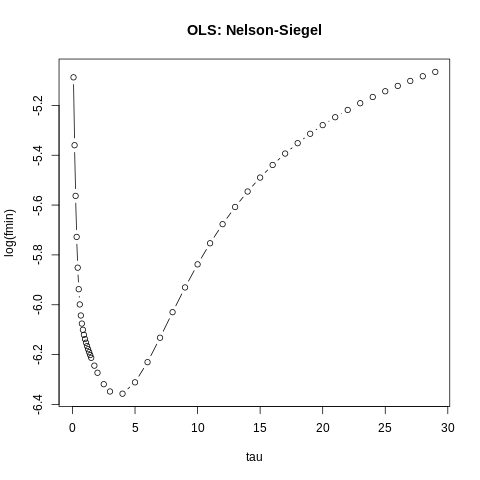

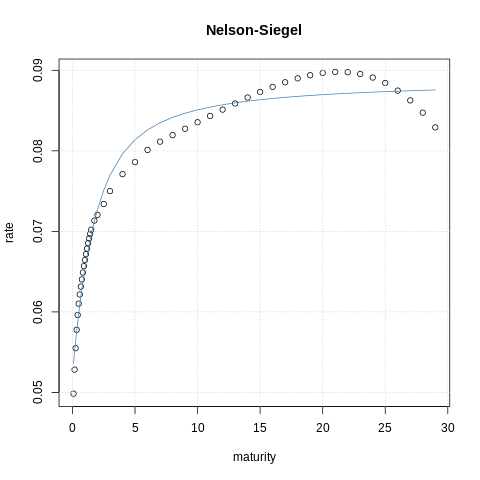

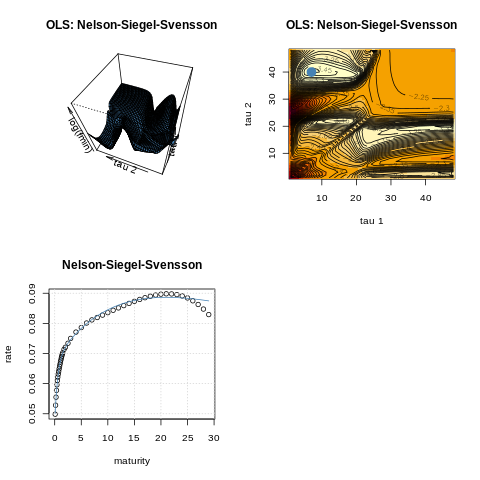

In [ ]:
#library(fBonds)
%%R
Yield = c(
0.04984, 0.05283, 0.05549, 0.05777, 0.05961, 0.06102, 0.06216, 0.06314,
0.06403,
0.06488, 0.06568, 0.06644, 0.06717, 0.06786, 0.06852, 0.06913, 0.06969,
0.07020,
0.07134, 0.07205, 0.07339, 0.07500, 0.07710, 0.07860, 0.08011, 0.08114,
0.08194,
0.08274, 0.08355, 0.08434, 0.08512, 0.08588, 0.08662, 0.08731, 0.08794,
0.08851,
0.08900, 0.08939, 0.08967, 0.08980, 0.08976, 0.08954, 0.08910, 0.08843,
0.08748,
0.08626, 0.08474, 0.08291)

Maturity = c(
  0.083,  0.167,  0.250,  0.333,  0.417,  0.500,  0.583,  0.667,
0.750,  0.833,
  0.917,  1.000,  1.083,  1.167,  1.250,  1.333,  1.417,  1.500,
1.750,  2.000,
  2.500,  3.000,  4.000,  5.000,  6.000,  7.000,  8.000,  9.000, 10.000,
11.000,
 12.000, 13.000, 14.000, 15.000, 16.000, 17.000, 18.000, 19.000, 20.000,
21.000,
 22.000, 23.000, 24.000, 25.000, 26.000, 27.000, 28.000, 29.000)

NelsonSiegel(Yield, Maturity)

par(mfrow = c(2, 2))
Svensson(Yield, Maturity)

#Other Packages in R 

#Financial Engineering in R
https://rdrr.io/cran/FER/

#Derivmkts
https://rdrr.io/cran/derivmkts/f/

#Empfin R package - Trinomial Lattice Model
https://github.com/phenaff/R-Package-empfin/blob/master/R/OptionUtils.R

In [ ]:
%%R
CRRTrinomial <- function (TypeFlag = c("ce", "pe", "ca", "pa"), S, X, Time, r, 
                          b, sigma, n) 
{
  TypeFlag = TypeFlag[1]
  z = NA
  if (TypeFlag == "ce" || TypeFlag == "ca") 
    z = +1
  if (TypeFlag == "pe" || TypeFlag == "pa") 
    z = -1
  if (is.na(z)) 
    stop("TypeFlag misspecified: ce|ca|pe|pa")
  dt = Time/n
  u = exp(sigma * sqrt(2*dt))
  d = 1/u
  dd <- exp(-sigma*sqrt(dt/2))
  pu = ((exp(b * dt/2) - dd)/(1/dd - dd))^2
  pd = (1-sqrt(pu))^2
  pm <- 1-pu-pd
  Df = exp(-r * dt)
  
  # add 1 steps to tree 
  n <- n+1
  # exponent
  iExp <- (1:(2*(n+1)-1))-(n+1)
  OptionValue = z * (S * u^iExp - X)
  OptionValue = (abs(OptionValue) + OptionValue)/2
  if (TypeFlag == "ce" || TypeFlag == "pe") {
    for (j in seq(from = (n), to = 2, by = -1)) 
      for (i in 1:(2*j-1)) 
        OptionValue[i] = (pu*OptionValue[i+2] +
                            pm*OptionValue[i+1] +
                            pd*OptionValue[i]) * Df
  }
  
  if (TypeFlag == "ca" || TypeFlag == "pa") {
    for (j in seq(from = (n), to = 2, by = -1))
      for (i in 1:(2*j-1)) {
        SS = S * d^(j-1) * u^(i-1)
        exVal =  z * (SS - X)
        OptionValue[i] = (pu*OptionValue[i + 2] +
                            pm*OptionValue[i+1] +
                            pd*OptionValue[i]) * Df
        OptionValue[i] = max(exVal, OptionValue[i])
      }
  }
  # the middle node is the price
  Sup <- S*u
  Sdown <- S*d
  
  # delta by central difference
  delta <- (OptionValue[3] - OptionValue[1])/(Sup-Sdown)
  du <- (OptionValue[3] - OptionValue[2])/(Sup-S)
  dd <- (OptionValue[2] - OptionValue[1])/(S-Sdown)
  gamma <- (du-dd)/((Sup-Sdown)/2)
  
#    param = llist(TypeFlag, S, X, Time, r, b, sigma, n)
#    llist(param, price=OptionValue[2], delta, gamma)

c(price=OptionValue[2], delta, gamma)
}



res <- CRRTrinomial(TypeFlag="ca", S=100, X=100, Time=1, r=.05,  b=.05, sigma=.2, n=1000) 
res

      price                         
10.44958378  0.63685222  0.01875941 


# Financial Option Pricing And Manipulation Tools R package
Leisen Reimer

https://rdrr.io/github/joshuaulrich/greeks/

In [ ]:
%%R
LRtree <- function(type=c('ac','ap','ec','ep'),
                   S, #stock=42,
                   X, #strike=40,
                   r, #r=0.1,
                   b, #b=0.1,
                   v, #sigma=0.2,
                   Time, #T=0.5,
                   N=53, 
                   method=2, 
                   force.odd=TRUE, ...) 
{
  stock <- S
  strike <- X
  sigma <- v
  T <- Time

  type <- match.arg(type)
  z <- ifelse(type %in% c('ac','ec'), 1, -1)
  american <- ifelse(type %in% c('ac','ap'), TRUE, FALSE)

  if(force.odd)
    N <- N + (N+1) %% 2  # N should be odd, so we round up if even

  d1 <- ( log(stock / strike) + (b + sigma^2 / 2)*T) / (sigma * sqrt(T))
  d2 <- d1 - sigma * sqrt(T)

  if(method==1) {
    # Preizer-Pratt inversion method 1
    hd1 <- 0.5 + sign(d1) * sqrt(0.25-0.25*exp(-(d1/ (N+1/3))^2 * (N+1/6)))
    hd2 <- 0.5 + sign(d2) * sqrt(0.25-0.25*exp(-(d2/ (N+1/3))^2 * (N+1/6)))
  } else if(method==2) {
    # Preizer-Pratt inversion method 2
    hd1 <- 0.5 + sign(d1) * sqrt(0.25-0.25*exp(-(d1/ (N+1/3+0.1/(N+1)))^2 * (N+1/6)))
    hd2 <- 0.5 + sign(d2) * sqrt(0.25-0.25*exp(-(d2/ (N+1/3+0.1/(N+1)))^2 * (N+1/6)))
  } else if(method==3) {
    stop('Method 3 not yet supported')
  #  a <- N-0
  #  b <- 0
  #  (b/a)^2 * ((sqrt((9*a − 1)*(9*b − 1) + 3*z*sqrt(a*(9*b - 1)^2 + b*(9*a - 1)^2 - 9*a*b*z^2))/((9*b-1)^2 - 9*b*z^2))^(1/3))
  }
  dt <- T/N
  p <- hd2
  u <- exp(b*dt) * hd1/hd2
  d <- (exp(b*dt) - p*u) / (1-p)
  dis <- exp(-r*dt)

  # stock price
  S <- matrix(0,ncol=N+1,nrow=N+1) 
  S <- lapply(0:N, function(N.) stock * u^(0:N.) * d^(N.:0))

  # option price
  P <- vector("list", length(S))
  P[[length(P)]] <- ifelse(z*(S[[length(S)]]-strike) > 0, z*(S[[length(S)]]-strike), 0)

  if(american) {
    for(i in N:1)
      P[[i]] <- mapply(max, dis*(p*P[[i+1]][1+(1:i)] + (1-p)*P[[i+1]][1:i]), z*(S[[i]]-strike))
  } else {  # european
    for(i in N:1)
      P[[i]] <- dis*(p*P[[i+1]][1+(1:i)] + (1-p)*P[[i+1]][1:i])
  }
  g <- list()
  g$delta <- diff(P[[2]]) / (stock*u - stock*d)
  g$gamma <- (diff(P[[3]][2:3]) / (stock * u^2 - stock * u * d) - diff(P[[3]][1:2]) / (stock*u*d-stock*d^2)) /(0.5*(stock*u^2-stock*d^2))
  g$theta <- (P[[3]][2] - P[[1]]) / (2*dt) / 365
  structure(list(Stock=S,Price=P,Greeks=g), class=c("binomialtree", "LRtree"))
}

# **Worked Example** Leisen Reimer

In [ ]:
%%R
LRtree('ap', 100, 100, 0.05, 0.05, 0.2, 1, 5, 2, TRUE)

$Stock
$Stock[[1]]
[1] 100

$Stock[[2]]
[1]  91.92003 109.00245

$Stock[[3]]
[1]  84.49292 100.19508 118.81534

$Stock[[4]]
[1]  77.66592  92.09935 109.21509 129.51163

$Stock[[5]]
[1]  71.39053  84.65775 100.39055 119.04713 141.17084

$Stock[[6]]
[1]  65.62220  77.81743  92.27902 109.42815 129.76428 153.87968


$Price
$Price[[1]]
[1] 6.006252

$Price[[2]]
[1] 9.843002 2.742298

$Price[[3]]
[1] 15.5070805  5.0429696  0.7688597

$Price[[4]]
[1] 22.334083  8.995626  1.658780  0.000000

$Price[[5]]
[1] 28.609466 15.342249  3.578744  0.000000  0.000000

$Price[[6]]
[1] 34.377799 22.182570  7.720979  0.000000  0.000000  0.000000


$Greeks
$Greeks$delta
[1] -0.4156732

$Greeks$gamma
[1] 0.0254569

$Greeks$theta
[1] -0.006597826


attr(,"class")
[1] "binomialtree" "LRtree"      
